In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split as TTS
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
import numpy as np

In [3]:
# import the data
df = pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# data 
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]
X.shape, y.shape

((768, 8), (768,))

In [5]:
# feature scaling
X_norm = (X-X.min())/(X.max()-X.min())
X_norm

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age  
0                    0.234415  0.483333  
1                    0.116567  0.166667  
2                    0.253629  0.183333  
3                    0.038002  0.000000  
4                    0.943638  0.200000  
..                        ...       ...  
763                  0.039710  0.700000  
764                  0.111870  0.100000  
765                  0.071307  0.150000  
766                  0.115713  0.433333  
767                  0.101196  0.033333  

[768 rows x 8 columns]

In [6]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X_norm, y, test_size=0.2, random_state=1)

In [7]:
Xtrain.shape, Xtest.shape

((614, 8), (154, 8))

# NN

In [9]:
from sklearn.model_selection import validation_curve
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import tensorflow_addons as tfa

In [10]:
# split Xtrain into X_train, X_valid for validation purpose
X_train, X_valid, Y_train, Y_valid = TTS(Xtrain, Ytrain, test_size=0.2, random_state=1)

In [11]:
# learning rate at 0.1
nn_model = Sequential()
nn_model.add(tf.keras.Input(shape=(8,)))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1 Max


2022-10-16 09:33:42.159411: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-16 09:33:42.159790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
# learning rate at 0.1
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.1)
nn_model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=tfa.metrics.F1Score(num_classes=1, threshold=0.5))

In [13]:
history = nn_model.fit(X_train, Y_train, epochs=5000, validation_data=(X_valid, Y_valid))

Epoch 1/5000


2022-10-16 09:33:42.787493: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-16 09:33:43.049593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 36ms/step - loss: 0.6693 - f1_score: 0.1765 - val_loss: 0.6645 - val_f1_score: 0.0000e+00
Epoch 2/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6524 - f1_score: 0.0000e+00 - val_loss: 0.6593 - val_f1_score: 0.0000e+00
Epoch 3/5000


2022-10-16 09:33:45.018808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 7ms/step - loss: 0.6471 - f1_score: 0.0000e+00 - val_loss: 0.6569 - val_f1_score: 0.0000e+00
Epoch 4/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6434 - f1_score: 0.0000e+00 - val_loss: 0.6522 - val_f1_score: 0.0000e+00
Epoch 5/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6390 - f1_score: 0.0000e+00 - val_loss: 0.6488 - val_f1_score: 0.0000e+00
Epoch 6/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6339 - f1_score: 0.0000e+00 - val_loss: 0.6443 - val_f1_score: 0.0000e+00
Epoch 7/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6302 - f1_score: 0.0000e+00 - val_loss: 0.6408 - val_f1_score: 0.0000e+00
Epoch 8/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6258 - f1_score: 0.0000e+00 - val_loss: 0.6373 - val_f1_score: 0.0000e+00
Epoch 9/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6217 - f1_score: 0.0118 - val_loss: 0

16/16 [==============================] - 0s 7ms/step - loss: 0.4751 - f1_score: 0.6035 - val_loss: 0.5774 - val_f1_score: 0.6022
Epoch 61/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4753 - f1_score: 0.6267 - val_loss: 0.5533 - val_f1_score: 0.6250
Epoch 62/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4758 - f1_score: 0.6242 - val_loss: 0.5534 - val_f1_score: 0.6250
Epoch 63/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4730 - f1_score: 0.6373 - val_loss: 0.5963 - val_f1_score: 0.6400
Epoch 64/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4755 - f1_score: 0.6295 - val_loss: 0.5531 - val_f1_score: 0.6250
Epoch 65/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4721 - f1_score: 0.6309 - val_loss: 0.5528 - val_f1_score: 0.6250
Epoch 66/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4721 - f1_score: 0.6443 - val_loss: 0.5535 - val_f1_score: 0.6173
Epoch 67/5000

16/16 [==============================] - 0s 7ms/step - loss: 0.4631 - f1_score: 0.6254 - val_loss: 0.5466 - val_f1_score: 0.6429
Epoch 118/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4579 - f1_score: 0.6556 - val_loss: 0.5469 - val_f1_score: 0.6506
Epoch 119/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4584 - f1_score: 0.6450 - val_loss: 0.5455 - val_f1_score: 0.6329
Epoch 120/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4594 - f1_score: 0.6291 - val_loss: 0.5682 - val_f1_score: 0.5217
Epoch 121/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4636 - f1_score: 0.6195 - val_loss: 0.5554 - val_f1_score: 0.5676
Epoch 122/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4680 - f1_score: 0.6169 - val_loss: 0.5506 - val_f1_score: 0.6437
Epoch 123/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4601 - f1_score: 0.6443 - val_loss: 0.5500 - val_f1_score: 0.6279
Epoch 1

Epoch 174/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4623 - f1_score: 0.6494 - val_loss: 0.5559 - val_f1_score: 0.6364
Epoch 175/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4572 - f1_score: 0.6447 - val_loss: 0.5543 - val_f1_score: 0.6364
Epoch 176/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4600 - f1_score: 0.6400 - val_loss: 0.5465 - val_f1_score: 0.6585
Epoch 177/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4586 - f1_score: 0.6416 - val_loss: 0.5690 - val_f1_score: 0.6517
Epoch 178/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4618 - f1_score: 0.6291 - val_loss: 0.6311 - val_f1_score: 0.6731
Epoch 179/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4621 - f1_score: 0.6309 - val_loss: 0.5455 - val_f1_score: 0.6410
Epoch 180/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4591 - f1_score: 0.6711 - val_loss: 0.5446 - val_f1_score:

Epoch 231/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4457 - f1_score: 0.6667 - val_loss: 0.5500 - val_f1_score: 0.6512
Epoch 232/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4452 - f1_score: 0.6510 - val_loss: 0.5801 - val_f1_score: 0.6105
Epoch 233/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4489 - f1_score: 0.6490 - val_loss: 0.5757 - val_f1_score: 0.6105
Epoch 234/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4468 - f1_score: 0.6752 - val_loss: 0.5507 - val_f1_score: 0.6133
Epoch 235/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4504 - f1_score: 0.6690 - val_loss: 0.5492 - val_f1_score: 0.6512
Epoch 236/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4465 - f1_score: 0.6395 - val_loss: 0.5856 - val_f1_score: 0.6392
Epoch 237/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4486 - f1_score: 0.6601 - val_loss: 0.5449 - val_f1_score:

Epoch 288/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4377 - f1_score: 0.6709 - val_loss: 0.5407 - val_f1_score: 0.6329
Epoch 289/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4408 - f1_score: 0.6554 - val_loss: 0.5608 - val_f1_score: 0.6374
Epoch 290/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4405 - f1_score: 0.6382 - val_loss: 0.5418 - val_f1_score: 0.6154
Epoch 291/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4491 - f1_score: 0.6486 - val_loss: 0.5470 - val_f1_score: 0.6353
Epoch 292/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4412 - f1_score: 0.6688 - val_loss: 0.5468 - val_f1_score: 0.6429
Epoch 293/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4410 - f1_score: 0.6469 - val_loss: 0.5409 - val_f1_score: 0.6429
Epoch 294/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4414 - f1_score: 0.6441 - val_loss: 0.5418 - val_f1_score:

Epoch 345/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4367 - f1_score: 0.6492 - val_loss: 0.5529 - val_f1_score: 0.6512
Epoch 346/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4337 - f1_score: 0.6839 - val_loss: 0.5505 - val_f1_score: 0.6512
Epoch 347/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4349 - f1_score: 0.6601 - val_loss: 0.5487 - val_f1_score: 0.6588
Epoch 348/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4308 - f1_score: 0.6488 - val_loss: 0.5484 - val_f1_score: 0.6429
Epoch 349/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4374 - f1_score: 0.6578 - val_loss: 0.5444 - val_f1_score: 0.6429
Epoch 350/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4367 - f1_score: 0.6397 - val_loss: 0.5526 - val_f1_score: 0.6437
Epoch 351/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4349 - f1_score: 0.6445 - val_loss: 0.5539 - val_f1_score:

Epoch 402/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4318 - f1_score: 0.6416 - val_loss: 0.5909 - val_f1_score: 0.6327
Epoch 403/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4313 - f1_score: 0.6603 - val_loss: 0.5648 - val_f1_score: 0.6222
Epoch 404/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4373 - f1_score: 0.6384 - val_loss: 0.5441 - val_f1_score: 0.6585
Epoch 405/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4326 - f1_score: 0.6355 - val_loss: 0.5550 - val_f1_score: 0.6364
Epoch 406/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4286 - f1_score: 0.6731 - val_loss: 0.5441 - val_f1_score: 0.6585
Epoch 407/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4289 - f1_score: 0.6622 - val_loss: 0.5485 - val_f1_score: 0.6512
Epoch 408/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4299 - f1_score: 0.6599 - val_loss: 0.5703 - val_f1_score:

Epoch 459/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4314 - f1_score: 0.6646 - val_loss: 0.5434 - val_f1_score: 0.6506
Epoch 460/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4252 - f1_score: 0.6575 - val_loss: 0.6023 - val_f1_score: 0.6535
Epoch 461/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4329 - f1_score: 0.6500 - val_loss: 0.5455 - val_f1_score: 0.6667
Epoch 462/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4272 - f1_score: 0.6533 - val_loss: 0.5758 - val_f1_score: 0.6304
Epoch 463/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4251 - f1_score: 0.6667 - val_loss: 0.5487 - val_f1_score: 0.6512
Epoch 464/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4288 - f1_score: 0.6623 - val_loss: 0.5551 - val_f1_score: 0.6437
Epoch 465/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4278 - f1_score: 0.6667 - val_loss: 0.5526 - val_f1_score:

Epoch 516/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4284 - f1_score: 0.6510 - val_loss: 0.5569 - val_f1_score: 0.6517
Epoch 517/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4242 - f1_score: 0.6557 - val_loss: 0.5465 - val_f1_score: 0.6512
Epoch 518/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4232 - f1_score: 0.6556 - val_loss: 0.5461 - val_f1_score: 0.6588
Epoch 519/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4263 - f1_score: 0.6688 - val_loss: 0.5448 - val_f1_score: 0.6585
Epoch 520/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4225 - f1_score: 0.6600 - val_loss: 0.5601 - val_f1_score: 0.6517
Epoch 521/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4245 - f1_score: 0.6558 - val_loss: 0.5597 - val_f1_score: 0.6444
Epoch 522/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4227 - f1_score: 0.6774 - val_loss: 0.5458 - val_f1_score:

Epoch 573/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4240 - f1_score: 0.6883 - val_loss: 0.5500 - val_f1_score: 0.6585
Epoch 574/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4193 - f1_score: 0.6645 - val_loss: 0.5491 - val_f1_score: 0.6585
Epoch 575/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4229 - f1_score: 0.6576 - val_loss: 0.5513 - val_f1_score: 0.6512
Epoch 576/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4204 - f1_score: 0.6667 - val_loss: 0.5502 - val_f1_score: 0.6234
Epoch 577/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4198 - f1_score: 0.6392 - val_loss: 0.5488 - val_f1_score: 0.6585
Epoch 578/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4255 - f1_score: 0.6645 - val_loss: 0.5698 - val_f1_score: 0.6444
Epoch 579/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4210 - f1_score: 0.6877 - val_loss: 0.5614 - val_f1_score:

Epoch 630/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4183 - f1_score: 0.6794 - val_loss: 0.5672 - val_f1_score: 0.6292
Epoch 631/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4187 - f1_score: 0.6558 - val_loss: 0.5526 - val_f1_score: 0.6512
Epoch 632/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4175 - f1_score: 0.6732 - val_loss: 0.5514 - val_f1_score: 0.6582
Epoch 633/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4202 - f1_score: 0.6490 - val_loss: 0.5520 - val_f1_score: 0.6429
Epoch 634/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4171 - f1_score: 0.6579 - val_loss: 0.5676 - val_f1_score: 0.6292
Epoch 635/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4186 - f1_score: 0.6794 - val_loss: 0.5508 - val_f1_score: 0.6585
Epoch 636/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4216 - f1_score: 0.6731 - val_loss: 0.5531 - val_f1_score:

Epoch 687/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4179 - f1_score: 0.6962 - val_loss: 0.5753 - val_f1_score: 0.6292
Epoch 688/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4193 - f1_score: 0.6943 - val_loss: 0.5602 - val_f1_score: 0.6512
Epoch 689/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4201 - f1_score: 0.6774 - val_loss: 0.5703 - val_f1_score: 0.6437
Epoch 690/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4128 - f1_score: 0.7022 - val_loss: 0.5542 - val_f1_score: 0.6585
Epoch 691/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4171 - f1_score: 0.6865 - val_loss: 0.5667 - val_f1_score: 0.6512
Epoch 692/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4216 - f1_score: 0.6835 - val_loss: 0.5576 - val_f1_score: 0.6353
Epoch 693/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4131 - f1_score: 0.6756 - val_loss: 0.6041 - val_f1_score:

Epoch 744/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4137 - f1_score: 0.7055 - val_loss: 0.5833 - val_f1_score: 0.6222
Epoch 745/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.4145 - f1_score: 0.6796 - val_loss: 0.5859 - val_f1_score: 0.6222
Epoch 746/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.4173 - f1_score: 0.7025 - val_loss: 0.5616 - val_f1_score: 0.6667
Epoch 747/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.4157 - f1_score: 0.6580 - val_loss: 0.5782 - val_f1_score: 0.6292
Epoch 748/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4143 - f1_score: 0.6731 - val_loss: 0.5830 - val_f1_score: 0.6154
Epoch 749/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4154 - f1_score: 0.7025 - val_loss: 0.5679 - val_f1_score: 0.6512
Epoch 750/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4184 - f1_score: 0.6818 - val_loss: 0.5772 - val_f1_score:

Epoch 801/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4144 - f1_score: 0.6859 - val_loss: 0.5617 - val_f1_score: 0.6667
Epoch 802/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4141 - f1_score: 0.6908 - val_loss: 0.5644 - val_f1_score: 0.6512
Epoch 803/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4124 - f1_score: 0.6732 - val_loss: 0.5758 - val_f1_score: 0.6512
Epoch 804/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4134 - f1_score: 0.6861 - val_loss: 0.5776 - val_f1_score: 0.6437
Epoch 805/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4164 - f1_score: 0.6794 - val_loss: 0.5786 - val_f1_score: 0.6512
Epoch 806/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4138 - f1_score: 0.6987 - val_loss: 0.5655 - val_f1_score: 0.6506
Epoch 807/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4171 - f1_score: 0.6885 - val_loss: 0.5899 - val_f1_score:

Epoch 858/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4126 - f1_score: 0.6711 - val_loss: 0.5782 - val_f1_score: 0.6512
Epoch 859/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4132 - f1_score: 0.6815 - val_loss: 0.5804 - val_f1_score: 0.6512
Epoch 860/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4160 - f1_score: 0.6818 - val_loss: 0.6115 - val_f1_score: 0.6000
Epoch 861/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4109 - f1_score: 0.7029 - val_loss: 0.5980 - val_f1_score: 0.6170
Epoch 862/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4162 - f1_score: 0.7051 - val_loss: 0.5799 - val_f1_score: 0.6437
Epoch 863/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4081 - f1_score: 0.6859 - val_loss: 0.6034 - val_f1_score: 0.6186
Epoch 864/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4125 - f1_score: 0.6937 - val_loss: 0.5696 - val_f1_score:

Epoch 915/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4106 - f1_score: 0.6773 - val_loss: 0.5728 - val_f1_score: 0.6512
Epoch 916/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4094 - f1_score: 0.6903 - val_loss: 0.5719 - val_f1_score: 0.6512
Epoch 917/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4110 - f1_score: 0.6945 - val_loss: 0.5710 - val_f1_score: 0.6512
Epoch 918/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4127 - f1_score: 0.6933 - val_loss: 0.6274 - val_f1_score: 0.6275
Epoch 919/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4137 - f1_score: 0.7147 - val_loss: 0.6053 - val_f1_score: 0.6170
Epoch 920/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4092 - f1_score: 0.6943 - val_loss: 0.6126 - val_f1_score: 0.6186
Epoch 921/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4107 - f1_score: 0.6901 - val_loss: 0.6043 - val_f1_score:

Epoch 972/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4105 - f1_score: 0.6815 - val_loss: 0.5751 - val_f1_score: 0.6588
Epoch 973/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4115 - f1_score: 0.6863 - val_loss: 0.5746 - val_f1_score: 0.6076
Epoch 974/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4121 - f1_score: 0.6928 - val_loss: 0.5840 - val_f1_score: 0.6364
Epoch 975/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4071 - f1_score: 0.6881 - val_loss: 0.6101 - val_f1_score: 0.6105
Epoch 976/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.4101 - f1_score: 0.7022 - val_loss: 0.5786 - val_f1_score: 0.6429
Epoch 977/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4095 - f1_score: 0.6987 - val_loss: 0.5819 - val_f1_score: 0.5789
Epoch 978/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4131 - f1_score: 0.6890 - val_loss: 0.5877 - val_f1_score:

Epoch 1029/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4114 - f1_score: 0.6710 - val_loss: 0.6043 - val_f1_score: 0.6237
Epoch 1030/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4070 - f1_score: 0.6918 - val_loss: 0.5817 - val_f1_score: 0.6512
Epoch 1031/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4105 - f1_score: 0.6839 - val_loss: 0.6288 - val_f1_score: 0.6000
Epoch 1032/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4100 - f1_score: 0.7103 - val_loss: 0.5852 - val_f1_score: 0.6512
Epoch 1033/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4114 - f1_score: 0.6818 - val_loss: 0.5788 - val_f1_score: 0.6173
Epoch 1034/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4081 - f1_score: 0.6863 - val_loss: 0.6511 - val_f1_score: 0.6286
Epoch 1035/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4121 - f1_score: 0.7029 - val_loss: 0.6185 - val_f1

16/16 [==============================] - 0s 6ms/step - loss: 0.4102 - f1_score: 0.6817 - val_loss: 0.5867 - val_f1_score: 0.6512
Epoch 1086/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4131 - f1_score: 0.6901 - val_loss: 0.5923 - val_f1_score: 0.6437
Epoch 1087/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4064 - f1_score: 0.6965 - val_loss: 0.6232 - val_f1_score: 0.6122
Epoch 1088/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4065 - f1_score: 0.6774 - val_loss: 0.6121 - val_f1_score: 0.6237
Epoch 1089/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4063 - f1_score: 0.7093 - val_loss: 0.5929 - val_f1_score: 0.6437
Epoch 1090/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4090 - f1_score: 0.7051 - val_loss: 0.5873 - val_f1_score: 0.6076
Epoch 1091/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4158 - f1_score: 0.6906 - val_loss: 0.6198 - val_f1_score: 0.6250
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4087 - f1_score: 0.6903 - val_loss: 0.6010 - val_f1_score: 0.6517
Epoch 1142/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4069 - f1_score: 0.6899 - val_loss: 0.6076 - val_f1_score: 0.6444
Epoch 1143/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.4030 - f1_score: 0.7025 - val_loss: 0.6154 - val_f1_score: 0.6170
Epoch 1144/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.4015 - f1_score: 0.6885 - val_loss: 0.7557 - val_f1_score: 0.6610
Epoch 1145/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4187 - f1_score: 0.7048 - val_loss: 0.6213 - val_f1_score: 0.6186
Epoch 1146/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4049 - f1_score: 0.7070 - val_loss: 0.5873 - val_f1_score: 0.6512
Epoch 1147/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4100 - f1_score: 0.6863 - val_loss: 0.6112 - val_f1_score: 0.6237
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4039 - f1_score: 0.7070 - val_loss: 0.6072 - val_f1_score: 0.6304
Epoch 1198/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4053 - f1_score: 0.6962 - val_loss: 0.6055 - val_f1_score: 0.6517
Epoch 1199/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4034 - f1_score: 0.6959 - val_loss: 0.5936 - val_f1_score: 0.6437
Epoch 1200/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4020 - f1_score: 0.7078 - val_loss: 0.6047 - val_f1_score: 0.6517
Epoch 1201/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4109 - f1_score: 0.6881 - val_loss: 0.6149 - val_f1_score: 0.6444
Epoch 1202/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4029 - f1_score: 0.7089 - val_loss: 0.5898 - val_f1_score: 0.5641
Epoch 1203/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4057 - f1_score: 0.6887 - val_loss: 0.6249 - val_f1_score: 0.6186
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4028 - f1_score: 0.6940 - val_loss: 0.6189 - val_f1_score: 0.6374
Epoch 1254/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4029 - f1_score: 0.7111 - val_loss: 0.6086 - val_f1_score: 0.6444
Epoch 1255/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4048 - f1_score: 0.6859 - val_loss: 0.5989 - val_f1_score: 0.5714
Epoch 1256/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4014 - f1_score: 0.7133 - val_loss: 0.6692 - val_f1_score: 0.6168
Epoch 1257/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4090 - f1_score: 0.7022 - val_loss: 0.6130 - val_f1_score: 0.6517
Epoch 1258/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4048 - f1_score: 0.7227 - val_loss: 0.5964 - val_f1_score: 0.6517
Epoch 1259/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4057 - f1_score: 0.6948 - val_loss: 0.6101 - val_f1_score: 0.6444
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4076 - f1_score: 0.6948 - val_loss: 0.6140 - val_f1_score: 0.6444
Epoch 1310/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4004 - f1_score: 0.7066 - val_loss: 0.5957 - val_f1_score: 0.6190
Epoch 1311/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4004 - f1_score: 0.6908 - val_loss: 0.6359 - val_f1_score: 0.6263
Epoch 1312/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4068 - f1_score: 0.6921 - val_loss: 0.6233 - val_f1_score: 0.6383
Epoch 1313/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4012 - f1_score: 0.7152 - val_loss: 0.6014 - val_f1_score: 0.6517
Epoch 1314/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4089 - f1_score: 0.6899 - val_loss: 0.5977 - val_f1_score: 0.5952
Epoch 1315/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4039 - f1_score: 0.6885 - val_loss: 0.6220 - val_f1_score: 0.6452
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4063 - f1_score: 0.7134 - val_loss: 0.6154 - val_f1_score: 0.6444
Epoch 1366/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3984 - f1_score: 0.6923 - val_loss: 0.6190 - val_f1_score: 0.6444
Epoch 1367/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4015 - f1_score: 0.6901 - val_loss: 0.6140 - val_f1_score: 0.6667
Epoch 1368/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4075 - f1_score: 0.6990 - val_loss: 0.6310 - val_f1_score: 0.6250
Epoch 1369/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4011 - f1_score: 0.7066 - val_loss: 0.6102 - val_f1_score: 0.6517
Epoch 1370/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4053 - f1_score: 0.6863 - val_loss: 0.6138 - val_f1_score: 0.6517
Epoch 1371/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4063 - f1_score: 0.7044 - val_loss: 0.6002 - val_f1_score: 0.6118
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3992 - f1_score: 0.6928 - val_loss: 0.6142 - val_f1_score: 0.5714
Epoch 1422/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4106 - f1_score: 0.6776 - val_loss: 0.6068 - val_f1_score: 0.6437
Epoch 1423/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4021 - f1_score: 0.6957 - val_loss: 0.6264 - val_f1_score: 0.6522
Epoch 1424/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3965 - f1_score: 0.7089 - val_loss: 0.6044 - val_f1_score: 0.6098
Epoch 1425/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3988 - f1_score: 0.7059 - val_loss: 0.6086 - val_f1_score: 0.6517
Epoch 1426/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3975 - f1_score: 0.7013 - val_loss: 0.6228 - val_f1_score: 0.6444
Epoch 1427/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3975 - f1_score: 0.7029 - val_loss: 0.6179 - val_f1_score: 0.6444
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3983 - f1_score: 0.6881 - val_loss: 0.6088 - val_f1_score: 0.6517
Epoch 1478/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3971 - f1_score: 0.7166 - val_loss: 0.6429 - val_f1_score: 0.6186
Epoch 1479/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4002 - f1_score: 0.6901 - val_loss: 0.6560 - val_f1_score: 0.6275
Epoch 1480/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4008 - f1_score: 0.7070 - val_loss: 0.6344 - val_f1_score: 0.6383
Epoch 1481/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3975 - f1_score: 0.7044 - val_loss: 0.6148 - val_f1_score: 0.6517
Epoch 1482/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4000 - f1_score: 0.7010 - val_loss: 0.6086 - val_f1_score: 0.6437
Epoch 1483/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3988 - f1_score: 0.6997 - val_loss: 0.6211 - val_f1_score: 0.6444
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3989 - f1_score: 0.6861 - val_loss: 0.6155 - val_f1_score: 0.6517
Epoch 1534/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3953 - f1_score: 0.7120 - val_loss: 0.6164 - val_f1_score: 0.6517
Epoch 1535/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3992 - f1_score: 0.7059 - val_loss: 0.6396 - val_f1_score: 0.6316
Epoch 1536/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3980 - f1_score: 0.6879 - val_loss: 0.6105 - val_f1_score: 0.6118
Epoch 1537/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3967 - f1_score: 0.6906 - val_loss: 0.6146 - val_f1_score: 0.6517
Epoch 1538/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3998 - f1_score: 0.7055 - val_loss: 0.6170 - val_f1_score: 0.6517
Epoch 1539/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4000 - f1_score: 0.6881 - val_loss: 0.6106 - val_f1_score: 0.5952
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4067 - f1_score: 0.6974 - val_loss: 0.6264 - val_f1_score: 0.6522
Epoch 1590/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3971 - f1_score: 0.6962 - val_loss: 0.6116 - val_f1_score: 0.6279
Epoch 1591/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3949 - f1_score: 0.7143 - val_loss: 0.6244 - val_f1_score: 0.6667
Epoch 1592/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3973 - f1_score: 0.6948 - val_loss: 0.6365 - val_f1_score: 0.6383
Epoch 1593/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3950 - f1_score: 0.6923 - val_loss: 0.6276 - val_f1_score: 0.6667
Epoch 1594/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3966 - f1_score: 0.6987 - val_loss: 0.6106 - val_f1_score: 0.5926
Epoch 1595/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3977 - f1_score: 0.7067 - val_loss: 0.6119 - val_f1_score: 0.6437
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3942 - f1_score: 0.6894 - val_loss: 0.6163 - val_f1_score: 0.6517
Epoch 1646/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3975 - f1_score: 0.7148 - val_loss: 0.6281 - val_f1_score: 0.6667
Epoch 1647/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3974 - f1_score: 0.7029 - val_loss: 0.6463 - val_f1_score: 0.6316
Epoch 1648/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4002 - f1_score: 0.6842 - val_loss: 0.6235 - val_f1_score: 0.6517
Epoch 1649/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3938 - f1_score: 0.6965 - val_loss: 0.6150 - val_f1_score: 0.5679
Epoch 1650/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3987 - f1_score: 0.6865 - val_loss: 0.6364 - val_f1_score: 0.6593
Epoch 1651/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4001 - f1_score: 0.7032 - val_loss: 0.6276 - val_f1_score: 0.6444
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3944 - f1_score: 0.7048 - val_loss: 0.6228 - val_f1_score: 0.6667
Epoch 1702/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3952 - f1_score: 0.7192 - val_loss: 0.6312 - val_f1_score: 0.6667
Epoch 1703/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3919 - f1_score: 0.7179 - val_loss: 0.6370 - val_f1_score: 0.6452
Epoch 1704/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3957 - f1_score: 0.7055 - val_loss: 0.6214 - val_f1_score: 0.6517
Epoch 1705/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3976 - f1_score: 0.7016 - val_loss: 0.6563 - val_f1_score: 0.6250
Epoch 1706/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3954 - f1_score: 0.6943 - val_loss: 0.6280 - val_f1_score: 0.6593
Epoch 1707/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3962 - f1_score: 0.6903 - val_loss: 0.6270 - val_f1_score: 0.6667
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3962 - f1_score: 0.6859 - val_loss: 0.6228 - val_f1_score: 0.6517
Epoch 1758/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3920 - f1_score: 0.7134 - val_loss: 0.6154 - val_f1_score: 0.6098
Epoch 1759/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3968 - f1_score: 0.6910 - val_loss: 0.6547 - val_f1_score: 0.6250
Epoch 1760/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3949 - f1_score: 0.6903 - val_loss: 0.6581 - val_f1_score: 0.6186
Epoch 1761/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3956 - f1_score: 0.7099 - val_loss: 0.6297 - val_f1_score: 0.6667
Epoch 1762/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3945 - f1_score: 0.7220 - val_loss: 0.6580 - val_f1_score: 0.6263
Epoch 1763/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3942 - f1_score: 0.7111 - val_loss: 0.6182 - val_f1_score: 0.6207
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3976 - f1_score: 0.7107 - val_loss: 0.6311 - val_f1_score: 0.6444
Epoch 1814/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3925 - f1_score: 0.7244 - val_loss: 0.6367 - val_f1_score: 0.6593
Epoch 1815/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3942 - f1_score: 0.6923 - val_loss: 0.6201 - val_f1_score: 0.6279
Epoch 1816/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3993 - f1_score: 0.6951 - val_loss: 0.6465 - val_f1_score: 0.6452
Epoch 1817/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3941 - f1_score: 0.6945 - val_loss: 0.6197 - val_f1_score: 0.6024
Epoch 1818/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3973 - f1_score: 0.6865 - val_loss: 0.6532 - val_f1_score: 0.6383
Epoch 1819/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3975 - f1_score: 0.6965 - val_loss: 0.6508 - val_f1_score: 0.6383
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3970 - f1_score: 0.6931 - val_loss: 0.6557 - val_f1_score: 0.6316
Epoch 1870/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3922 - f1_score: 0.7138 - val_loss: 0.6197 - val_f1_score: 0.6279
Epoch 1871/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3955 - f1_score: 0.6951 - val_loss: 0.6296 - val_f1_score: 0.6364
Epoch 1872/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3935 - f1_score: 0.7070 - val_loss: 0.6312 - val_f1_score: 0.6444
Epoch 1873/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3916 - f1_score: 0.7051 - val_loss: 0.6482 - val_f1_score: 0.6383
Epoch 1874/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3947 - f1_score: 0.6916 - val_loss: 0.6190 - val_f1_score: 0.6118
Epoch 1875/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3979 - f1_score: 0.7032 - val_loss: 0.6329 - val_f1_score: 0.6593
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3966 - f1_score: 0.7089 - val_loss: 0.6313 - val_f1_score: 0.6667
Epoch 1926/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3952 - f1_score: 0.6885 - val_loss: 0.6684 - val_f1_score: 0.6122
Epoch 1927/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3942 - f1_score: 0.7010 - val_loss: 0.6296 - val_f1_score: 0.6444
Epoch 1928/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3910 - f1_score: 0.7020 - val_loss: 0.6493 - val_f1_score: 0.6383
Epoch 1929/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3895 - f1_score: 0.7029 - val_loss: 0.6203 - val_f1_score: 0.6190
Epoch 1930/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3910 - f1_score: 0.6951 - val_loss: 0.6607 - val_f1_score: 0.6186
Epoch 1931/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4058 - f1_score: 0.7160 - val_loss: 0.6523 - val_f1_score: 0.6316
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3900 - f1_score: 0.7016 - val_loss: 0.6280 - val_f1_score: 0.6517
Epoch 1982/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3905 - f1_score: 0.7010 - val_loss: 0.6422 - val_f1_score: 0.6593
Epoch 1983/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3914 - f1_score: 0.7147 - val_loss: 0.6240 - val_f1_score: 0.5750
Epoch 1984/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3977 - f1_score: 0.6990 - val_loss: 0.6216 - val_f1_score: 0.6279
Epoch 1985/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3921 - f1_score: 0.7115 - val_loss: 0.6438 - val_f1_score: 0.6593
Epoch 1986/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3906 - f1_score: 0.7010 - val_loss: 0.6345 - val_f1_score: 0.6667
Epoch 1987/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3912 - f1_score: 0.7152 - val_loss: 0.6191 - val_f1_score: 0.6265
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3917 - f1_score: 0.7138 - val_loss: 0.6297 - val_f1_score: 0.6444
Epoch 2038/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3886 - f1_score: 0.7039 - val_loss: 0.6324 - val_f1_score: 0.6593
Epoch 2039/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3938 - f1_score: 0.7025 - val_loss: 0.6275 - val_f1_score: 0.6279
Epoch 2040/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3868 - f1_score: 0.6951 - val_loss: 0.6473 - val_f1_score: 0.6593
Epoch 2041/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3926 - f1_score: 0.7044 - val_loss: 0.6251 - val_f1_score: 0.5679
Epoch 2042/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3936 - f1_score: 0.6908 - val_loss: 0.6275 - val_f1_score: 0.6364
Epoch 2043/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3891 - f1_score: 0.7120 - val_loss: 0.6372 - val_f1_score: 0.6667
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3893 - f1_score: 0.7143 - val_loss: 0.6511 - val_f1_score: 0.6522
Epoch 2094/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3899 - f1_score: 0.6901 - val_loss: 0.6547 - val_f1_score: 0.6383
Epoch 2095/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3919 - f1_score: 0.7138 - val_loss: 0.6230 - val_f1_score: 0.6364
Epoch 2096/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3890 - f1_score: 0.7070 - val_loss: 0.6244 - val_f1_score: 0.6364
Epoch 2097/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3910 - f1_score: 0.6962 - val_loss: 0.6205 - val_f1_score: 0.6098
Epoch 2098/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3909 - f1_score: 0.7067 - val_loss: 0.6303 - val_f1_score: 0.6444
Epoch 2099/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3864 - f1_score: 0.7179 - val_loss: 0.6223 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3921 - f1_score: 0.6883 - val_loss: 0.6455 - val_f1_score: 0.6452
Epoch 2150/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3815 - f1_score: 0.7407 - val_loss: 0.6309 - val_f1_score: 0.6444
Epoch 2151/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3879 - f1_score: 0.7074 - val_loss: 0.6239 - val_f1_score: 0.6279
Epoch 2152/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3860 - f1_score: 0.7074 - val_loss: 0.6447 - val_f1_score: 0.6593
Epoch 2153/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3901 - f1_score: 0.7138 - val_loss: 0.6249 - val_f1_score: 0.6207
Epoch 2154/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3918 - f1_score: 0.7082 - val_loss: 0.6441 - val_f1_score: 0.6593
Epoch 2155/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3866 - f1_score: 0.7044 - val_loss: 0.6271 - val_f1_score: 0.6207
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3850 - f1_score: 0.7222 - val_loss: 0.6294 - val_f1_score: 0.5570
Epoch 2206/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3971 - f1_score: 0.7129 - val_loss: 0.6345 - val_f1_score: 0.6444
Epoch 2207/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3903 - f1_score: 0.7029 - val_loss: 0.6388 - val_f1_score: 0.6593
Epoch 2208/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3972 - f1_score: 0.6903 - val_loss: 0.6377 - val_f1_score: 0.6304
Epoch 2209/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3867 - f1_score: 0.7200 - val_loss: 0.6211 - val_f1_score: 0.6190
Epoch 2210/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3841 - f1_score: 0.7110 - val_loss: 0.6393 - val_f1_score: 0.6444
Epoch 2211/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3861 - f1_score: 0.7170 - val_loss: 0.6452 - val_f1_score: 0.6444
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3865 - f1_score: 0.7233 - val_loss: 0.6233 - val_f1_score: 0.6190
Epoch 2262/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3895 - f1_score: 0.7078 - val_loss: 0.6288 - val_f1_score: 0.6517
Epoch 2263/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3795 - f1_score: 0.7233 - val_loss: 0.6212 - val_f1_score: 0.6190
Epoch 2264/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3836 - f1_score: 0.7166 - val_loss: 0.6282 - val_f1_score: 0.6207
Epoch 2265/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3862 - f1_score: 0.7020 - val_loss: 0.6288 - val_f1_score: 0.6047
Epoch 2266/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3852 - f1_score: 0.7226 - val_loss: 0.6229 - val_f1_score: 0.5854
Epoch 2267/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3867 - f1_score: 0.7184 - val_loss: 0.6219 - val_f1_score: 0.5926
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3896 - f1_score: 0.7256 - val_loss: 0.6400 - val_f1_score: 0.6374
Epoch 2318/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3866 - f1_score: 0.7319 - val_loss: 0.6310 - val_f1_score: 0.5570
Epoch 2319/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3904 - f1_score: 0.6997 - val_loss: 0.6412 - val_f1_score: 0.6517
Epoch 2320/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3850 - f1_score: 0.7273 - val_loss: 0.6560 - val_f1_score: 0.6316
Epoch 2321/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3866 - f1_score: 0.7233 - val_loss: 0.6245 - val_f1_score: 0.6279
Epoch 2322/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3855 - f1_score: 0.7082 - val_loss: 0.6587 - val_f1_score: 0.6316
Epoch 2323/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3826 - f1_score: 0.7233 - val_loss: 0.6403 - val_f1_score: 0.6374
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3850 - f1_score: 0.7227 - val_loss: 0.6232 - val_f1_score: 0.6279
Epoch 2374/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3878 - f1_score: 0.7120 - val_loss: 0.6321 - val_f1_score: 0.6364
Epoch 2375/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3786 - f1_score: 0.7437 - val_loss: 0.6317 - val_f1_score: 0.5714
Epoch 2376/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3875 - f1_score: 0.6936 - val_loss: 0.6828 - val_f1_score: 0.6327
Epoch 2377/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3880 - f1_score: 0.6901 - val_loss: 0.6484 - val_f1_score: 0.6522
Epoch 2378/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3833 - f1_score: 0.7111 - val_loss: 0.6390 - val_f1_score: 0.6444
Epoch 2379/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3804 - f1_score: 0.7157 - val_loss: 0.6350 - val_f1_score: 0.6517
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3856 - f1_score: 0.7329 - val_loss: 0.6289 - val_f1_score: 0.6207
Epoch 2430/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3829 - f1_score: 0.7226 - val_loss: 0.6547 - val_f1_score: 0.6316
Epoch 2431/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3845 - f1_score: 0.7208 - val_loss: 0.6701 - val_f1_score: 0.6458
Epoch 2432/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3854 - f1_score: 0.7097 - val_loss: 0.6564 - val_f1_score: 0.6316
Epoch 2433/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3863 - f1_score: 0.7078 - val_loss: 0.6332 - val_f1_score: 0.6047
Epoch 2434/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3834 - f1_score: 0.7093 - val_loss: 0.6310 - val_f1_score: 0.6207
Epoch 2435/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3834 - f1_score: 0.7213 - val_loss: 0.6277 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3796 - f1_score: 0.7273 - val_loss: 0.6263 - val_f1_score: 0.6279
Epoch 2486/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3822 - f1_score: 0.7059 - val_loss: 0.6294 - val_f1_score: 0.6279
Epoch 2487/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3850 - f1_score: 0.7184 - val_loss: 0.6262 - val_f1_score: 0.6024
Epoch 2488/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3851 - f1_score: 0.7171 - val_loss: 0.6334 - val_f1_score: 0.5641
Epoch 2489/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3830 - f1_score: 0.7157 - val_loss: 0.6424 - val_f1_score: 0.6444
Epoch 2490/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3841 - f1_score: 0.7197 - val_loss: 0.6276 - val_f1_score: 0.6279
Epoch 2491/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3837 - f1_score: 0.7078 - val_loss: 0.6302 - val_f1_score: 0.6118
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3865 - f1_score: 0.7319 - val_loss: 0.6724 - val_f1_score: 0.6531
Epoch 2542/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3810 - f1_score: 0.7308 - val_loss: 0.6866 - val_f1_score: 0.6263
Epoch 2543/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3819 - f1_score: 0.7358 - val_loss: 0.6352 - val_f1_score: 0.6517
Epoch 2544/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3801 - f1_score: 0.7093 - val_loss: 0.6380 - val_f1_score: 0.6364
Epoch 2545/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3765 - f1_score: 0.7436 - val_loss: 0.6541 - val_f1_score: 0.6374
Epoch 2546/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3775 - f1_score: 0.7250 - val_loss: 0.6346 - val_f1_score: 0.6118
Epoch 2547/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3837 - f1_score: 0.7097 - val_loss: 0.6479 - val_f1_score: 0.5526
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3837 - f1_score: 0.7171 - val_loss: 0.6431 - val_f1_score: 0.6517
Epoch 2598/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3755 - f1_score: 0.7307 - val_loss: 0.6346 - val_f1_score: 0.6190
Epoch 2599/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3804 - f1_score: 0.7219 - val_loss: 0.6383 - val_f1_score: 0.6292
Epoch 2600/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3852 - f1_score: 0.7043 - val_loss: 0.7045 - val_f1_score: 0.6214
Epoch 2601/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3808 - f1_score: 0.7307 - val_loss: 0.6354 - val_f1_score: 0.6207
Epoch 2602/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3819 - f1_score: 0.7203 - val_loss: 0.6341 - val_f1_score: 0.6207
Epoch 2603/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3870 - f1_score: 0.6945 - val_loss: 0.6456 - val_f1_score: 0.6522
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3773 - f1_score: 0.7303 - val_loss: 0.6387 - val_f1_score: 0.6136
Epoch 2654/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3801 - f1_score: 0.6951 - val_loss: 0.6851 - val_f1_score: 0.6465
Epoch 2655/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3780 - f1_score: 0.7476 - val_loss: 0.6396 - val_f1_score: 0.6364
Epoch 2656/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3798 - f1_score: 0.7179 - val_loss: 0.6562 - val_f1_score: 0.6522
Epoch 2657/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3745 - f1_score: 0.7414 - val_loss: 0.6320 - val_f1_score: 0.6190
Epoch 2658/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3838 - f1_score: 0.7319 - val_loss: 0.6370 - val_f1_score: 0.5750
Epoch 2659/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3804 - f1_score: 0.7200 - val_loss: 0.6530 - val_f1_score: 0.6452
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3814 - f1_score: 0.7226 - val_loss: 0.6368 - val_f1_score: 0.6136
Epoch 2710/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3763 - f1_score: 0.7296 - val_loss: 0.7156 - val_f1_score: 0.6408
Epoch 2711/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3790 - f1_score: 0.7477 - val_loss: 0.6376 - val_f1_score: 0.6292
Epoch 2712/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3734 - f1_score: 0.7166 - val_loss: 0.6369 - val_f1_score: 0.5750
Epoch 2713/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3804 - f1_score: 0.7261 - val_loss: 0.6390 - val_f1_score: 0.5926
Epoch 2714/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3802 - f1_score: 0.7389 - val_loss: 0.6319 - val_f1_score: 0.6207
Epoch 2715/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3746 - f1_score: 0.7362 - val_loss: 0.6601 - val_f1_score: 0.6250
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3798 - f1_score: 0.7166 - val_loss: 0.6475 - val_f1_score: 0.6237
Epoch 2766/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3789 - f1_score: 0.7261 - val_loss: 0.6401 - val_f1_score: 0.6136
Epoch 2767/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3785 - f1_score: 0.7296 - val_loss: 0.6497 - val_f1_score: 0.6593
Epoch 2768/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3743 - f1_score: 0.7197 - val_loss: 0.6301 - val_f1_score: 0.6279
Epoch 2769/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3758 - f1_score: 0.7261 - val_loss: 0.6350 - val_f1_score: 0.6364
Epoch 2770/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3755 - f1_score: 0.7342 - val_loss: 0.6576 - val_f1_score: 0.5714
Epoch 2771/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3764 - f1_score: 0.7410 - val_loss: 0.6375 - val_f1_score: 0.6136
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3765 - f1_score: 0.7335 - val_loss: 0.6407 - val_f1_score: 0.5823
Epoch 2822/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3773 - f1_score: 0.7309 - val_loss: 0.6380 - val_f1_score: 0.6207
Epoch 2823/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3734 - f1_score: 0.7220 - val_loss: 0.6332 - val_f1_score: 0.6000
Epoch 2824/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3761 - f1_score: 0.7368 - val_loss: 0.6330 - val_f1_score: 0.6136
Epoch 2825/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3748 - f1_score: 0.7138 - val_loss: 0.6429 - val_f1_score: 0.6444
Epoch 2826/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3812 - f1_score: 0.7319 - val_loss: 0.6455 - val_f1_score: 0.6452
Epoch 2827/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3739 - f1_score: 0.7445 - val_loss: 0.6435 - val_f1_score: 0.6087
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3762 - f1_score: 0.7302 - val_loss: 0.6319 - val_f1_score: 0.6136
Epoch 2878/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3683 - f1_score: 0.7086 - val_loss: 0.6352 - val_f1_score: 0.6207
Epoch 2879/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3726 - f1_score: 0.7355 - val_loss: 0.6371 - val_f1_score: 0.6000
Epoch 2880/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3727 - f1_score: 0.7383 - val_loss: 0.6938 - val_f1_score: 0.6337
Epoch 2881/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3857 - f1_score: 0.7197 - val_loss: 0.6441 - val_f1_score: 0.6444
Epoch 2882/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3751 - f1_score: 0.7319 - val_loss: 0.6431 - val_f1_score: 0.6292
Epoch 2883/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3700 - f1_score: 0.7138 - val_loss: 0.6615 - val_f1_score: 0.6316
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3727 - f1_score: 0.7368 - val_loss: 0.6518 - val_f1_score: 0.6596
Epoch 2934/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3754 - f1_score: 0.7484 - val_loss: 0.6346 - val_f1_score: 0.6136
Epoch 2935/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3718 - f1_score: 0.7348 - val_loss: 0.6290 - val_f1_score: 0.6118
Epoch 2936/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3745 - f1_score: 0.7208 - val_loss: 0.6345 - val_f1_score: 0.6136
Epoch 2937/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3777 - f1_score: 0.7101 - val_loss: 0.6447 - val_f1_score: 0.6444
Epoch 2938/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3766 - f1_score: 0.7290 - val_loss: 0.6395 - val_f1_score: 0.6136
Epoch 2939/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3737 - f1_score: 0.7445 - val_loss: 0.6397 - val_f1_score: 0.5455
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3683 - f1_score: 0.7417 - val_loss: 0.7216 - val_f1_score: 0.6346
Epoch 2990/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3736 - f1_score: 0.7389 - val_loss: 0.6480 - val_f1_score: 0.6222
Epoch 2991/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3724 - f1_score: 0.7319 - val_loss: 0.6372 - val_f1_score: 0.6279
Epoch 2992/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3646 - f1_score: 0.7314 - val_loss: 0.6716 - val_f1_score: 0.6316
Epoch 2993/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3700 - f1_score: 0.7398 - val_loss: 0.6511 - val_f1_score: 0.6292
Epoch 2994/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3692 - f1_score: 0.7382 - val_loss: 0.6322 - val_f1_score: 0.6024
Epoch 2995/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3699 - f1_score: 0.7320 - val_loss: 0.6330 - val_f1_score: 0.6024
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3686 - f1_score: 0.7290 - val_loss: 0.6406 - val_f1_score: 0.6136
Epoch 3046/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3675 - f1_score: 0.7161 - val_loss: 0.6548 - val_f1_score: 0.6154
Epoch 3047/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3804 - f1_score: 0.7244 - val_loss: 0.6467 - val_f1_score: 0.6292
Epoch 3048/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3764 - f1_score: 0.7338 - val_loss: 0.6569 - val_f1_score: 0.6383
Epoch 3049/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3734 - f1_score: 0.7508 - val_loss: 0.6520 - val_f1_score: 0.6374
Epoch 3050/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3671 - f1_score: 0.7429 - val_loss: 0.6496 - val_f1_score: 0.5455
Epoch 3051/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3674 - f1_score: 0.7327 - val_loss: 0.6404 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3672 - f1_score: 0.7436 - val_loss: 0.6564 - val_f1_score: 0.6383
Epoch 3102/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3675 - f1_score: 0.7554 - val_loss: 0.6432 - val_f1_score: 0.6136
Epoch 3103/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3661 - f1_score: 0.7171 - val_loss: 0.6667 - val_f1_score: 0.6392
Epoch 3104/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3625 - f1_score: 0.7358 - val_loss: 0.6534 - val_f1_score: 0.6292
Epoch 3105/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3660 - f1_score: 0.7124 - val_loss: 0.6436 - val_f1_score: 0.6136
Epoch 3106/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3619 - f1_score: 0.7379 - val_loss: 0.6614 - val_f1_score: 0.6383
Epoch 3107/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3702 - f1_score: 0.7372 - val_loss: 0.6349 - val_f1_score: 0.6118
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3664 - f1_score: 0.7395 - val_loss: 0.6383 - val_f1_score: 0.6136
Epoch 3158/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3651 - f1_score: 0.7571 - val_loss: 0.6438 - val_f1_score: 0.5526
Epoch 3159/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3672 - f1_score: 0.7148 - val_loss: 0.8097 - val_f1_score: 0.6182
Epoch 3160/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3797 - f1_score: 0.7302 - val_loss: 0.6754 - val_f1_score: 0.6186
Epoch 3161/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3639 - f1_score: 0.7273 - val_loss: 0.6665 - val_f1_score: 0.6042
Epoch 3162/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3676 - f1_score: 0.7654 - val_loss: 0.6617 - val_f1_score: 0.6186
Epoch 3163/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3673 - f1_score: 0.7249 - val_loss: 0.6544 - val_f1_score: 0.6170
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3649 - f1_score: 0.7385 - val_loss: 0.6413 - val_f1_score: 0.5750
Epoch 3214/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3681 - f1_score: 0.7320 - val_loss: 0.6422 - val_f1_score: 0.5854
Epoch 3215/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3607 - f1_score: 0.7358 - val_loss: 0.6785 - val_f1_score: 0.6327
Epoch 3216/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3689 - f1_score: 0.7249 - val_loss: 0.6746 - val_f1_score: 0.6186
Epoch 3217/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3681 - f1_score: 0.7539 - val_loss: 0.6654 - val_f1_score: 0.6042
Epoch 3218/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3690 - f1_score: 0.7355 - val_loss: 0.6548 - val_f1_score: 0.6292
Epoch 3219/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3707 - f1_score: 0.7314 - val_loss: 0.6485 - val_f1_score: 0.6067
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3602 - f1_score: 0.7460 - val_loss: 0.6425 - val_f1_score: 0.5882
Epoch 3270/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3619 - f1_score: 0.7290 - val_loss: 0.6475 - val_f1_score: 0.6154
Epoch 3271/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3612 - f1_score: 0.7249 - val_loss: 0.6619 - val_f1_score: 0.6154
Epoch 3272/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3625 - f1_score: 0.7524 - val_loss: 0.6765 - val_f1_score: 0.5205
Epoch 3273/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3719 - f1_score: 0.7224 - val_loss: 0.6314 - val_f1_score: 0.5783
Epoch 3274/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3667 - f1_score: 0.7291 - val_loss: 0.6384 - val_f1_score: 0.5747
Epoch 3275/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3665 - f1_score: 0.7573 - val_loss: 0.6549 - val_f1_score: 0.5974
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3656 - f1_score: 0.7231 - val_loss: 0.6738 - val_f1_score: 0.6186
Epoch 3326/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3610 - f1_score: 0.7540 - val_loss: 0.6593 - val_f1_score: 0.6042
Epoch 3327/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3633 - f1_score: 0.7508 - val_loss: 0.7040 - val_f1_score: 0.6275
Epoch 3328/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3618 - f1_score: 0.7389 - val_loss: 0.6374 - val_f1_score: 0.5952
Epoch 3329/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3642 - f1_score: 0.7508 - val_loss: 0.6476 - val_f1_score: 0.5333
Epoch 3330/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3677 - f1_score: 0.7285 - val_loss: 0.6421 - val_f1_score: 0.6292
Epoch 3331/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3692 - f1_score: 0.7296 - val_loss: 0.6802 - val_f1_score: 0.6200
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3596 - f1_score: 0.7484 - val_loss: 0.6617 - val_f1_score: 0.5135
Epoch 3382/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3586 - f1_score: 0.7451 - val_loss: 0.6441 - val_f1_score: 0.6022
Epoch 3383/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3595 - f1_score: 0.7325 - val_loss: 0.6359 - val_f1_score: 0.5952
Epoch 3384/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3660 - f1_score: 0.7273 - val_loss: 0.6392 - val_f1_score: 0.5714
Epoch 3385/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3626 - f1_score: 0.7273 - val_loss: 0.6352 - val_f1_score: 0.5854
Epoch 3386/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3659 - f1_score: 0.7419 - val_loss: 0.6421 - val_f1_score: 0.6136
Epoch 3387/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3576 - f1_score: 0.7541 - val_loss: 0.6429 - val_f1_score: 0.6292
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3644 - f1_score: 0.7492 - val_loss: 0.6646 - val_f1_score: 0.6186
Epoch 3438/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3635 - f1_score: 0.7746 - val_loss: 0.6388 - val_f1_score: 0.5882
Epoch 3439/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3629 - f1_score: 0.7516 - val_loss: 0.6425 - val_f1_score: 0.6136
Epoch 3440/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3619 - f1_score: 0.7372 - val_loss: 0.6389 - val_f1_score: 0.5952
Epoch 3441/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3632 - f1_score: 0.7588 - val_loss: 0.6748 - val_f1_score: 0.5135
Epoch 3442/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3608 - f1_score: 0.7368 - val_loss: 0.6512 - val_f1_score: 0.6364
Epoch 3443/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3602 - f1_score: 0.7564 - val_loss: 0.6366 - val_f1_score: 0.6292
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3572 - f1_score: 0.7604 - val_loss: 0.7169 - val_f1_score: 0.6275
Epoch 3494/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3629 - f1_score: 0.7692 - val_loss: 0.6443 - val_f1_score: 0.5882
Epoch 3495/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3545 - f1_score: 0.7732 - val_loss: 0.6690 - val_f1_score: 0.6042
Epoch 3496/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3533 - f1_score: 0.7802 - val_loss: 0.6479 - val_f1_score: 0.6087
Epoch 3497/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3642 - f1_score: 0.7484 - val_loss: 0.6799 - val_f1_score: 0.6327
Epoch 3498/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3598 - f1_score: 0.7500 - val_loss: 0.6787 - val_f1_score: 0.6122
Epoch 3499/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3611 - f1_score: 0.7500 - val_loss: 0.7828 - val_f1_score: 0.6239
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3571 - f1_score: 0.7658 - val_loss: 0.6780 - val_f1_score: 0.5205
Epoch 3550/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3635 - f1_score: 0.7434 - val_loss: 0.6612 - val_f1_score: 0.6105
Epoch 3551/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3564 - f1_score: 0.7707 - val_loss: 0.6429 - val_f1_score: 0.5750
Epoch 3552/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3637 - f1_score: 0.7314 - val_loss: 0.6832 - val_f1_score: 0.5979
Epoch 3553/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3635 - f1_score: 0.7484 - val_loss: 0.6951 - val_f1_score: 0.5000
Epoch 3554/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3668 - f1_score: 0.7190 - val_loss: 0.6639 - val_f1_score: 0.6186
Epoch 3555/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3583 - f1_score: 0.7532 - val_loss: 0.6514 - val_f1_score: 0.5870
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3652 - f1_score: 0.7524 - val_loss: 0.6441 - val_f1_score: 0.5926
Epoch 3606/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3619 - f1_score: 0.7368 - val_loss: 0.7332 - val_f1_score: 0.6275
Epoch 3607/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3689 - f1_score: 0.7290 - val_loss: 0.6608 - val_f1_score: 0.6105
Epoch 3608/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3599 - f1_score: 0.7398 - val_loss: 0.6594 - val_f1_score: 0.6022
Epoch 3609/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3589 - f1_score: 0.7532 - val_loss: 0.7087 - val_f1_score: 0.6337
Epoch 3610/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3664 - f1_score: 0.7335 - val_loss: 0.7065 - val_f1_score: 0.4571
Epoch 3611/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3725 - f1_score: 0.7213 - val_loss: 0.6548 - val_f1_score: 0.5934
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3564 - f1_score: 0.7412 - val_loss: 0.6679 - val_f1_score: 0.5895
Epoch 3662/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3612 - f1_score: 0.7492 - val_loss: 0.6566 - val_f1_score: 0.5870
Epoch 3663/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3574 - f1_score: 0.7692 - val_loss: 0.6492 - val_f1_score: 0.6000
Epoch 3664/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3585 - f1_score: 0.7403 - val_loss: 0.6479 - val_f1_score: 0.5647
Epoch 3665/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3597 - f1_score: 0.7443 - val_loss: 0.6922 - val_f1_score: 0.6000
Epoch 3666/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3568 - f1_score: 0.7613 - val_loss: 0.6770 - val_f1_score: 0.5979
Epoch 3667/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3592 - f1_score: 0.7492 - val_loss: 0.6568 - val_f1_score: 0.6022
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3532 - f1_score: 0.7556 - val_loss: 0.6573 - val_f1_score: 0.5679
Epoch 3718/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3549 - f1_score: 0.7580 - val_loss: 0.6482 - val_f1_score: 0.5854
Epoch 3719/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3594 - f1_score: 0.7412 - val_loss: 0.6512 - val_f1_score: 0.5854
Epoch 3720/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3612 - f1_score: 0.7386 - val_loss: 0.6602 - val_f1_score: 0.6000
Epoch 3721/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3552 - f1_score: 0.7476 - val_loss: 0.6674 - val_f1_score: 0.5570
Epoch 3722/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3666 - f1_score: 0.7327 - val_loss: 0.6532 - val_f1_score: 0.5977
Epoch 3723/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3565 - f1_score: 0.7604 - val_loss: 0.6876 - val_f1_score: 0.5859
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3621 - f1_score: 0.7427 - val_loss: 0.6635 - val_f1_score: 0.5806
Epoch 3774/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3554 - f1_score: 0.7673 - val_loss: 0.6542 - val_f1_score: 0.5750
Epoch 3775/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3566 - f1_score: 0.7427 - val_loss: 0.6465 - val_f1_score: 0.5814
Epoch 3776/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3631 - f1_score: 0.7273 - val_loss: 0.6612 - val_f1_score: 0.5934
Epoch 3777/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3534 - f1_score: 0.7613 - val_loss: 0.6836 - val_f1_score: 0.6042
Epoch 3778/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3575 - f1_score: 0.7610 - val_loss: 0.6609 - val_f1_score: 0.5806
Epoch 3779/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3687 - f1_score: 0.7308 - val_loss: 0.6649 - val_f1_score: 0.5806
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3602 - f1_score: 0.7452 - val_loss: 0.7013 - val_f1_score: 0.6337
Epoch 3830/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3568 - f1_score: 0.7564 - val_loss: 0.7224 - val_f1_score: 0.6275
Epoch 3831/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3540 - f1_score: 0.7673 - val_loss: 0.7237 - val_f1_score: 0.6275
Epoch 3832/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3594 - f1_score: 0.7500 - val_loss: 0.6744 - val_f1_score: 0.6042
Epoch 3833/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3572 - f1_score: 0.7365 - val_loss: 0.6553 - val_f1_score: 0.5814
Epoch 3834/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3482 - f1_score: 0.7427 - val_loss: 0.6676 - val_f1_score: 0.5977
Epoch 3835/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3561 - f1_score: 0.7379 - val_loss: 0.6614 - val_f1_score: 0.5806
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3530 - f1_score: 0.7365 - val_loss: 0.6862 - val_f1_score: 0.6061
Epoch 3886/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3552 - f1_score: 0.7697 - val_loss: 0.6724 - val_f1_score: 0.5870
Epoch 3887/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3514 - f1_score: 0.7649 - val_loss: 0.7417 - val_f1_score: 0.6275
Epoch 3888/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3605 - f1_score: 0.7492 - val_loss: 0.6584 - val_f1_score: 0.5854
Epoch 3889/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3531 - f1_score: 0.7588 - val_loss: 0.6636 - val_f1_score: 0.5806
Epoch 3890/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3515 - f1_score: 0.7604 - val_loss: 0.6571 - val_f1_score: 0.5647
Epoch 3891/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3512 - f1_score: 0.7475 - val_loss: 0.6716 - val_f1_score: 0.5957
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3523 - f1_score: 0.7414 - val_loss: 0.6580 - val_f1_score: 0.6024
Epoch 3942/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3542 - f1_score: 0.7597 - val_loss: 0.7115 - val_f1_score: 0.6000
Epoch 3943/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3500 - f1_score: 0.7707 - val_loss: 0.6549 - val_f1_score: 0.5783
Epoch 3944/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3599 - f1_score: 0.7314 - val_loss: 0.6557 - val_f1_score: 0.6279
Epoch 3945/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3520 - f1_score: 0.7632 - val_loss: 0.7072 - val_f1_score: 0.6139
Epoch 3946/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3606 - f1_score: 0.7468 - val_loss: 0.6763 - val_f1_score: 0.5745
Epoch 3947/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3529 - f1_score: 0.7616 - val_loss: 0.6617 - val_f1_score: 0.5750
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3515 - f1_score: 0.7445 - val_loss: 0.6604 - val_f1_score: 0.5854
Epoch 3998/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3533 - f1_score: 0.7647 - val_loss: 0.6627 - val_f1_score: 0.5641
Epoch 3999/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3567 - f1_score: 0.7386 - val_loss: 0.6854 - val_f1_score: 0.5979
Epoch 4000/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3515 - f1_score: 0.7445 - val_loss: 0.6689 - val_f1_score: 0.5570
Epoch 4001/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3550 - f1_score: 0.7484 - val_loss: 0.6624 - val_f1_score: 0.6067
Epoch 4002/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3557 - f1_score: 0.7389 - val_loss: 0.6533 - val_f1_score: 0.6000
Epoch 4003/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3666 - f1_score: 0.7451 - val_loss: 0.6666 - val_f1_score: 0.5714
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3579 - f1_score: 0.7249 - val_loss: 0.6622 - val_f1_score: 0.5806
Epoch 4054/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3563 - f1_score: 0.7436 - val_loss: 0.6671 - val_f1_score: 0.5934
Epoch 4055/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3580 - f1_score: 0.7403 - val_loss: 0.6878 - val_f1_score: 0.5895
Epoch 4056/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3545 - f1_score: 0.7419 - val_loss: 0.6626 - val_f1_score: 0.5526
Epoch 4057/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3575 - f1_score: 0.7434 - val_loss: 0.6582 - val_f1_score: 0.5870
Epoch 4058/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3542 - f1_score: 0.7664 - val_loss: 0.7580 - val_f1_score: 0.3636
Epoch 4059/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3704 - f1_score: 0.7475 - val_loss: 0.7072 - val_f1_score: 0.6061
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3575 - f1_score: 0.7437 - val_loss: 0.6707 - val_f1_score: 0.5750
Epoch 4110/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3604 - f1_score: 0.7563 - val_loss: 0.6839 - val_f1_score: 0.5745
Epoch 4111/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3489 - f1_score: 0.7548 - val_loss: 0.6780 - val_f1_score: 0.5684
Epoch 4112/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3537 - f1_score: 0.7580 - val_loss: 0.7217 - val_f1_score: 0.6263
Epoch 4113/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3449 - f1_score: 0.7697 - val_loss: 0.7032 - val_f1_score: 0.6105
Epoch 4114/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3552 - f1_score: 0.7610 - val_loss: 0.6593 - val_f1_score: 0.5679
Epoch 4115/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3504 - f1_score: 0.7668 - val_loss: 0.7107 - val_f1_score: 0.6000
E

16/16 [==============================] - 0s 8ms/step - loss: 0.3638 - f1_score: 0.7355 - val_loss: 0.6682 - val_f1_score: 0.5854
Epoch 4166/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.3519 - f1_score: 0.7613 - val_loss: 0.6844 - val_f1_score: 0.5934
Epoch 4167/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3550 - f1_score: 0.7556 - val_loss: 0.6777 - val_f1_score: 0.5870
Epoch 4168/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3554 - f1_score: 0.7436 - val_loss: 0.6637 - val_f1_score: 0.5952
Epoch 4169/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3522 - f1_score: 0.7588 - val_loss: 0.7054 - val_f1_score: 0.5859
Epoch 4170/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3471 - f1_score: 0.7900 - val_loss: 0.6825 - val_f1_score: 0.5895
Epoch 4171/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3584 - f1_score: 0.7476 - val_loss: 0.6676 - val_f1_score: 0.5641
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3557 - f1_score: 0.7348 - val_loss: 0.6677 - val_f1_score: 0.5977
Epoch 4222/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3504 - f1_score: 0.7508 - val_loss: 0.6972 - val_f1_score: 0.5333
Epoch 4223/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3718 - f1_score: 0.7475 - val_loss: 0.6628 - val_f1_score: 0.6047
Epoch 4224/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3520 - f1_score: 0.7386 - val_loss: 0.6961 - val_f1_score: 0.5895
Epoch 4225/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3434 - f1_score: 0.7586 - val_loss: 0.6771 - val_f1_score: 0.5641
Epoch 4226/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3564 - f1_score: 0.7355 - val_loss: 0.6619 - val_f1_score: 0.6047
Epoch 4227/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3627 - f1_score: 0.7231 - val_loss: 0.7167 - val_f1_score: 0.6139
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3536 - f1_score: 0.7597 - val_loss: 0.7575 - val_f1_score: 0.6214
Epoch 4278/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3745 - f1_score: 0.7453 - val_loss: 0.6790 - val_f1_score: 0.5870
Epoch 4279/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3550 - f1_score: 0.7338 - val_loss: 0.7951 - val_f1_score: 0.6296
Epoch 4280/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3580 - f1_score: 0.7760 - val_loss: 0.6630 - val_f1_score: 0.5714
Epoch 4281/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3553 - f1_score: 0.7362 - val_loss: 0.7248 - val_f1_score: 0.6200
Epoch 4282/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3630 - f1_score: 0.7631 - val_loss: 0.6653 - val_f1_score: 0.5926
Epoch 4283/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3476 - f1_score: 0.7573 - val_loss: 0.6775 - val_f1_score: 0.5745
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3528 - f1_score: 0.7405 - val_loss: 0.6849 - val_f1_score: 0.5750
Epoch 4334/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3501 - f1_score: 0.7516 - val_loss: 0.6711 - val_f1_score: 0.5750
Epoch 4335/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3549 - f1_score: 0.7427 - val_loss: 0.6714 - val_f1_score: 0.5952
Epoch 4336/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3578 - f1_score: 0.7595 - val_loss: 0.6791 - val_f1_score: 0.5870
Epoch 4337/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3485 - f1_score: 0.7532 - val_loss: 0.6781 - val_f1_score: 0.5870
Epoch 4338/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3521 - f1_score: 0.7452 - val_loss: 0.6734 - val_f1_score: 0.6047
Epoch 4339/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3530 - f1_score: 0.7556 - val_loss: 0.6707 - val_f1_score: 0.6098
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3497 - f1_score: 0.7403 - val_loss: 0.6776 - val_f1_score: 0.5957
Epoch 4390/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3501 - f1_score: 0.7445 - val_loss: 0.6694 - val_f1_score: 0.6136
Epoch 4391/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3503 - f1_score: 0.7508 - val_loss: 0.6682 - val_f1_score: 0.5750
Epoch 4392/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3547 - f1_score: 0.7331 - val_loss: 0.6863 - val_f1_score: 0.5745
Epoch 4393/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3497 - f1_score: 0.7445 - val_loss: 0.6743 - val_f1_score: 0.5679
Epoch 4394/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3476 - f1_score: 0.7443 - val_loss: 0.7109 - val_f1_score: 0.6105
Epoch 4395/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3556 - f1_score: 0.7508 - val_loss: 0.7576 - val_f1_score: 0.6019
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3465 - f1_score: 0.7419 - val_loss: 0.7190 - val_f1_score: 0.6061
Epoch 4446/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3498 - f1_score: 0.7730 - val_loss: 0.6891 - val_f1_score: 0.5455
Epoch 4447/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3686 - f1_score: 0.7516 - val_loss: 0.7061 - val_f1_score: 0.6000
Epoch 4448/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3556 - f1_score: 0.7460 - val_loss: 0.6701 - val_f1_score: 0.5952
Epoch 4449/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3465 - f1_score: 0.7475 - val_loss: 0.6775 - val_f1_score: 0.5934
Epoch 4450/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3572 - f1_score: 0.7412 - val_loss: 0.7380 - val_f1_score: 0.6139
Epoch 4451/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3553 - f1_score: 0.7599 - val_loss: 0.6696 - val_f1_score: 0.6067
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3560 - f1_score: 0.7468 - val_loss: 0.6869 - val_f1_score: 0.5870
Epoch 4502/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3546 - f1_score: 0.7405 - val_loss: 0.6972 - val_f1_score: 0.5957
Epoch 4503/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3577 - f1_score: 0.7452 - val_loss: 0.7099 - val_f1_score: 0.6061
Epoch 4504/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3425 - f1_score: 0.7750 - val_loss: 0.7234 - val_f1_score: 0.5859
Epoch 4505/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3573 - f1_score: 0.7593 - val_loss: 0.7303 - val_f1_score: 0.5657
Epoch 4506/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3549 - f1_score: 0.7625 - val_loss: 0.7292 - val_f1_score: 0.6000
Epoch 4507/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3517 - f1_score: 0.7660 - val_loss: 0.7039 - val_f1_score: 0.4932
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3447 - f1_score: 0.7540 - val_loss: 0.6853 - val_f1_score: 0.5432
Epoch 4558/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3543 - f1_score: 0.7516 - val_loss: 0.6745 - val_f1_score: 0.6047
Epoch 4559/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3589 - f1_score: 0.7601 - val_loss: 0.6849 - val_f1_score: 0.5455
Epoch 4560/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3541 - f1_score: 0.7500 - val_loss: 0.6836 - val_f1_score: 0.5714
Epoch 4561/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3525 - f1_score: 0.7586 - val_loss: 0.6887 - val_f1_score: 0.5405
Epoch 4562/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3519 - f1_score: 0.7484 - val_loss: 0.6796 - val_f1_score: 0.6047
Epoch 4563/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3545 - f1_score: 0.7556 - val_loss: 0.7188 - val_f1_score: 0.6061
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3430 - f1_score: 0.7717 - val_loss: 0.7024 - val_f1_score: 0.6061
Epoch 4614/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3590 - f1_score: 0.7476 - val_loss: 0.6694 - val_f1_score: 0.6067
Epoch 4615/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.3539 - f1_score: 0.7395 - val_loss: 0.7349 - val_f1_score: 0.6139
Epoch 4616/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3410 - f1_score: 0.7716 - val_loss: 0.6828 - val_f1_score: 0.5455
Epoch 4617/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3464 - f1_score: 0.7516 - val_loss: 0.7060 - val_f1_score: 0.5773
Epoch 4618/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3550 - f1_score: 0.7584 - val_loss: 0.6873 - val_f1_score: 0.5526
Epoch 4619/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3443 - f1_score: 0.7771 - val_loss: 0.6896 - val_f1_score: 0.5684
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3517 - f1_score: 0.7756 - val_loss: 0.8449 - val_f1_score: 0.6126
Epoch 4670/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3523 - f1_score: 0.7631 - val_loss: 0.6862 - val_f1_score: 0.6118
Epoch 4671/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3426 - f1_score: 0.7785 - val_loss: 0.7422 - val_f1_score: 0.4179
Epoch 4672/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3614 - f1_score: 0.7540 - val_loss: 0.6977 - val_f1_score: 0.5205
Epoch 4673/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3507 - f1_score: 0.7267 - val_loss: 0.7118 - val_f1_score: 0.6061
Epoch 4674/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3489 - f1_score: 0.7664 - val_loss: 0.6967 - val_f1_score: 0.5333
Epoch 4675/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3536 - f1_score: 0.7492 - val_loss: 0.7010 - val_f1_score: 0.5833
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3468 - f1_score: 0.7658 - val_loss: 0.6810 - val_f1_score: 0.5679
Epoch 4726/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3524 - f1_score: 0.7563 - val_loss: 0.6748 - val_f1_score: 0.6118
Epoch 4727/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3448 - f1_score: 0.7443 - val_loss: 0.7157 - val_f1_score: 0.5918
Epoch 4728/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3521 - f1_score: 0.7649 - val_loss: 0.6948 - val_f1_score: 0.5870
Epoch 4729/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3451 - f1_score: 0.7760 - val_loss: 0.6811 - val_f1_score: 0.5977
Epoch 4730/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3409 - f1_score: 0.7890 - val_loss: 0.7138 - val_f1_score: 0.5000
Epoch 4731/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3565 - f1_score: 0.7419 - val_loss: 0.6798 - val_f1_score: 0.5823
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3624 - f1_score: 0.7461 - val_loss: 0.6864 - val_f1_score: 0.5843
Epoch 4782/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3449 - f1_score: 0.7410 - val_loss: 0.6830 - val_f1_score: 0.6190
Epoch 4783/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3508 - f1_score: 0.7736 - val_loss: 0.7222 - val_f1_score: 0.5070
Epoch 4784/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.3581 - f1_score: 0.7582 - val_loss: 0.6753 - val_f1_score: 0.6118
Epoch 4785/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3452 - f1_score: 0.7500 - val_loss: 0.7030 - val_f1_score: 0.5895
Epoch 4786/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3463 - f1_score: 0.7601 - val_loss: 0.7042 - val_f1_score: 0.5979
Epoch 4787/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3434 - f1_score: 0.7586 - val_loss: 0.6889 - val_f1_score: 0.5870
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3480 - f1_score: 0.7677 - val_loss: 0.6824 - val_f1_score: 0.5843
Epoch 4838/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3472 - f1_score: 0.7799 - val_loss: 0.6881 - val_f1_score: 0.5934
Epoch 4839/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3629 - f1_score: 0.7586 - val_loss: 0.7350 - val_f1_score: 0.5859
Epoch 4840/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3562 - f1_score: 0.7768 - val_loss: 0.6752 - val_f1_score: 0.6024
Epoch 4841/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3459 - f1_score: 0.7634 - val_loss: 0.6843 - val_f1_score: 0.6098
Epoch 4842/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3469 - f1_score: 0.7540 - val_loss: 0.7171 - val_f1_score: 0.5918
Epoch 4843/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3503 - f1_score: 0.7643 - val_loss: 0.7386 - val_f1_score: 0.6139
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3488 - f1_score: 0.7451 - val_loss: 0.6774 - val_f1_score: 0.6136
Epoch 4894/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3457 - f1_score: 0.7492 - val_loss: 0.7170 - val_f1_score: 0.5979
Epoch 4895/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3470 - f1_score: 0.7578 - val_loss: 0.6818 - val_f1_score: 0.5926
Epoch 4896/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3484 - f1_score: 0.7475 - val_loss: 0.7005 - val_f1_score: 0.5684
Epoch 4897/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3510 - f1_score: 0.7688 - val_loss: 0.7415 - val_f1_score: 0.5882
Epoch 4898/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3503 - f1_score: 0.7669 - val_loss: 0.6854 - val_f1_score: 0.5526
Epoch 4899/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3528 - f1_score: 0.7443 - val_loss: 0.6813 - val_f1_score: 0.6076
E

16/16 [==============================] - 0s 6ms/step - loss: 0.3422 - f1_score: 0.7640 - val_loss: 0.6767 - val_f1_score: 0.5926
Epoch 4950/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3513 - f1_score: 0.7436 - val_loss: 0.6949 - val_f1_score: 0.5684
Epoch 4951/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3449 - f1_score: 0.7610 - val_loss: 0.6871 - val_f1_score: 0.5934
Epoch 4952/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3455 - f1_score: 0.7619 - val_loss: 0.7007 - val_f1_score: 0.5600
Epoch 4953/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3469 - f1_score: 0.7692 - val_loss: 0.6997 - val_f1_score: 0.5652
Epoch 4954/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3465 - f1_score: 0.7625 - val_loss: 0.7081 - val_f1_score: 0.5895
Epoch 4955/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3525 - f1_score: 0.7453 - val_loss: 0.6887 - val_f1_score: 0.6047
E

In [14]:
history.history.keys()

dict_keys(['loss', 'f1_score', 'val_loss', 'val_f1_score'])

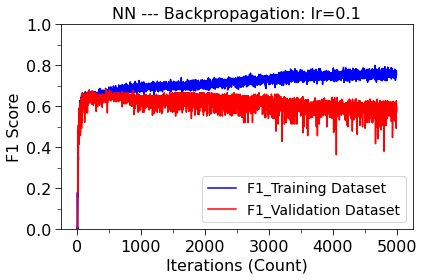

In [15]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#plot the data
plt.plot(np.arange(len(history.history['f1_score']))
         , history.history['f1_score']
         , color='blue'
         , label='F1_Training Dataset')
plt.plot(np.arange(len(history.history['val_f1_score']))
         , history.history['val_f1_score']
         , color='red'
         , label = 'F1_Validation Dataset')

# format the graph
plt.gca().set_ylim(0,1)
plt.title("NN --- Backpropagation: lr=0.1", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Iterations (Count)", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.tight_layout()
plt.savefig('NN-BP-1.png', dpi=300)
plt.show()

In [16]:
res_testing = nn_model.predict(Xtest)

5/5 [==============================] - 0s 3ms/step


2022-10-16 09:42:43.817613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [17]:
from sklearn.metrics import f1_score
f1_score(Ytest, np.round(res_testing, 0))

0.6846846846846847

In [18]:
max(history.history['f1_score']), max(history.history['val_f1_score'])

(array([0.8000001], dtype=float32), array([0.6857143], dtype=float32))

In [19]:
# run the test at learning rate: 0.01

nn_model = Sequential()
nn_model.add(tf.keras.Input(shape=(8,)))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
#-----------------------------------------------------
opt = SGD()
nn_model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=tfa.metrics.F1Score(num_classes=1, threshold=0.5))

history_lr2 = nn_model.fit(X_train, Y_train, epochs=5000, validation_data=(X_valid, Y_valid))
#-----------------------------------------------------

Epoch 1/5000
16/16 [==============================] - ETA: 0s - loss: 0.6814 - f1_score: 0.4672

2022-10-16 09:42:44.035825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 17ms/step - loss: 0.6814 - f1_score: 0.4672 - val_loss: 0.6477 - val_f1_score: 0.5870
Epoch 2/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6715 - f1_score: 0.4510 - val_loss: 0.6398 - val_f1_score: 0.5952
Epoch 3/5000


2022-10-16 09:42:44.289120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 7ms/step - loss: 0.6644 - f1_score: 0.4131 - val_loss: 0.6331 - val_f1_score: 0.5714
Epoch 4/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6583 - f1_score: 0.3630 - val_loss: 0.6280 - val_f1_score: 0.5205
Epoch 5/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6532 - f1_score: 0.3566 - val_loss: 0.6246 - val_f1_score: 0.4545
Epoch 6/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6497 - f1_score: 0.3306 - val_loss: 0.6221 - val_f1_score: 0.4127
Epoch 7/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6471 - f1_score: 0.2435 - val_loss: 0.6203 - val_f1_score: 0.3667
Epoch 8/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6450 - f1_score: 0.2162 - val_loss: 0.6190 - val_f1_score: 0.3793
Epoch 9/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6434 - f1_score: 0.1935 - val_loss: 0.6180 - val_f1_score: 0.3214
Epoch 10/5000
16/16

16/16 [==============================] - 0s 7ms/step - loss: 0.6143 - f1_score: 0.1237 - val_loss: 0.5965 - val_f1_score: 0.3214
Epoch 61/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6139 - f1_score: 0.1327 - val_loss: 0.5961 - val_f1_score: 0.3214
Epoch 62/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6133 - f1_score: 0.1333 - val_loss: 0.5957 - val_f1_score: 0.3214
Epoch 63/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6127 - f1_score: 0.1333 - val_loss: 0.5953 - val_f1_score: 0.3214
Epoch 64/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6122 - f1_score: 0.1429 - val_loss: 0.5949 - val_f1_score: 0.3509
Epoch 65/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6116 - f1_score: 0.1429 - val_loss: 0.5945 - val_f1_score: 0.3509
Epoch 66/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6110 - f1_score: 0.1436 - val_loss: 0.5940 - val_f1_score: 0.3509
Epoch 67/5000

16/16 [==============================] - 0s 7ms/step - loss: 0.5848 - f1_score: 0.2723 - val_loss: 0.5742 - val_f1_score: 0.5079
Epoch 118/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5843 - f1_score: 0.2804 - val_loss: 0.5738 - val_f1_score: 0.5079
Epoch 119/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5838 - f1_score: 0.3258 - val_loss: 0.5734 - val_f1_score: 0.5079
Epoch 120/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5832 - f1_score: 0.3041 - val_loss: 0.5731 - val_f1_score: 0.5000
Epoch 121/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5826 - f1_score: 0.3273 - val_loss: 0.5727 - val_f1_score: 0.5000
Epoch 122/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5821 - f1_score: 0.3333 - val_loss: 0.5724 - val_f1_score: 0.5000
Epoch 123/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5815 - f1_score: 0.3333 - val_loss: 0.5720 - val_f1_score: 0.5000
Epoch 1

Epoch 174/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5546 - f1_score: 0.4280 - val_loss: 0.5541 - val_f1_score: 0.5352
Epoch 175/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5542 - f1_score: 0.4344 - val_loss: 0.5538 - val_f1_score: 0.5278
Epoch 176/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5536 - f1_score: 0.4435 - val_loss: 0.5535 - val_f1_score: 0.5278
Epoch 177/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5531 - f1_score: 0.4344 - val_loss: 0.5530 - val_f1_score: 0.5278
Epoch 178/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5526 - f1_score: 0.4344 - val_loss: 0.5530 - val_f1_score: 0.5676
Epoch 179/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5519 - f1_score: 0.4542 - val_loss: 0.5524 - val_f1_score: 0.5278
Epoch 180/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5513 - f1_score: 0.4344 - val_loss: 0.5521 - val_f1_score:

Epoch 231/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5262 - f1_score: 0.5279 - val_loss: 0.5402 - val_f1_score: 0.6250
Epoch 232/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5257 - f1_score: 0.5421 - val_loss: 0.5398 - val_f1_score: 0.6250
Epoch 233/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5251 - f1_score: 0.5314 - val_loss: 0.5397 - val_f1_score: 0.6250
Epoch 234/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5248 - f1_score: 0.5353 - val_loss: 0.5394 - val_f1_score: 0.6250
Epoch 235/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5243 - f1_score: 0.5368 - val_loss: 0.5391 - val_f1_score: 0.6250
Epoch 236/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5239 - f1_score: 0.5299 - val_loss: 0.5391 - val_f1_score: 0.6250
Epoch 237/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5234 - f1_score: 0.5441 - val_loss: 0.5390 - val_f1_score:

Epoch 288/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5030 - f1_score: 0.5878 - val_loss: 0.5327 - val_f1_score: 0.6250
Epoch 289/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5030 - f1_score: 0.5878 - val_loss: 0.5328 - val_f1_score: 0.6250
Epoch 290/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5023 - f1_score: 0.5836 - val_loss: 0.5332 - val_f1_score: 0.6250
Epoch 291/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5020 - f1_score: 0.5887 - val_loss: 0.5327 - val_f1_score: 0.6250
Epoch 292/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5019 - f1_score: 0.5907 - val_loss: 0.5324 - val_f1_score: 0.6250
Epoch 293/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5015 - f1_score: 0.5845 - val_loss: 0.5321 - val_f1_score: 0.6250
Epoch 294/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5012 - f1_score: 0.5878 - val_loss: 0.5318 - val_f1_score:

Epoch 345/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4872 - f1_score: 0.6174 - val_loss: 0.5317 - val_f1_score: 0.6429
Epoch 346/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4865 - f1_score: 0.6054 - val_loss: 0.5320 - val_f1_score: 0.6429
Epoch 347/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4864 - f1_score: 0.6102 - val_loss: 0.5323 - val_f1_score: 0.6429
Epoch 348/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4862 - f1_score: 0.6169 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 349/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4860 - f1_score: 0.6143 - val_loss: 0.5317 - val_f1_score: 0.6429
Epoch 350/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4859 - f1_score: 0.6169 - val_loss: 0.5313 - val_f1_score: 0.6429
Epoch 351/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4854 - f1_score: 0.6143 - val_loss: 0.5321 - val_f1_score:

Epoch 402/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4760 - f1_score: 0.6421 - val_loss: 0.5320 - val_f1_score: 0.6353
Epoch 403/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4759 - f1_score: 0.6376 - val_loss: 0.5319 - val_f1_score: 0.6353
Epoch 404/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4757 - f1_score: 0.6280 - val_loss: 0.5317 - val_f1_score: 0.6353
Epoch 405/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4753 - f1_score: 0.6327 - val_loss: 0.5323 - val_f1_score: 0.6353
Epoch 406/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4751 - f1_score: 0.6443 - val_loss: 0.5316 - val_f1_score: 0.6353
Epoch 407/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4752 - f1_score: 0.6301 - val_loss: 0.5318 - val_f1_score: 0.6353
Epoch 408/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4750 - f1_score: 0.6327 - val_loss: 0.5326 - val_f1_score:

Epoch 459/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4682 - f1_score: 0.6465 - val_loss: 0.5342 - val_f1_score: 0.6353
Epoch 460/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4683 - f1_score: 0.6421 - val_loss: 0.5340 - val_f1_score: 0.6353
Epoch 461/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4680 - f1_score: 0.6486 - val_loss: 0.5339 - val_f1_score: 0.6190
Epoch 462/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4677 - f1_score: 0.6463 - val_loss: 0.5338 - val_f1_score: 0.6190
Epoch 463/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4676 - f1_score: 0.6441 - val_loss: 0.5338 - val_f1_score: 0.6190
Epoch 464/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4677 - f1_score: 0.6421 - val_loss: 0.5335 - val_f1_score: 0.6190
Epoch 465/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4675 - f1_score: 0.6327 - val_loss: 0.5343 - val_f1_score:

Epoch 516/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4627 - f1_score: 0.6486 - val_loss: 0.5353 - val_f1_score: 0.6353
Epoch 517/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4624 - f1_score: 0.6416 - val_loss: 0.5367 - val_f1_score: 0.6279
Epoch 518/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4630 - f1_score: 0.6379 - val_loss: 0.5362 - val_f1_score: 0.6353
Epoch 519/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4620 - f1_score: 0.6443 - val_loss: 0.5352 - val_f1_score: 0.6353
Epoch 520/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4623 - f1_score: 0.6486 - val_loss: 0.5359 - val_f1_score: 0.6353
Epoch 521/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4619 - f1_score: 0.6486 - val_loss: 0.5361 - val_f1_score: 0.6353
Epoch 522/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4622 - f1_score: 0.6443 - val_loss: 0.5362 - val_f1_score:

Epoch 573/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4585 - f1_score: 0.6443 - val_loss: 0.5373 - val_f1_score: 0.6279
Epoch 574/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4584 - f1_score: 0.6465 - val_loss: 0.5360 - val_f1_score: 0.6353
Epoch 575/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4584 - f1_score: 0.6419 - val_loss: 0.5362 - val_f1_score: 0.6353
Epoch 576/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4580 - f1_score: 0.6465 - val_loss: 0.5361 - val_f1_score: 0.6353
Epoch 577/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4582 - f1_score: 0.6373 - val_loss: 0.5355 - val_f1_score: 0.6353
Epoch 578/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4580 - f1_score: 0.6373 - val_loss: 0.5356 - val_f1_score: 0.6353
Epoch 579/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4582 - f1_score: 0.6373 - val_loss: 0.5360 - val_f1_score:

Epoch 630/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4550 - f1_score: 0.6441 - val_loss: 0.5376 - val_f1_score: 0.6279
Epoch 631/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4551 - f1_score: 0.6441 - val_loss: 0.5376 - val_f1_score: 0.6279
Epoch 632/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4549 - f1_score: 0.6465 - val_loss: 0.5388 - val_f1_score: 0.6279
Epoch 633/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4548 - f1_score: 0.6467 - val_loss: 0.5373 - val_f1_score: 0.6279
Epoch 634/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4550 - f1_score: 0.6441 - val_loss: 0.5373 - val_f1_score: 0.6279
Epoch 635/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4552 - f1_score: 0.6443 - val_loss: 0.5371 - val_f1_score: 0.6279
Epoch 636/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4550 - f1_score: 0.6488 - val_loss: 0.5372 - val_f1_score:

Epoch 687/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4527 - f1_score: 0.6488 - val_loss: 0.5390 - val_f1_score: 0.6279
Epoch 688/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4529 - f1_score: 0.6467 - val_loss: 0.5396 - val_f1_score: 0.6279
Epoch 689/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4525 - f1_score: 0.6467 - val_loss: 0.5384 - val_f1_score: 0.6279
Epoch 690/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4527 - f1_score: 0.6467 - val_loss: 0.5375 - val_f1_score: 0.6279
Epoch 691/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4527 - f1_score: 0.6443 - val_loss: 0.5396 - val_f1_score: 0.6279
Epoch 692/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4525 - f1_score: 0.6488 - val_loss: 0.5388 - val_f1_score: 0.6279
Epoch 693/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4526 - f1_score: 0.6488 - val_loss: 0.5389 - val_f1_score:

Epoch 744/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4508 - f1_score: 0.6512 - val_loss: 0.5408 - val_f1_score: 0.6279
Epoch 745/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4506 - f1_score: 0.6556 - val_loss: 0.5398 - val_f1_score: 0.6279
Epoch 746/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4508 - f1_score: 0.6512 - val_loss: 0.5384 - val_f1_score: 0.6279
Epoch 747/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4507 - f1_score: 0.6512 - val_loss: 0.5386 - val_f1_score: 0.6279
Epoch 748/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4507 - f1_score: 0.6512 - val_loss: 0.5382 - val_f1_score: 0.6279
Epoch 749/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4511 - f1_score: 0.6421 - val_loss: 0.5405 - val_f1_score: 0.6279
Epoch 750/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4511 - f1_score: 0.6512 - val_loss: 0.5404 - val_f1_score:

Epoch 801/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4494 - f1_score: 0.6467 - val_loss: 0.5400 - val_f1_score: 0.6279
Epoch 802/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4494 - f1_score: 0.6512 - val_loss: 0.5397 - val_f1_score: 0.6279
Epoch 803/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4491 - f1_score: 0.6512 - val_loss: 0.5400 - val_f1_score: 0.6279
Epoch 804/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4492 - f1_score: 0.6512 - val_loss: 0.5426 - val_f1_score: 0.6364
Epoch 805/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4495 - f1_score: 0.6467 - val_loss: 0.5448 - val_f1_score: 0.6364
Epoch 806/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4498 - f1_score: 0.6536 - val_loss: 0.5423 - val_f1_score: 0.6364
Epoch 807/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4492 - f1_score: 0.6512 - val_loss: 0.5421 - val_f1_score:

Epoch 858/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4483 - f1_score: 0.6421 - val_loss: 0.5422 - val_f1_score: 0.6364
Epoch 859/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4482 - f1_score: 0.6535 - val_loss: 0.5411 - val_f1_score: 0.6364
Epoch 860/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4482 - f1_score: 0.6512 - val_loss: 0.5414 - val_f1_score: 0.6364
Epoch 861/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4479 - f1_score: 0.6512 - val_loss: 0.5432 - val_f1_score: 0.6364
Epoch 862/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4482 - f1_score: 0.6556 - val_loss: 0.5423 - val_f1_score: 0.6364
Epoch 863/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4478 - f1_score: 0.6556 - val_loss: 0.5413 - val_f1_score: 0.6364
Epoch 864/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4480 - f1_score: 0.6533 - val_loss: 0.5415 - val_f1_score:

Epoch 915/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4469 - f1_score: 0.6373 - val_loss: 0.5404 - val_f1_score: 0.6437
Epoch 916/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4470 - f1_score: 0.6419 - val_loss: 0.5411 - val_f1_score: 0.6437
Epoch 917/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4474 - f1_score: 0.6421 - val_loss: 0.5426 - val_f1_score: 0.6364
Epoch 918/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4470 - f1_score: 0.6579 - val_loss: 0.5420 - val_f1_score: 0.6437
Epoch 919/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4469 - f1_score: 0.6490 - val_loss: 0.5413 - val_f1_score: 0.6437
Epoch 920/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4469 - f1_score: 0.6512 - val_loss: 0.5413 - val_f1_score: 0.6437
Epoch 921/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4474 - f1_score: 0.6535 - val_loss: 0.5405 - val_f1_score:

Epoch 972/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4458 - f1_score: 0.6467 - val_loss: 0.5399 - val_f1_score: 0.6437
Epoch 973/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4460 - f1_score: 0.6443 - val_loss: 0.5412 - val_f1_score: 0.6437
Epoch 974/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4457 - f1_score: 0.6512 - val_loss: 0.5405 - val_f1_score: 0.6437
Epoch 975/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4460 - f1_score: 0.6421 - val_loss: 0.5406 - val_f1_score: 0.6437
Epoch 976/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4459 - f1_score: 0.6421 - val_loss: 0.5427 - val_f1_score: 0.6437
Epoch 977/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4461 - f1_score: 0.6512 - val_loss: 0.5411 - val_f1_score: 0.6437
Epoch 978/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4457 - f1_score: 0.6556 - val_loss: 0.5392 - val_f1_score:

Epoch 1029/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4451 - f1_score: 0.6533 - val_loss: 0.5406 - val_f1_score: 0.6437
Epoch 1030/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4447 - f1_score: 0.6443 - val_loss: 0.5389 - val_f1_score: 0.6588
Epoch 1031/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4447 - f1_score: 0.6419 - val_loss: 0.5399 - val_f1_score: 0.6437
Epoch 1032/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4449 - f1_score: 0.6443 - val_loss: 0.5407 - val_f1_score: 0.6437
Epoch 1033/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4448 - f1_score: 0.6465 - val_loss: 0.5408 - val_f1_score: 0.6437
Epoch 1034/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4448 - f1_score: 0.6512 - val_loss: 0.5406 - val_f1_score: 0.6437
Epoch 1035/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4449 - f1_score: 0.6397 - val_loss: 0.5411 - val_f1

16/16 [==============================] - 0s 7ms/step - loss: 0.4440 - f1_score: 0.6421 - val_loss: 0.5392 - val_f1_score: 0.6512
Epoch 1086/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4441 - f1_score: 0.6441 - val_loss: 0.5407 - val_f1_score: 0.6512
Epoch 1087/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4443 - f1_score: 0.6510 - val_loss: 0.5407 - val_f1_score: 0.6512
Epoch 1088/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4438 - f1_score: 0.6578 - val_loss: 0.5399 - val_f1_score: 0.6512
Epoch 1089/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4438 - f1_score: 0.6397 - val_loss: 0.5414 - val_f1_score: 0.6512
Epoch 1090/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4440 - f1_score: 0.6512 - val_loss: 0.5406 - val_f1_score: 0.6512
Epoch 1091/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4442 - f1_score: 0.6488 - val_loss: 0.5402 - val_f1_score: 0.6512
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4435 - f1_score: 0.6510 - val_loss: 0.5411 - val_f1_score: 0.6512
Epoch 1142/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4438 - f1_score: 0.6421 - val_loss: 0.5419 - val_f1_score: 0.6512
Epoch 1143/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4435 - f1_score: 0.6601 - val_loss: 0.5412 - val_f1_score: 0.6512
Epoch 1144/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4435 - f1_score: 0.6535 - val_loss: 0.5421 - val_f1_score: 0.6512
Epoch 1145/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4433 - f1_score: 0.6535 - val_loss: 0.5415 - val_f1_score: 0.6512
Epoch 1146/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4429 - f1_score: 0.6623 - val_loss: 0.5404 - val_f1_score: 0.6512
Epoch 1147/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4432 - f1_score: 0.6465 - val_loss: 0.5412 - val_f1_score: 0.6512
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4425 - f1_score: 0.6535 - val_loss: 0.5414 - val_f1_score: 0.6512
Epoch 1198/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4430 - f1_score: 0.6533 - val_loss: 0.5431 - val_f1_score: 0.6437
Epoch 1199/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4428 - f1_score: 0.6492 - val_loss: 0.5409 - val_f1_score: 0.6512
Epoch 1200/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4426 - f1_score: 0.6467 - val_loss: 0.5415 - val_f1_score: 0.6437
Epoch 1201/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4425 - f1_score: 0.6512 - val_loss: 0.5410 - val_f1_score: 0.6512
Epoch 1202/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4426 - f1_score: 0.6400 - val_loss: 0.5423 - val_f1_score: 0.6437
Epoch 1203/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4423 - f1_score: 0.6515 - val_loss: 0.5413 - val_f1_score: 0.6512
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4422 - f1_score: 0.6490 - val_loss: 0.5428 - val_f1_score: 0.6437
Epoch 1254/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4419 - f1_score: 0.6602 - val_loss: 0.5393 - val_f1_score: 0.6512
Epoch 1255/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4418 - f1_score: 0.6490 - val_loss: 0.5400 - val_f1_score: 0.6512
Epoch 1256/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4421 - f1_score: 0.6447 - val_loss: 0.5386 - val_f1_score: 0.6512
Epoch 1257/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4418 - f1_score: 0.6443 - val_loss: 0.5386 - val_f1_score: 0.6512
Epoch 1258/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4418 - f1_score: 0.6488 - val_loss: 0.5378 - val_f1_score: 0.6353
Epoch 1259/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4418 - f1_score: 0.6421 - val_loss: 0.5398 - val_f1_score: 0.6512
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4415 - f1_score: 0.6419 - val_loss: 0.5394 - val_f1_score: 0.6512
Epoch 1310/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4412 - f1_score: 0.6579 - val_loss: 0.5395 - val_f1_score: 0.6512
Epoch 1311/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4416 - f1_score: 0.6447 - val_loss: 0.5399 - val_f1_score: 0.6437
Epoch 1312/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4413 - f1_score: 0.6469 - val_loss: 0.5394 - val_f1_score: 0.6512
Epoch 1313/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4414 - f1_score: 0.6510 - val_loss: 0.5408 - val_f1_score: 0.6437
Epoch 1314/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4414 - f1_score: 0.6601 - val_loss: 0.5411 - val_f1_score: 0.6437
Epoch 1315/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4414 - f1_score: 0.6557 - val_loss: 0.5398 - val_f1_score: 0.6437
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4415 - f1_score: 0.6556 - val_loss: 0.5411 - val_f1_score: 0.6437
Epoch 1366/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4408 - f1_score: 0.6535 - val_loss: 0.5424 - val_f1_score: 0.6437
Epoch 1367/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4409 - f1_score: 0.6536 - val_loss: 0.5406 - val_f1_score: 0.6437
Epoch 1368/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4410 - f1_score: 0.6536 - val_loss: 0.5417 - val_f1_score: 0.6437
Epoch 1369/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4409 - f1_score: 0.6536 - val_loss: 0.5421 - val_f1_score: 0.6437
Epoch 1370/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4407 - f1_score: 0.6559 - val_loss: 0.5395 - val_f1_score: 0.6353
Epoch 1371/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4408 - f1_score: 0.6578 - val_loss: 0.5416 - val_f1_score: 0.6437
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4402 - f1_score: 0.6557 - val_loss: 0.5410 - val_f1_score: 0.6437
Epoch 1422/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4403 - f1_score: 0.6558 - val_loss: 0.5396 - val_f1_score: 0.6279
Epoch 1423/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4404 - f1_score: 0.6467 - val_loss: 0.5387 - val_f1_score: 0.6353
Epoch 1424/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4401 - f1_score: 0.6488 - val_loss: 0.5396 - val_f1_score: 0.6279
Epoch 1425/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4405 - f1_score: 0.6492 - val_loss: 0.5392 - val_f1_score: 0.6279
Epoch 1426/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4401 - f1_score: 0.6512 - val_loss: 0.5406 - val_f1_score: 0.6279
Epoch 1427/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4404 - f1_score: 0.6580 - val_loss: 0.5392 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4397 - f1_score: 0.6579 - val_loss: 0.5399 - val_f1_score: 0.6279
Epoch 1478/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4401 - f1_score: 0.6533 - val_loss: 0.5397 - val_f1_score: 0.6279
Epoch 1479/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4401 - f1_score: 0.6580 - val_loss: 0.5393 - val_f1_score: 0.6279
Epoch 1480/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4400 - f1_score: 0.6558 - val_loss: 0.5374 - val_f1_score: 0.6429
Epoch 1481/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4401 - f1_score: 0.6443 - val_loss: 0.5387 - val_f1_score: 0.6279
Epoch 1482/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4401 - f1_score: 0.6445 - val_loss: 0.5387 - val_f1_score: 0.6279
Epoch 1483/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4399 - f1_score: 0.6579 - val_loss: 0.5388 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4396 - f1_score: 0.6624 - val_loss: 0.5410 - val_f1_score: 0.6279
Epoch 1534/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4396 - f1_score: 0.6558 - val_loss: 0.5415 - val_f1_score: 0.6279
Epoch 1535/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4393 - f1_score: 0.6537 - val_loss: 0.5422 - val_f1_score: 0.6437
Epoch 1536/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4395 - f1_score: 0.6623 - val_loss: 0.5407 - val_f1_score: 0.6279
Epoch 1537/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4391 - f1_score: 0.6623 - val_loss: 0.5415 - val_f1_score: 0.6279
Epoch 1538/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4394 - f1_score: 0.6580 - val_loss: 0.5403 - val_f1_score: 0.6279
Epoch 1539/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4390 - f1_score: 0.6557 - val_loss: 0.5409 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4386 - f1_score: 0.6447 - val_loss: 0.5407 - val_f1_score: 0.6279
Epoch 1590/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4389 - f1_score: 0.6535 - val_loss: 0.5410 - val_f1_score: 0.6279
Epoch 1591/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4390 - f1_score: 0.6515 - val_loss: 0.5394 - val_f1_score: 0.6279
Epoch 1592/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4390 - f1_score: 0.6557 - val_loss: 0.5392 - val_f1_score: 0.6279
Epoch 1593/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4389 - f1_score: 0.6601 - val_loss: 0.5390 - val_f1_score: 0.6279
Epoch 1594/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4391 - f1_score: 0.6645 - val_loss: 0.5403 - val_f1_score: 0.6279
Epoch 1595/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4397 - f1_score: 0.6580 - val_loss: 0.5380 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4383 - f1_score: 0.6557 - val_loss: 0.5393 - val_f1_score: 0.6279
Epoch 1646/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4382 - f1_score: 0.6445 - val_loss: 0.5389 - val_f1_score: 0.6279
Epoch 1647/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4385 - f1_score: 0.6580 - val_loss: 0.5385 - val_f1_score: 0.6279
Epoch 1648/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4385 - f1_score: 0.6533 - val_loss: 0.5404 - val_f1_score: 0.6279
Epoch 1649/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4382 - f1_score: 0.6602 - val_loss: 0.5391 - val_f1_score: 0.6279
Epoch 1650/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4383 - f1_score: 0.6601 - val_loss: 0.5384 - val_f1_score: 0.6279
Epoch 1651/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4382 - f1_score: 0.6533 - val_loss: 0.5400 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4383 - f1_score: 0.6471 - val_loss: 0.5400 - val_f1_score: 0.6279
Epoch 1702/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4386 - f1_score: 0.6512 - val_loss: 0.5405 - val_f1_score: 0.6279
Epoch 1703/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4386 - f1_score: 0.6601 - val_loss: 0.5415 - val_f1_score: 0.6279
Epoch 1704/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4383 - f1_score: 0.6623 - val_loss: 0.5396 - val_f1_score: 0.6279
Epoch 1705/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4380 - f1_score: 0.6533 - val_loss: 0.5419 - val_f1_score: 0.6279
Epoch 1706/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4380 - f1_score: 0.6558 - val_loss: 0.5401 - val_f1_score: 0.6279
Epoch 1707/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4380 - f1_score: 0.6623 - val_loss: 0.5373 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4376 - f1_score: 0.6463 - val_loss: 0.5387 - val_f1_score: 0.6279
Epoch 1758/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4373 - f1_score: 0.6488 - val_loss: 0.5410 - val_f1_score: 0.6279
Epoch 1759/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4374 - f1_score: 0.6624 - val_loss: 0.5366 - val_f1_score: 0.6353
Epoch 1760/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4379 - f1_score: 0.6416 - val_loss: 0.5373 - val_f1_score: 0.6279
Epoch 1761/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4379 - f1_score: 0.6465 - val_loss: 0.5378 - val_f1_score: 0.6279
Epoch 1762/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4373 - f1_score: 0.6465 - val_loss: 0.5378 - val_f1_score: 0.6279
Epoch 1763/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4375 - f1_score: 0.6557 - val_loss: 0.5378 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4378 - f1_score: 0.6488 - val_loss: 0.5382 - val_f1_score: 0.6279
Epoch 1814/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4370 - f1_score: 0.6467 - val_loss: 0.5399 - val_f1_score: 0.6279
Epoch 1815/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4370 - f1_score: 0.6601 - val_loss: 0.5400 - val_f1_score: 0.6279
Epoch 1816/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4371 - f1_score: 0.6535 - val_loss: 0.5378 - val_f1_score: 0.6279
Epoch 1817/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4370 - f1_score: 0.6578 - val_loss: 0.5361 - val_f1_score: 0.6353
Epoch 1818/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4370 - f1_score: 0.6443 - val_loss: 0.5369 - val_f1_score: 0.6279
Epoch 1819/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4370 - f1_score: 0.6486 - val_loss: 0.5386 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4365 - f1_score: 0.6579 - val_loss: 0.5374 - val_f1_score: 0.6279
Epoch 1870/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4364 - f1_score: 0.6510 - val_loss: 0.5390 - val_f1_score: 0.6279
Epoch 1871/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4367 - f1_score: 0.6623 - val_loss: 0.5382 - val_f1_score: 0.6279
Epoch 1872/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4366 - f1_score: 0.6424 - val_loss: 0.5372 - val_f1_score: 0.6279
Epoch 1873/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4365 - f1_score: 0.6533 - val_loss: 0.5384 - val_f1_score: 0.6279
Epoch 1874/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4368 - f1_score: 0.6467 - val_loss: 0.5421 - val_f1_score: 0.6279
Epoch 1875/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4369 - f1_score: 0.6602 - val_loss: 0.5396 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4367 - f1_score: 0.6579 - val_loss: 0.5365 - val_f1_score: 0.6279
Epoch 1926/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4362 - f1_score: 0.6467 - val_loss: 0.5349 - val_f1_score: 0.6429
Epoch 1927/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4369 - f1_score: 0.6348 - val_loss: 0.5355 - val_f1_score: 0.6279
Epoch 1928/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4361 - f1_score: 0.6348 - val_loss: 0.5371 - val_f1_score: 0.6279
Epoch 1929/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4363 - f1_score: 0.6467 - val_loss: 0.5372 - val_f1_score: 0.6279
Epoch 1930/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4363 - f1_score: 0.6445 - val_loss: 0.5381 - val_f1_score: 0.6279
Epoch 1931/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4362 - f1_score: 0.6557 - val_loss: 0.5367 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4360 - f1_score: 0.6578 - val_loss: 0.5349 - val_f1_score: 0.6353
Epoch 1982/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4362 - f1_score: 0.6488 - val_loss: 0.5344 - val_f1_score: 0.6429
Epoch 1983/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4362 - f1_score: 0.6301 - val_loss: 0.5367 - val_f1_score: 0.6279
Epoch 1984/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4356 - f1_score: 0.6488 - val_loss: 0.5385 - val_f1_score: 0.6279
Epoch 1985/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4360 - f1_score: 0.6490 - val_loss: 0.5373 - val_f1_score: 0.6279
Epoch 1986/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4355 - f1_score: 0.6601 - val_loss: 0.5363 - val_f1_score: 0.6279
Epoch 1987/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4360 - f1_score: 0.6510 - val_loss: 0.5382 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4354 - f1_score: 0.6488 - val_loss: 0.5359 - val_f1_score: 0.6279
Epoch 2038/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4356 - f1_score: 0.6421 - val_loss: 0.5360 - val_f1_score: 0.6279
Epoch 2039/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4353 - f1_score: 0.6421 - val_loss: 0.5391 - val_f1_score: 0.6279
Epoch 2040/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4352 - f1_score: 0.6556 - val_loss: 0.5385 - val_f1_score: 0.6279
Epoch 2041/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4355 - f1_score: 0.6556 - val_loss: 0.5382 - val_f1_score: 0.6279
Epoch 2042/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4351 - f1_score: 0.6467 - val_loss: 0.5398 - val_f1_score: 0.6279
Epoch 2043/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4355 - f1_score: 0.6494 - val_loss: 0.5378 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4347 - f1_score: 0.6601 - val_loss: 0.5356 - val_f1_score: 0.6279
Epoch 2094/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4354 - f1_score: 0.6327 - val_loss: 0.5373 - val_f1_score: 0.6279
Epoch 2095/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4351 - f1_score: 0.6421 - val_loss: 0.5375 - val_f1_score: 0.6279
Epoch 2096/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4348 - f1_score: 0.6601 - val_loss: 0.5375 - val_f1_score: 0.6279
Epoch 2097/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4349 - f1_score: 0.6421 - val_loss: 0.5379 - val_f1_score: 0.6279
Epoch 2098/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4348 - f1_score: 0.6512 - val_loss: 0.5384 - val_f1_score: 0.6279
Epoch 2099/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4349 - f1_score: 0.6488 - val_loss: 0.5390 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4343 - f1_score: 0.6421 - val_loss: 0.5366 - val_f1_score: 0.6279
Epoch 2150/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4347 - f1_score: 0.6465 - val_loss: 0.5374 - val_f1_score: 0.6279
Epoch 2151/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4347 - f1_score: 0.6376 - val_loss: 0.5358 - val_f1_score: 0.6353
Epoch 2152/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4349 - f1_score: 0.6373 - val_loss: 0.5364 - val_f1_score: 0.6279
Epoch 2153/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4345 - f1_score: 0.6305 - val_loss: 0.5374 - val_f1_score: 0.6279
Epoch 2154/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4344 - f1_score: 0.6330 - val_loss: 0.5388 - val_f1_score: 0.6279
Epoch 2155/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4346 - f1_score: 0.6623 - val_loss: 0.5392 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4341 - f1_score: 0.6601 - val_loss: 0.5411 - val_f1_score: 0.6437
Epoch 2206/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4344 - f1_score: 0.6579 - val_loss: 0.5387 - val_f1_score: 0.6279
Epoch 2207/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4344 - f1_score: 0.6421 - val_loss: 0.5384 - val_f1_score: 0.6279
Epoch 2208/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4343 - f1_score: 0.6397 - val_loss: 0.5395 - val_f1_score: 0.6279
Epoch 2209/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4345 - f1_score: 0.6710 - val_loss: 0.5385 - val_f1_score: 0.6279
Epoch 2210/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4345 - f1_score: 0.6556 - val_loss: 0.5391 - val_f1_score: 0.6279
Epoch 2211/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4342 - f1_score: 0.6556 - val_loss: 0.5387 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4340 - f1_score: 0.6579 - val_loss: 0.5368 - val_f1_score: 0.6279
Epoch 2262/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4337 - f1_score: 0.6467 - val_loss: 0.5370 - val_f1_score: 0.6279
Epoch 2263/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4338 - f1_score: 0.6467 - val_loss: 0.5380 - val_f1_score: 0.6279
Epoch 2264/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4337 - f1_score: 0.6467 - val_loss: 0.5362 - val_f1_score: 0.6353
Epoch 2265/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4335 - f1_score: 0.6443 - val_loss: 0.5371 - val_f1_score: 0.6279
Epoch 2266/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4338 - f1_score: 0.6490 - val_loss: 0.5373 - val_f1_score: 0.6279
Epoch 2267/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4339 - f1_score: 0.6556 - val_loss: 0.5375 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4338 - f1_score: 0.6556 - val_loss: 0.5393 - val_f1_score: 0.6279
Epoch 2318/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4340 - f1_score: 0.6601 - val_loss: 0.5386 - val_f1_score: 0.6279
Epoch 2319/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4334 - f1_score: 0.6579 - val_loss: 0.5369 - val_f1_score: 0.6353
Epoch 2320/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4335 - f1_score: 0.6556 - val_loss: 0.5366 - val_f1_score: 0.6353
Epoch 2321/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4334 - f1_score: 0.6397 - val_loss: 0.5411 - val_f1_score: 0.6437
Epoch 2322/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4333 - f1_score: 0.6689 - val_loss: 0.5379 - val_f1_score: 0.6279
Epoch 2323/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4335 - f1_score: 0.6512 - val_loss: 0.5386 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4327 - f1_score: 0.6512 - val_loss: 0.5366 - val_f1_score: 0.6279
Epoch 2374/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4329 - f1_score: 0.6441 - val_loss: 0.5365 - val_f1_score: 0.6353
Epoch 2375/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4331 - f1_score: 0.6419 - val_loss: 0.5382 - val_f1_score: 0.6279
Epoch 2376/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4329 - f1_score: 0.6556 - val_loss: 0.5377 - val_f1_score: 0.6279
Epoch 2377/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4331 - f1_score: 0.6421 - val_loss: 0.5374 - val_f1_score: 0.6279
Epoch 2378/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4328 - f1_score: 0.6421 - val_loss: 0.5384 - val_f1_score: 0.6279
Epoch 2379/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4330 - f1_score: 0.6443 - val_loss: 0.5412 - val_f1_score: 0.6437
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4326 - f1_score: 0.6419 - val_loss: 0.5412 - val_f1_score: 0.6437
Epoch 2430/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4325 - f1_score: 0.6467 - val_loss: 0.5424 - val_f1_score: 0.6437
Epoch 2431/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4329 - f1_score: 0.6601 - val_loss: 0.5444 - val_f1_score: 0.6292
Epoch 2432/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4329 - f1_score: 0.6601 - val_loss: 0.5421 - val_f1_score: 0.6437
Epoch 2433/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4325 - f1_score: 0.6667 - val_loss: 0.5399 - val_f1_score: 0.6279
Epoch 2434/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4327 - f1_score: 0.6556 - val_loss: 0.5394 - val_f1_score: 0.6279
Epoch 2435/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4326 - f1_score: 0.6445 - val_loss: 0.5399 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4322 - f1_score: 0.6510 - val_loss: 0.5390 - val_f1_score: 0.6279
Epoch 2486/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4323 - f1_score: 0.6623 - val_loss: 0.5387 - val_f1_score: 0.6279
Epoch 2487/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4321 - f1_score: 0.6467 - val_loss: 0.5385 - val_f1_score: 0.6279
Epoch 2488/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4323 - f1_score: 0.6556 - val_loss: 0.5377 - val_f1_score: 0.6279
Epoch 2489/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4318 - f1_score: 0.6467 - val_loss: 0.5365 - val_f1_score: 0.6353
Epoch 2490/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4325 - f1_score: 0.6488 - val_loss: 0.5367 - val_f1_score: 0.6353
Epoch 2491/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4325 - f1_score: 0.6467 - val_loss: 0.5364 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4321 - f1_score: 0.6419 - val_loss: 0.5387 - val_f1_score: 0.6279
Epoch 2542/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4315 - f1_score: 0.6601 - val_loss: 0.5378 - val_f1_score: 0.6279
Epoch 2543/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4319 - f1_score: 0.6467 - val_loss: 0.5371 - val_f1_score: 0.6353
Epoch 2544/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4317 - f1_score: 0.6488 - val_loss: 0.5387 - val_f1_score: 0.6279
Epoch 2545/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4318 - f1_score: 0.6467 - val_loss: 0.5371 - val_f1_score: 0.6353
Epoch 2546/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4320 - f1_score: 0.6488 - val_loss: 0.5354 - val_f1_score: 0.6353
Epoch 2547/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4324 - f1_score: 0.6486 - val_loss: 0.5360 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4316 - f1_score: 0.6510 - val_loss: 0.5362 - val_f1_score: 0.6353
Epoch 2598/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4315 - f1_score: 0.6554 - val_loss: 0.5379 - val_f1_score: 0.6279
Epoch 2599/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4315 - f1_score: 0.6510 - val_loss: 0.5375 - val_f1_score: 0.6279
Epoch 2600/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4317 - f1_score: 0.6578 - val_loss: 0.5375 - val_f1_score: 0.6279
Epoch 2601/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4318 - f1_score: 0.6512 - val_loss: 0.5369 - val_f1_score: 0.6353
Epoch 2602/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4322 - f1_score: 0.6510 - val_loss: 0.5364 - val_f1_score: 0.6353
Epoch 2603/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4314 - f1_score: 0.6488 - val_loss: 0.5359 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4310 - f1_score: 0.6667 - val_loss: 0.5344 - val_f1_score: 0.6353
Epoch 2654/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4314 - f1_score: 0.6554 - val_loss: 0.5368 - val_f1_score: 0.6279
Epoch 2655/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4321 - f1_score: 0.6510 - val_loss: 0.5375 - val_f1_score: 0.6279
Epoch 2656/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4311 - f1_score: 0.6555 - val_loss: 0.5373 - val_f1_score: 0.6279
Epoch 2657/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4312 - f1_score: 0.6577 - val_loss: 0.5370 - val_f1_score: 0.6279
Epoch 2658/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4314 - f1_score: 0.6488 - val_loss: 0.5373 - val_f1_score: 0.6279
Epoch 2659/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4308 - f1_score: 0.6554 - val_loss: 0.5394 - val_f1_score: 0.6437
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4313 - f1_score: 0.6555 - val_loss: 0.5378 - val_f1_score: 0.6279
Epoch 2710/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4308 - f1_score: 0.6533 - val_loss: 0.5395 - val_f1_score: 0.6437
Epoch 2711/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4307 - f1_score: 0.6578 - val_loss: 0.5362 - val_f1_score: 0.6353
Epoch 2712/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4308 - f1_score: 0.6532 - val_loss: 0.5380 - val_f1_score: 0.6279
Epoch 2713/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4311 - f1_score: 0.6532 - val_loss: 0.5393 - val_f1_score: 0.6437
Epoch 2714/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4308 - f1_score: 0.6555 - val_loss: 0.5386 - val_f1_score: 0.6279
Epoch 2715/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4309 - f1_score: 0.6557 - val_loss: 0.5371 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4307 - f1_score: 0.6510 - val_loss: 0.5376 - val_f1_score: 0.6279
Epoch 2766/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4303 - f1_score: 0.6555 - val_loss: 0.5367 - val_f1_score: 0.6353
Epoch 2767/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4308 - f1_score: 0.6555 - val_loss: 0.5355 - val_f1_score: 0.6353
Epoch 2768/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4309 - f1_score: 0.6510 - val_loss: 0.5348 - val_f1_score: 0.6353
Epoch 2769/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4303 - f1_score: 0.6531 - val_loss: 0.5366 - val_f1_score: 0.6353
Epoch 2770/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4310 - f1_score: 0.6532 - val_loss: 0.5367 - val_f1_score: 0.6353
Epoch 2771/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4308 - f1_score: 0.6577 - val_loss: 0.5383 - val_f1_score: 0.6279
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4305 - f1_score: 0.6600 - val_loss: 0.5369 - val_f1_score: 0.6353
Epoch 2822/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4303 - f1_score: 0.6555 - val_loss: 0.5356 - val_f1_score: 0.6353
Epoch 2823/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4302 - f1_score: 0.6576 - val_loss: 0.5360 - val_f1_score: 0.6353
Epoch 2824/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4302 - f1_score: 0.6554 - val_loss: 0.5370 - val_f1_score: 0.6353
Epoch 2825/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4302 - f1_score: 0.6555 - val_loss: 0.5364 - val_f1_score: 0.6353
Epoch 2826/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4304 - f1_score: 0.6532 - val_loss: 0.5369 - val_f1_score: 0.6353
Epoch 2827/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4306 - f1_score: 0.6532 - val_loss: 0.5371 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4303 - f1_score: 0.6510 - val_loss: 0.5390 - val_f1_score: 0.6437
Epoch 2878/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4298 - f1_score: 0.6510 - val_loss: 0.5396 - val_f1_score: 0.6437
Epoch 2879/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4301 - f1_score: 0.6533 - val_loss: 0.5380 - val_f1_score: 0.6279
Epoch 2880/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4299 - f1_score: 0.6645 - val_loss: 0.5371 - val_f1_score: 0.6353
Epoch 2881/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4297 - f1_score: 0.6486 - val_loss: 0.5376 - val_f1_score: 0.6279
Epoch 2882/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4300 - f1_score: 0.6555 - val_loss: 0.5363 - val_f1_score: 0.6353
Epoch 2883/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4301 - f1_score: 0.6531 - val_loss: 0.5373 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4301 - f1_score: 0.6600 - val_loss: 0.5379 - val_f1_score: 0.6437
Epoch 2934/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4301 - f1_score: 0.6600 - val_loss: 0.5376 - val_f1_score: 0.6437
Epoch 2935/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4296 - f1_score: 0.6555 - val_loss: 0.5362 - val_f1_score: 0.6353
Epoch 2936/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4299 - f1_score: 0.6510 - val_loss: 0.5368 - val_f1_score: 0.6353
Epoch 2937/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4294 - f1_score: 0.6555 - val_loss: 0.5373 - val_f1_score: 0.6353
Epoch 2938/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4295 - f1_score: 0.6488 - val_loss: 0.5376 - val_f1_score: 0.6279
Epoch 2939/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4293 - f1_score: 0.6555 - val_loss: 0.5385 - val_f1_score: 0.6437
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4292 - f1_score: 0.6532 - val_loss: 0.5388 - val_f1_score: 0.6437
Epoch 2990/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4295 - f1_score: 0.6623 - val_loss: 0.5364 - val_f1_score: 0.6353
Epoch 2991/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4295 - f1_score: 0.6532 - val_loss: 0.5381 - val_f1_score: 0.6512
Epoch 2992/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4293 - f1_score: 0.6555 - val_loss: 0.5370 - val_f1_score: 0.6353
Epoch 2993/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4292 - f1_score: 0.6510 - val_loss: 0.5382 - val_f1_score: 0.6512
Epoch 2994/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4292 - f1_score: 0.6555 - val_loss: 0.5382 - val_f1_score: 0.6437
Epoch 2995/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4292 - f1_score: 0.6623 - val_loss: 0.5363 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4290 - f1_score: 0.6600 - val_loss: 0.5378 - val_f1_score: 0.6512
Epoch 3046/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4295 - f1_score: 0.6510 - val_loss: 0.5379 - val_f1_score: 0.6512
Epoch 3047/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4292 - f1_score: 0.6532 - val_loss: 0.5379 - val_f1_score: 0.6512
Epoch 3048/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4288 - f1_score: 0.6600 - val_loss: 0.5385 - val_f1_score: 0.6437
Epoch 3049/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4290 - f1_score: 0.6577 - val_loss: 0.5400 - val_f1_score: 0.6292
Epoch 3050/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4290 - f1_score: 0.6645 - val_loss: 0.5383 - val_f1_score: 0.6512
Epoch 3051/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4289 - f1_score: 0.6555 - val_loss: 0.5400 - val_f1_score: 0.6292
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4292 - f1_score: 0.6508 - val_loss: 0.5358 - val_f1_score: 0.6353
Epoch 3102/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4291 - f1_score: 0.6555 - val_loss: 0.5358 - val_f1_score: 0.6353
Epoch 3103/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4290 - f1_score: 0.6486 - val_loss: 0.5364 - val_f1_score: 0.6353
Epoch 3104/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4286 - f1_score: 0.6532 - val_loss: 0.5392 - val_f1_score: 0.6364
Epoch 3105/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4291 - f1_score: 0.6667 - val_loss: 0.5371 - val_f1_score: 0.6353
Epoch 3106/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4288 - f1_score: 0.6533 - val_loss: 0.5358 - val_f1_score: 0.6353
Epoch 3107/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4291 - f1_score: 0.6532 - val_loss: 0.5364 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4289 - f1_score: 0.6555 - val_loss: 0.5381 - val_f1_score: 0.6512
Epoch 3158/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4287 - f1_score: 0.6578 - val_loss: 0.5364 - val_f1_score: 0.6353
Epoch 3159/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4288 - f1_score: 0.6577 - val_loss: 0.5371 - val_f1_score: 0.6353
Epoch 3160/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4284 - f1_score: 0.6532 - val_loss: 0.5380 - val_f1_score: 0.6512
Epoch 3161/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4288 - f1_score: 0.6510 - val_loss: 0.5381 - val_f1_score: 0.6512
Epoch 3162/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4284 - f1_score: 0.6645 - val_loss: 0.5385 - val_f1_score: 0.6512
Epoch 3163/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4285 - f1_score: 0.6556 - val_loss: 0.5398 - val_f1_score: 0.6292
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4285 - f1_score: 0.6555 - val_loss: 0.5372 - val_f1_score: 0.6512
Epoch 3214/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4281 - f1_score: 0.6532 - val_loss: 0.5364 - val_f1_score: 0.6353
Epoch 3215/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4283 - f1_score: 0.6600 - val_loss: 0.5368 - val_f1_score: 0.6353
Epoch 3216/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4280 - f1_score: 0.6555 - val_loss: 0.5361 - val_f1_score: 0.6353
Epoch 3217/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4283 - f1_score: 0.6599 - val_loss: 0.5365 - val_f1_score: 0.6353
Epoch 3218/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4284 - f1_score: 0.6532 - val_loss: 0.5357 - val_f1_score: 0.6353
Epoch 3219/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4283 - f1_score: 0.6532 - val_loss: 0.5353 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4278 - f1_score: 0.6577 - val_loss: 0.5399 - val_f1_score: 0.6364
Epoch 3270/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4282 - f1_score: 0.6578 - val_loss: 0.5374 - val_f1_score: 0.6353
Epoch 3271/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4279 - f1_score: 0.6533 - val_loss: 0.5376 - val_f1_score: 0.6512
Epoch 3272/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4281 - f1_score: 0.6645 - val_loss: 0.5372 - val_f1_score: 0.6353
Epoch 3273/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4279 - f1_score: 0.6556 - val_loss: 0.5364 - val_f1_score: 0.6353
Epoch 3274/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4279 - f1_score: 0.6555 - val_loss: 0.5357 - val_f1_score: 0.6353
Epoch 3275/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4286 - f1_score: 0.6554 - val_loss: 0.5365 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4278 - f1_score: 0.6555 - val_loss: 0.5384 - val_f1_score: 0.6512
Epoch 3326/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4276 - f1_score: 0.6533 - val_loss: 0.5399 - val_f1_score: 0.6364
Epoch 3327/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4276 - f1_score: 0.6645 - val_loss: 0.5398 - val_f1_score: 0.6364
Epoch 3328/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4276 - f1_score: 0.6645 - val_loss: 0.5395 - val_f1_score: 0.6364
Epoch 3329/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4279 - f1_score: 0.6600 - val_loss: 0.5400 - val_f1_score: 0.6364
Epoch 3330/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4279 - f1_score: 0.6601 - val_loss: 0.5408 - val_f1_score: 0.6292
Epoch 3331/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4279 - f1_score: 0.6601 - val_loss: 0.5393 - val_f1_score: 0.6364
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4273 - f1_score: 0.6622 - val_loss: 0.5391 - val_f1_score: 0.6364
Epoch 3382/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4271 - f1_score: 0.6732 - val_loss: 0.5376 - val_f1_score: 0.6512
Epoch 3383/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4277 - f1_score: 0.6600 - val_loss: 0.5384 - val_f1_score: 0.6512
Epoch 3384/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4274 - f1_score: 0.6556 - val_loss: 0.5377 - val_f1_score: 0.6512
Epoch 3385/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4275 - f1_score: 0.6555 - val_loss: 0.5397 - val_f1_score: 0.6364
Epoch 3386/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4273 - f1_score: 0.6689 - val_loss: 0.5397 - val_f1_score: 0.6364
Epoch 3387/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4282 - f1_score: 0.6689 - val_loss: 0.5378 - val_f1_score: 0.6512
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4269 - f1_score: 0.6556 - val_loss: 0.5382 - val_f1_score: 0.6512
Epoch 3438/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4272 - f1_score: 0.6578 - val_loss: 0.5378 - val_f1_score: 0.6512
Epoch 3439/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4270 - f1_score: 0.6533 - val_loss: 0.5389 - val_f1_score: 0.6364
Epoch 3440/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4269 - f1_score: 0.6556 - val_loss: 0.5378 - val_f1_score: 0.6512
Epoch 3441/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4269 - f1_score: 0.6667 - val_loss: 0.5380 - val_f1_score: 0.6512
Epoch 3442/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4271 - f1_score: 0.6578 - val_loss: 0.5387 - val_f1_score: 0.6364
Epoch 3443/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4273 - f1_score: 0.6601 - val_loss: 0.5383 - val_f1_score: 0.6512
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4267 - f1_score: 0.6775 - val_loss: 0.5382 - val_f1_score: 0.6512
Epoch 3494/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4267 - f1_score: 0.6601 - val_loss: 0.5373 - val_f1_score: 0.6512
Epoch 3495/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4271 - f1_score: 0.6623 - val_loss: 0.5357 - val_f1_score: 0.6353
Epoch 3496/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4270 - f1_score: 0.6554 - val_loss: 0.5390 - val_f1_score: 0.6364
Epoch 3497/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4268 - f1_score: 0.6601 - val_loss: 0.5373 - val_f1_score: 0.6512
Epoch 3498/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4270 - f1_score: 0.6578 - val_loss: 0.5401 - val_f1_score: 0.6364
Epoch 3499/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4268 - f1_score: 0.6645 - val_loss: 0.5429 - val_f1_score: 0.6222
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4268 - f1_score: 0.6644 - val_loss: 0.5390 - val_f1_score: 0.6364
Epoch 3550/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4266 - f1_score: 0.6623 - val_loss: 0.5386 - val_f1_score: 0.6364
Epoch 3551/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4269 - f1_score: 0.6689 - val_loss: 0.5386 - val_f1_score: 0.6364
Epoch 3552/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4265 - f1_score: 0.6579 - val_loss: 0.5364 - val_f1_score: 0.6353
Epoch 3553/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4266 - f1_score: 0.6622 - val_loss: 0.5389 - val_f1_score: 0.6364
Epoch 3554/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4270 - f1_score: 0.6645 - val_loss: 0.5364 - val_f1_score: 0.6353
Epoch 3555/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4264 - f1_score: 0.6576 - val_loss: 0.5395 - val_f1_score: 0.6364
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4262 - f1_score: 0.6579 - val_loss: 0.5397 - val_f1_score: 0.6364
Epoch 3606/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4264 - f1_score: 0.6645 - val_loss: 0.5398 - val_f1_score: 0.6364
Epoch 3607/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4261 - f1_score: 0.6623 - val_loss: 0.5383 - val_f1_score: 0.6437
Epoch 3608/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4265 - f1_score: 0.6555 - val_loss: 0.5391 - val_f1_score: 0.6364
Epoch 3609/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4264 - f1_score: 0.6710 - val_loss: 0.5380 - val_f1_score: 0.6512
Epoch 3610/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4265 - f1_score: 0.6645 - val_loss: 0.5369 - val_f1_score: 0.6353
Epoch 3611/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4265 - f1_score: 0.6554 - val_loss: 0.5401 - val_f1_score: 0.6364
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4265 - f1_score: 0.6622 - val_loss: 0.5375 - val_f1_score: 0.6512
Epoch 3662/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4260 - f1_score: 0.6600 - val_loss: 0.5366 - val_f1_score: 0.6512
Epoch 3663/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4262 - f1_score: 0.6645 - val_loss: 0.5373 - val_f1_score: 0.6512
Epoch 3664/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4260 - f1_score: 0.6622 - val_loss: 0.5384 - val_f1_score: 0.6364
Epoch 3665/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4259 - f1_score: 0.6623 - val_loss: 0.5401 - val_f1_score: 0.6364
Epoch 3666/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4263 - f1_score: 0.6667 - val_loss: 0.5406 - val_f1_score: 0.6292
Epoch 3667/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4260 - f1_score: 0.6773 - val_loss: 0.5380 - val_f1_score: 0.6437
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4267 - f1_score: 0.6601 - val_loss: 0.5373 - val_f1_score: 0.6512
Epoch 3718/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4261 - f1_score: 0.6622 - val_loss: 0.5399 - val_f1_score: 0.6364
Epoch 3719/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4260 - f1_score: 0.6667 - val_loss: 0.5430 - val_f1_score: 0.6222
Epoch 3720/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4263 - f1_score: 0.6688 - val_loss: 0.5393 - val_f1_score: 0.6364
Epoch 3721/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4265 - f1_score: 0.6731 - val_loss: 0.5384 - val_f1_score: 0.6364
Epoch 3722/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4264 - f1_score: 0.6689 - val_loss: 0.5371 - val_f1_score: 0.6512
Epoch 3723/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4260 - f1_score: 0.6645 - val_loss: 0.5364 - val_f1_score: 0.6512
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4262 - f1_score: 0.6667 - val_loss: 0.5394 - val_f1_score: 0.6364
Epoch 3774/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4261 - f1_score: 0.6667 - val_loss: 0.5403 - val_f1_score: 0.6292
Epoch 3775/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4260 - f1_score: 0.6731 - val_loss: 0.5375 - val_f1_score: 0.6437
Epoch 3776/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4258 - f1_score: 0.6733 - val_loss: 0.5376 - val_f1_score: 0.6364
Epoch 3777/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4258 - f1_score: 0.6578 - val_loss: 0.5382 - val_f1_score: 0.6364
Epoch 3778/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4259 - f1_score: 0.6623 - val_loss: 0.5358 - val_f1_score: 0.6353
Epoch 3779/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4259 - f1_score: 0.6622 - val_loss: 0.5363 - val_f1_score: 0.6512
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4256 - f1_score: 0.6623 - val_loss: 0.5381 - val_f1_score: 0.6364
Epoch 3830/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4254 - f1_score: 0.6645 - val_loss: 0.5376 - val_f1_score: 0.6364
Epoch 3831/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4256 - f1_score: 0.6645 - val_loss: 0.5389 - val_f1_score: 0.6364
Epoch 3832/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4256 - f1_score: 0.6688 - val_loss: 0.5380 - val_f1_score: 0.6364
Epoch 3833/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4258 - f1_score: 0.6601 - val_loss: 0.5391 - val_f1_score: 0.6364
Epoch 3834/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4255 - f1_score: 0.6732 - val_loss: 0.5376 - val_f1_score: 0.6437
Epoch 3835/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4261 - f1_score: 0.6579 - val_loss: 0.5372 - val_f1_score: 0.6437
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4252 - f1_score: 0.6667 - val_loss: 0.5374 - val_f1_score: 0.6364
Epoch 3886/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4252 - f1_score: 0.6601 - val_loss: 0.5371 - val_f1_score: 0.6437
Epoch 3887/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4251 - f1_score: 0.6645 - val_loss: 0.5369 - val_f1_score: 0.6437
Epoch 3888/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4260 - f1_score: 0.6688 - val_loss: 0.5358 - val_f1_score: 0.6353
Epoch 3889/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4255 - f1_score: 0.6644 - val_loss: 0.5378 - val_f1_score: 0.6364
Epoch 3890/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4253 - f1_score: 0.6667 - val_loss: 0.5369 - val_f1_score: 0.6437
Epoch 3891/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4252 - f1_score: 0.6644 - val_loss: 0.5386 - val_f1_score: 0.6364
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4252 - f1_score: 0.6753 - val_loss: 0.5399 - val_f1_score: 0.6292
Epoch 3942/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4250 - f1_score: 0.6732 - val_loss: 0.5391 - val_f1_score: 0.6364
Epoch 3943/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4250 - f1_score: 0.6689 - val_loss: 0.5386 - val_f1_score: 0.6364
Epoch 3944/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4251 - f1_score: 0.6623 - val_loss: 0.5393 - val_f1_score: 0.6292
Epoch 3945/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4252 - f1_score: 0.6667 - val_loss: 0.5395 - val_f1_score: 0.6292
Epoch 3946/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4248 - f1_score: 0.6667 - val_loss: 0.5357 - val_f1_score: 0.6353
Epoch 3947/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4253 - f1_score: 0.6644 - val_loss: 0.5372 - val_f1_score: 0.6437
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4253 - f1_score: 0.6688 - val_loss: 0.5400 - val_f1_score: 0.6292
Epoch 3998/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4246 - f1_score: 0.6667 - val_loss: 0.5401 - val_f1_score: 0.6292
Epoch 3999/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4250 - f1_score: 0.6710 - val_loss: 0.5376 - val_f1_score: 0.6364
Epoch 4000/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4255 - f1_score: 0.6667 - val_loss: 0.5388 - val_f1_score: 0.6364
Epoch 4001/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4248 - f1_score: 0.6689 - val_loss: 0.5423 - val_f1_score: 0.6292
Epoch 4002/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4254 - f1_score: 0.6752 - val_loss: 0.5411 - val_f1_score: 0.6292
Epoch 4003/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4252 - f1_score: 0.6645 - val_loss: 0.5404 - val_f1_score: 0.6292
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4247 - f1_score: 0.6645 - val_loss: 0.5374 - val_f1_score: 0.6364
Epoch 4054/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4249 - f1_score: 0.6689 - val_loss: 0.5361 - val_f1_score: 0.6279
Epoch 4055/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4249 - f1_score: 0.6732 - val_loss: 0.5350 - val_f1_score: 0.6353
Epoch 4056/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4246 - f1_score: 0.6644 - val_loss: 0.5379 - val_f1_score: 0.6364
Epoch 4057/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4248 - f1_score: 0.6601 - val_loss: 0.5384 - val_f1_score: 0.6364
Epoch 4058/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4247 - f1_score: 0.6667 - val_loss: 0.5384 - val_f1_score: 0.6364
Epoch 4059/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4248 - f1_score: 0.6579 - val_loss: 0.5381 - val_f1_score: 0.6364
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4246 - f1_score: 0.6710 - val_loss: 0.5377 - val_f1_score: 0.6364
Epoch 4110/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4245 - f1_score: 0.6623 - val_loss: 0.5365 - val_f1_score: 0.6364
Epoch 4111/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4246 - f1_score: 0.6556 - val_loss: 0.5383 - val_f1_score: 0.6292
Epoch 4112/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4244 - f1_score: 0.6710 - val_loss: 0.5374 - val_f1_score: 0.6364
Epoch 4113/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4243 - f1_score: 0.6688 - val_loss: 0.5381 - val_f1_score: 0.6364
Epoch 4114/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4241 - f1_score: 0.6645 - val_loss: 0.5363 - val_f1_score: 0.6437
Epoch 4115/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4245 - f1_score: 0.6645 - val_loss: 0.5376 - val_f1_score: 0.6364
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4245 - f1_score: 0.6645 - val_loss: 0.5410 - val_f1_score: 0.6292
Epoch 4166/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4244 - f1_score: 0.6774 - val_loss: 0.5371 - val_f1_score: 0.6364
Epoch 4167/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4243 - f1_score: 0.6645 - val_loss: 0.5365 - val_f1_score: 0.6364
Epoch 4168/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4245 - f1_score: 0.6600 - val_loss: 0.5381 - val_f1_score: 0.6364
Epoch 4169/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4245 - f1_score: 0.6753 - val_loss: 0.5379 - val_f1_score: 0.6364
Epoch 4170/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4246 - f1_score: 0.6623 - val_loss: 0.5376 - val_f1_score: 0.6364
Epoch 4171/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4241 - f1_score: 0.6601 - val_loss: 0.5387 - val_f1_score: 0.6292
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4241 - f1_score: 0.6918 - val_loss: 0.5389 - val_f1_score: 0.6292
Epoch 4222/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4236 - f1_score: 0.6794 - val_loss: 0.5345 - val_f1_score: 0.6353
Epoch 4223/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4250 - f1_score: 0.6531 - val_loss: 0.5369 - val_f1_score: 0.6364
Epoch 4224/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4241 - f1_score: 0.6579 - val_loss: 0.5374 - val_f1_score: 0.6364
Epoch 4225/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4244 - f1_score: 0.6645 - val_loss: 0.5380 - val_f1_score: 0.6292
Epoch 4226/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4238 - f1_score: 0.6753 - val_loss: 0.5356 - val_f1_score: 0.6437
Epoch 4227/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4242 - f1_score: 0.6645 - val_loss: 0.5360 - val_f1_score: 0.6364
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4240 - f1_score: 0.6623 - val_loss: 0.5377 - val_f1_score: 0.6292
Epoch 4278/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4237 - f1_score: 0.6667 - val_loss: 0.5363 - val_f1_score: 0.6364
Epoch 4279/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4241 - f1_score: 0.6689 - val_loss: 0.5364 - val_f1_score: 0.6364
Epoch 4280/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4240 - f1_score: 0.6623 - val_loss: 0.5358 - val_f1_score: 0.6364
Epoch 4281/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4238 - f1_score: 0.6623 - val_loss: 0.5364 - val_f1_score: 0.6364
Epoch 4282/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4242 - f1_score: 0.6601 - val_loss: 0.5396 - val_f1_score: 0.6292
Epoch 4283/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4245 - f1_score: 0.6732 - val_loss: 0.5373 - val_f1_score: 0.6364
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4239 - f1_score: 0.6622 - val_loss: 0.5358 - val_f1_score: 0.6364
Epoch 4334/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4238 - f1_score: 0.6689 - val_loss: 0.5359 - val_f1_score: 0.6364
Epoch 4335/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4243 - f1_score: 0.6601 - val_loss: 0.5354 - val_f1_score: 0.6437
Epoch 4336/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4234 - f1_score: 0.6732 - val_loss: 0.5349 - val_f1_score: 0.6437
Epoch 4337/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4240 - f1_score: 0.6600 - val_loss: 0.5360 - val_f1_score: 0.6364
Epoch 4338/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4234 - f1_score: 0.6644 - val_loss: 0.5390 - val_f1_score: 0.6292
Epoch 4339/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4240 - f1_score: 0.6667 - val_loss: 0.5387 - val_f1_score: 0.6292
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4235 - f1_score: 0.6623 - val_loss: 0.5355 - val_f1_score: 0.6437
Epoch 4390/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4236 - f1_score: 0.6600 - val_loss: 0.5395 - val_f1_score: 0.6292
Epoch 4391/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4233 - f1_score: 0.6731 - val_loss: 0.5381 - val_f1_score: 0.6292
Epoch 4392/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4239 - f1_score: 0.6731 - val_loss: 0.5368 - val_f1_score: 0.6364
Epoch 4393/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4234 - f1_score: 0.6623 - val_loss: 0.5379 - val_f1_score: 0.6292
Epoch 4394/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4232 - f1_score: 0.6731 - val_loss: 0.5354 - val_f1_score: 0.6437
Epoch 4395/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4234 - f1_score: 0.6645 - val_loss: 0.5389 - val_f1_score: 0.6292
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4241 - f1_score: 0.6689 - val_loss: 0.5361 - val_f1_score: 0.6364
Epoch 4446/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4233 - f1_score: 0.6623 - val_loss: 0.5374 - val_f1_score: 0.6364
Epoch 4447/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4232 - f1_score: 0.6774 - val_loss: 0.5351 - val_f1_score: 0.6279
Epoch 4448/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4232 - f1_score: 0.6645 - val_loss: 0.5364 - val_f1_score: 0.6364
Epoch 4449/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4231 - f1_score: 0.6689 - val_loss: 0.5378 - val_f1_score: 0.6292
Epoch 4450/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4235 - f1_score: 0.6732 - val_loss: 0.5388 - val_f1_score: 0.6292
Epoch 4451/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4230 - f1_score: 0.6752 - val_loss: 0.5375 - val_f1_score: 0.6364
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4231 - f1_score: 0.6710 - val_loss: 0.5378 - val_f1_score: 0.6292
Epoch 4502/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4231 - f1_score: 0.6645 - val_loss: 0.5391 - val_f1_score: 0.6292
Epoch 4503/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4229 - f1_score: 0.6752 - val_loss: 0.5369 - val_f1_score: 0.6364
Epoch 4504/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4234 - f1_score: 0.6667 - val_loss: 0.5376 - val_f1_score: 0.6292
Epoch 4505/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4235 - f1_score: 0.6535 - val_loss: 0.5380 - val_f1_score: 0.6292
Epoch 4506/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4232 - f1_score: 0.6774 - val_loss: 0.5413 - val_f1_score: 0.6292
Epoch 4507/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4236 - f1_score: 0.6859 - val_loss: 0.5369 - val_f1_score: 0.6364
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4229 - f1_score: 0.6795 - val_loss: 0.5365 - val_f1_score: 0.6364
Epoch 4558/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4229 - f1_score: 0.6623 - val_loss: 0.5395 - val_f1_score: 0.6292
Epoch 4559/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4229 - f1_score: 0.6710 - val_loss: 0.5383 - val_f1_score: 0.6292
Epoch 4560/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4235 - f1_score: 0.6774 - val_loss: 0.5365 - val_f1_score: 0.6364
Epoch 4561/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4235 - f1_score: 0.6753 - val_loss: 0.5353 - val_f1_score: 0.6437
Epoch 4562/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4229 - f1_score: 0.6667 - val_loss: 0.5363 - val_f1_score: 0.6364
Epoch 4563/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4227 - f1_score: 0.6667 - val_loss: 0.5388 - val_f1_score: 0.6292
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4225 - f1_score: 0.6774 - val_loss: 0.5372 - val_f1_score: 0.6292
Epoch 4614/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4228 - f1_score: 0.6601 - val_loss: 0.5381 - val_f1_score: 0.6292
Epoch 4615/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4228 - f1_score: 0.6839 - val_loss: 0.5366 - val_f1_score: 0.6364
Epoch 4616/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4228 - f1_score: 0.6689 - val_loss: 0.5370 - val_f1_score: 0.6292
Epoch 4617/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4228 - f1_score: 0.6601 - val_loss: 0.5371 - val_f1_score: 0.6364
Epoch 4618/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4232 - f1_score: 0.6601 - val_loss: 0.5400 - val_f1_score: 0.6292
Epoch 4619/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4227 - f1_score: 0.6859 - val_loss: 0.5385 - val_f1_score: 0.6292
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4224 - f1_score: 0.6753 - val_loss: 0.5389 - val_f1_score: 0.6292
Epoch 4670/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4226 - f1_score: 0.6710 - val_loss: 0.5393 - val_f1_score: 0.6292
Epoch 4671/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4231 - f1_score: 0.6731 - val_loss: 0.5368 - val_f1_score: 0.6292
Epoch 4672/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4224 - f1_score: 0.6667 - val_loss: 0.5397 - val_f1_score: 0.6292
Epoch 4673/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4230 - f1_score: 0.6752 - val_loss: 0.5377 - val_f1_score: 0.6292
Epoch 4674/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4227 - f1_score: 0.6774 - val_loss: 0.5379 - val_f1_score: 0.6292
Epoch 4675/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4222 - f1_score: 0.6753 - val_loss: 0.5391 - val_f1_score: 0.6292
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4224 - f1_score: 0.6731 - val_loss: 0.5369 - val_f1_score: 0.6364
Epoch 4726/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4222 - f1_score: 0.6601 - val_loss: 0.5372 - val_f1_score: 0.6292
Epoch 4727/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4228 - f1_score: 0.6732 - val_loss: 0.5379 - val_f1_score: 0.6292
Epoch 4728/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4225 - f1_score: 0.6753 - val_loss: 0.5413 - val_f1_score: 0.6292
Epoch 4729/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4223 - f1_score: 0.6815 - val_loss: 0.5386 - val_f1_score: 0.6292
Epoch 4730/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4220 - f1_score: 0.6774 - val_loss: 0.5371 - val_f1_score: 0.6292
Epoch 4731/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4222 - f1_score: 0.6623 - val_loss: 0.5365 - val_f1_score: 0.6364
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4223 - f1_score: 0.6711 - val_loss: 0.5361 - val_f1_score: 0.6364
Epoch 4782/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4224 - f1_score: 0.6578 - val_loss: 0.5370 - val_f1_score: 0.6292
Epoch 4783/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4220 - f1_score: 0.6753 - val_loss: 0.5365 - val_f1_score: 0.6292
Epoch 4784/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4219 - f1_score: 0.6688 - val_loss: 0.5364 - val_f1_score: 0.6364
Epoch 4785/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4219 - f1_score: 0.6732 - val_loss: 0.5389 - val_f1_score: 0.6292
Epoch 4786/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4222 - f1_score: 0.6835 - val_loss: 0.5371 - val_f1_score: 0.6292
Epoch 4787/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4221 - f1_score: 0.6710 - val_loss: 0.5379 - val_f1_score: 0.6292
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4223 - f1_score: 0.6645 - val_loss: 0.5373 - val_f1_score: 0.6292
Epoch 4838/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4222 - f1_score: 0.6731 - val_loss: 0.5381 - val_f1_score: 0.6292
Epoch 4839/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4218 - f1_score: 0.6774 - val_loss: 0.5377 - val_f1_score: 0.6292
Epoch 4840/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4224 - f1_score: 0.6645 - val_loss: 0.5382 - val_f1_score: 0.6292
Epoch 4841/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4217 - f1_score: 0.6817 - val_loss: 0.5377 - val_f1_score: 0.6292
Epoch 4842/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4218 - f1_score: 0.6752 - val_loss: 0.5355 - val_f1_score: 0.6364
Epoch 4843/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4219 - f1_score: 0.6578 - val_loss: 0.5371 - val_f1_score: 0.6292
E

16/16 [==============================] - 0s 6ms/step - loss: 0.4220 - f1_score: 0.6710 - val_loss: 0.5394 - val_f1_score: 0.6292
Epoch 4894/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4223 - f1_score: 0.6817 - val_loss: 0.5386 - val_f1_score: 0.6292
Epoch 4895/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4223 - f1_score: 0.6731 - val_loss: 0.5370 - val_f1_score: 0.6292
Epoch 4896/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4218 - f1_score: 0.6667 - val_loss: 0.5373 - val_f1_score: 0.6292
Epoch 4897/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4217 - f1_score: 0.6859 - val_loss: 0.5383 - val_f1_score: 0.6292
Epoch 4898/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4215 - f1_score: 0.6752 - val_loss: 0.5357 - val_f1_score: 0.6292
Epoch 4899/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4221 - f1_score: 0.6688 - val_loss: 0.5342 - val_f1_score: 0.6437
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4226 - f1_score: 0.6667 - val_loss: 0.5362 - val_f1_score: 0.6292
Epoch 4950/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4216 - f1_score: 0.6667 - val_loss: 0.5388 - val_f1_score: 0.6292
Epoch 4951/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4219 - f1_score: 0.6753 - val_loss: 0.5394 - val_f1_score: 0.6292
Epoch 4952/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4217 - f1_score: 0.6731 - val_loss: 0.5398 - val_f1_score: 0.6292
Epoch 4953/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4216 - f1_score: 0.6837 - val_loss: 0.5369 - val_f1_score: 0.6292
Epoch 4954/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4217 - f1_score: 0.6774 - val_loss: 0.5353 - val_f1_score: 0.6364
Epoch 4955/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4220 - f1_score: 0.6667 - val_loss: 0.5357 - val_f1_score: 0.6292
E

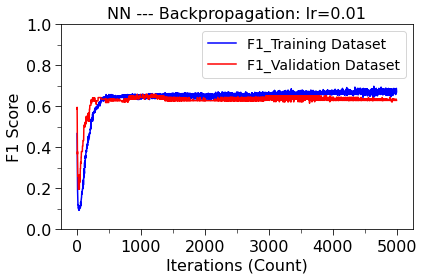

In [20]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#plot the data
plt.plot(np.arange(len(history_lr2.history['f1_score']))
         , history_lr2.history['f1_score']
         , color='blue'
         , label='F1_Training Dataset')
plt.plot(np.arange(len(history_lr2.history['val_f1_score']))
         , history_lr2.history['val_f1_score']
         , color='red'
         , label = 'F1_Validation Dataset')

# format the graph
plt.gca().set_ylim(0,1)
plt.title("NN --- Backpropagation: lr=0.01", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Iterations (Count)", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.tight_layout()
plt.savefig('NN-BP-2.png', dpi=300)
plt.show()

In [21]:
max(history_lr2.history['f1_score']), max(history_lr2.history['val_f1_score'])

(array([0.6981132], dtype=float32), array([0.6588236], dtype=float32))

In [22]:
# run the test at learning rate: 0.001

nn_model = Sequential()
nn_model.add(tf.keras.Input(shape=(8,)))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
#-----------------------------------------------------
opt = SGD(learning_rate=0.001)
nn_model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=tfa.metrics.F1Score(num_classes=1, threshold=0.5))

history_lr3 = nn_model.fit(X_train, Y_train, epochs=5000, validation_data=(X_valid, Y_valid))
#-----------------------------------------------------

Epoch 1/5000
16/16 [==============================] - ETA: 0s - loss: 0.6863 - f1_score: 0.4566

2022-10-16 09:51:37.135236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 17ms/step - loss: 0.6863 - f1_score: 0.4566 - val_loss: 0.6574 - val_f1_score: 0.5859
Epoch 2/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6850 - f1_score: 0.4561 - val_loss: 0.6561 - val_f1_score: 0.5833
Epoch 3/5000


2022-10-16 09:51:37.393753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 7ms/step - loss: 0.6837 - f1_score: 0.4552 - val_loss: 0.6548 - val_f1_score: 0.5745
Epoch 4/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6824 - f1_score: 0.4576 - val_loss: 0.6536 - val_f1_score: 0.5745
Epoch 5/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6812 - f1_score: 0.4560 - val_loss: 0.6525 - val_f1_score: 0.5806
Epoch 6/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6800 - f1_score: 0.4603 - val_loss: 0.6513 - val_f1_score: 0.5806
Epoch 7/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6788 - f1_score: 0.4599 - val_loss: 0.6503 - val_f1_score: 0.5806
Epoch 8/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6778 - f1_score: 0.4528 - val_loss: 0.6492 - val_f1_score: 0.5870
Epoch 9/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6767 - f1_score: 0.4523 - val_loss: 0.6482 - val_f1_score: 0.5870
Epoch 10/5000
16/16

16/16 [==============================] - 0s 7ms/step - loss: 0.6487 - f1_score: 0.3210 - val_loss: 0.6226 - val_f1_score: 0.4127
Epoch 61/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6484 - f1_score: 0.3071 - val_loss: 0.6224 - val_f1_score: 0.4127
Epoch 62/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6482 - f1_score: 0.3000 - val_loss: 0.6222 - val_f1_score: 0.4127
Epoch 63/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6480 - f1_score: 0.3000 - val_loss: 0.6220 - val_f1_score: 0.4127
Epoch 64/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6477 - f1_score: 0.2797 - val_loss: 0.6219 - val_f1_score: 0.4127
Epoch 65/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6475 - f1_score: 0.2735 - val_loss: 0.6217 - val_f1_score: 0.4127
Epoch 66/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6473 - f1_score: 0.2586 - val_loss: 0.6215 - val_f1_score: 0.4127
Epoch 67/5000

16/16 [==============================] - 0s 6ms/step - loss: 0.6404 - f1_score: 0.1442 - val_loss: 0.6161 - val_f1_score: 0.2909
Epoch 118/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6403 - f1_score: 0.1449 - val_loss: 0.6161 - val_f1_score: 0.2909
Epoch 119/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6402 - f1_score: 0.1449 - val_loss: 0.6160 - val_f1_score: 0.2909
Epoch 120/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6401 - f1_score: 0.1449 - val_loss: 0.6159 - val_f1_score: 0.2909
Epoch 121/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6400 - f1_score: 0.1449 - val_loss: 0.6159 - val_f1_score: 0.2909
Epoch 122/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6399 - f1_score: 0.1456 - val_loss: 0.6158 - val_f1_score: 0.2909
Epoch 123/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6399 - f1_score: 0.1456 - val_loss: 0.6158 - val_f1_score: 0.2909
Epoch 1

Epoch 174/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6363 - f1_score: 0.1122 - val_loss: 0.6132 - val_f1_score: 0.2642
Epoch 175/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6362 - f1_score: 0.1122 - val_loss: 0.6131 - val_f1_score: 0.2642
Epoch 176/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6361 - f1_score: 0.1122 - val_loss: 0.6131 - val_f1_score: 0.2642
Epoch 177/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6361 - f1_score: 0.1122 - val_loss: 0.6130 - val_f1_score: 0.2642
Epoch 178/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6360 - f1_score: 0.1122 - val_loss: 0.6130 - val_f1_score: 0.2642
Epoch 179/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6359 - f1_score: 0.1122 - val_loss: 0.6129 - val_f1_score: 0.2642
Epoch 180/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6359 - f1_score: 0.1122 - val_loss: 0.6129 - val_f1_score:

Epoch 231/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6330 - f1_score: 0.1042 - val_loss: 0.6108 - val_f1_score: 0.2308
Epoch 232/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6329 - f1_score: 0.1042 - val_loss: 0.6107 - val_f1_score: 0.2308
Epoch 233/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6329 - f1_score: 0.1042 - val_loss: 0.6107 - val_f1_score: 0.2308
Epoch 234/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6328 - f1_score: 0.1042 - val_loss: 0.6106 - val_f1_score: 0.2308
Epoch 235/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6328 - f1_score: 0.1042 - val_loss: 0.6106 - val_f1_score: 0.2308
Epoch 236/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6327 - f1_score: 0.1042 - val_loss: 0.6106 - val_f1_score: 0.2308
Epoch 237/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6327 - f1_score: 0.1042 - val_loss: 0.6105 - val_f1_score:

Epoch 288/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6299 - f1_score: 0.1047 - val_loss: 0.6085 - val_f1_score: 0.1961
Epoch 289/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6299 - f1_score: 0.1047 - val_loss: 0.6084 - val_f1_score: 0.1961
Epoch 290/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6298 - f1_score: 0.1047 - val_loss: 0.6084 - val_f1_score: 0.1961
Epoch 291/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6298 - f1_score: 0.1047 - val_loss: 0.6083 - val_f1_score: 0.1961
Epoch 292/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6297 - f1_score: 0.1047 - val_loss: 0.6083 - val_f1_score: 0.1961
Epoch 293/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6297 - f1_score: 0.1047 - val_loss: 0.6083 - val_f1_score: 0.1961
Epoch 294/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6296 - f1_score: 0.1047 - val_loss: 0.6082 - val_f1_score:

Epoch 345/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6269 - f1_score: 0.1146 - val_loss: 0.6062 - val_f1_score: 0.1961
Epoch 346/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6268 - f1_score: 0.1047 - val_loss: 0.6062 - val_f1_score: 0.1961
Epoch 347/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6268 - f1_score: 0.1146 - val_loss: 0.6061 - val_f1_score: 0.1961
Epoch 348/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6267 - f1_score: 0.1146 - val_loss: 0.6061 - val_f1_score: 0.1961
Epoch 349/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6267 - f1_score: 0.1047 - val_loss: 0.6060 - val_f1_score: 0.1961
Epoch 350/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6266 - f1_score: 0.1146 - val_loss: 0.6060 - val_f1_score: 0.1961
Epoch 351/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6266 - f1_score: 0.1047 - val_loss: 0.6060 - val_f1_score:

Epoch 402/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6239 - f1_score: 0.1047 - val_loss: 0.6039 - val_f1_score: 0.2642
Epoch 403/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6239 - f1_score: 0.1047 - val_loss: 0.6039 - val_f1_score: 0.2642
Epoch 404/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6238 - f1_score: 0.1047 - val_loss: 0.6038 - val_f1_score: 0.2642
Epoch 405/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6238 - f1_score: 0.1047 - val_loss: 0.6038 - val_f1_score: 0.2642
Epoch 406/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6237 - f1_score: 0.1047 - val_loss: 0.6037 - val_f1_score: 0.2642
Epoch 407/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6237 - f1_score: 0.1047 - val_loss: 0.6037 - val_f1_score: 0.2642
Epoch 408/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6236 - f1_score: 0.1047 - val_loss: 0.6037 - val_f1_score:

Epoch 459/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6210 - f1_score: 0.1047 - val_loss: 0.6016 - val_f1_score: 0.2642
Epoch 460/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6209 - f1_score: 0.1047 - val_loss: 0.6016 - val_f1_score: 0.2642
Epoch 461/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6209 - f1_score: 0.1047 - val_loss: 0.6015 - val_f1_score: 0.2642
Epoch 462/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6208 - f1_score: 0.1047 - val_loss: 0.6015 - val_f1_score: 0.2963
Epoch 463/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6208 - f1_score: 0.1047 - val_loss: 0.6015 - val_f1_score: 0.2963
Epoch 464/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6207 - f1_score: 0.1047 - val_loss: 0.6014 - val_f1_score: 0.2963
Epoch 465/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6207 - f1_score: 0.1047 - val_loss: 0.6014 - val_f1_score:

Epoch 516/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6180 - f1_score: 0.1146 - val_loss: 0.5993 - val_f1_score: 0.2963
Epoch 517/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6180 - f1_score: 0.1146 - val_loss: 0.5993 - val_f1_score: 0.2963
Epoch 518/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6179 - f1_score: 0.1146 - val_loss: 0.5992 - val_f1_score: 0.2963
Epoch 519/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6179 - f1_score: 0.1146 - val_loss: 0.5992 - val_f1_score: 0.2963
Epoch 520/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6178 - f1_score: 0.1146 - val_loss: 0.5992 - val_f1_score: 0.2963
Epoch 521/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6178 - f1_score: 0.1146 - val_loss: 0.5991 - val_f1_score: 0.2963
Epoch 522/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6177 - f1_score: 0.1146 - val_loss: 0.5991 - val_f1_score:

Epoch 573/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6151 - f1_score: 0.1244 - val_loss: 0.5970 - val_f1_score: 0.3214
Epoch 574/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6151 - f1_score: 0.1244 - val_loss: 0.5970 - val_f1_score: 0.3214
Epoch 575/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6150 - f1_score: 0.1244 - val_loss: 0.5970 - val_f1_score: 0.3214
Epoch 576/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6149 - f1_score: 0.1244 - val_loss: 0.5969 - val_f1_score: 0.3214
Epoch 577/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6149 - f1_score: 0.1244 - val_loss: 0.5969 - val_f1_score: 0.3214
Epoch 578/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6148 - f1_score: 0.1244 - val_loss: 0.5968 - val_f1_score: 0.3214
Epoch 579/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6148 - f1_score: 0.1340 - val_loss: 0.5968 - val_f1_score:

Epoch 630/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6121 - f1_score: 0.1340 - val_loss: 0.5948 - val_f1_score: 0.3214
Epoch 631/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6121 - f1_score: 0.1340 - val_loss: 0.5947 - val_f1_score: 0.3214
Epoch 632/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6120 - f1_score: 0.1340 - val_loss: 0.5947 - val_f1_score: 0.3214
Epoch 633/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6120 - f1_score: 0.1340 - val_loss: 0.5946 - val_f1_score: 0.3214
Epoch 634/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6119 - f1_score: 0.1340 - val_loss: 0.5946 - val_f1_score: 0.3214
Epoch 635/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6119 - f1_score: 0.1340 - val_loss: 0.5946 - val_f1_score: 0.3214
Epoch 636/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6118 - f1_score: 0.1436 - val_loss: 0.5945 - val_f1_score:

Epoch 687/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6091 - f1_score: 0.1531 - val_loss: 0.5924 - val_f1_score: 0.3793
Epoch 688/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6090 - f1_score: 0.1531 - val_loss: 0.5924 - val_f1_score: 0.3793
Epoch 689/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6090 - f1_score: 0.1531 - val_loss: 0.5923 - val_f1_score: 0.3793
Epoch 690/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6089 - f1_score: 0.1531 - val_loss: 0.5923 - val_f1_score: 0.3793
Epoch 691/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6089 - f1_score: 0.1531 - val_loss: 0.5922 - val_f1_score: 0.3793
Epoch 692/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6088 - f1_score: 0.1531 - val_loss: 0.5922 - val_f1_score: 0.3793
Epoch 693/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6087 - f1_score: 0.1624 - val_loss: 0.5921 - val_f1_score:

Epoch 744/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6060 - f1_score: 0.1818 - val_loss: 0.5901 - val_f1_score: 0.3793
Epoch 745/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6060 - f1_score: 0.1818 - val_loss: 0.5900 - val_f1_score: 0.3793
Epoch 746/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6059 - f1_score: 0.1818 - val_loss: 0.5900 - val_f1_score: 0.3793
Epoch 747/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6059 - f1_score: 0.1818 - val_loss: 0.5900 - val_f1_score: 0.3793
Epoch 748/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6058 - f1_score: 0.1726 - val_loss: 0.5899 - val_f1_score: 0.3793
Epoch 749/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6058 - f1_score: 0.1818 - val_loss: 0.5899 - val_f1_score: 0.3793
Epoch 750/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6057 - f1_score: 0.1818 - val_loss: 0.5898 - val_f1_score:

Epoch 801/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6031 - f1_score: 0.1809 - val_loss: 0.5879 - val_f1_score: 0.4068
Epoch 802/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6030 - f1_score: 0.1809 - val_loss: 0.5878 - val_f1_score: 0.4068
Epoch 803/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6030 - f1_score: 0.1809 - val_loss: 0.5878 - val_f1_score: 0.4068
Epoch 804/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6029 - f1_score: 0.1809 - val_loss: 0.5877 - val_f1_score: 0.4068
Epoch 805/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6029 - f1_score: 0.1900 - val_loss: 0.5877 - val_f1_score: 0.4068
Epoch 806/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6028 - f1_score: 0.1809 - val_loss: 0.5877 - val_f1_score: 0.4068
Epoch 807/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6028 - f1_score: 0.1900 - val_loss: 0.5876 - val_f1_score:

Epoch 858/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.6002 - f1_score: 0.1990 - val_loss: 0.5857 - val_f1_score: 0.4068
Epoch 859/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6001 - f1_score: 0.1990 - val_loss: 0.5857 - val_f1_score: 0.4068
Epoch 860/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6001 - f1_score: 0.1990 - val_loss: 0.5856 - val_f1_score: 0.4068
Epoch 861/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6000 - f1_score: 0.1990 - val_loss: 0.5856 - val_f1_score: 0.4068
Epoch 862/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6000 - f1_score: 0.1990 - val_loss: 0.5855 - val_f1_score: 0.4068
Epoch 863/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5999 - f1_score: 0.1990 - val_loss: 0.5855 - val_f1_score: 0.4068
Epoch 864/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5999 - f1_score: 0.1990 - val_loss: 0.5855 - val_f1_score:

Epoch 915/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5973 - f1_score: 0.1990 - val_loss: 0.5835 - val_f1_score: 0.4068
Epoch 916/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5972 - f1_score: 0.1990 - val_loss: 0.5834 - val_f1_score: 0.4068
Epoch 917/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5972 - f1_score: 0.1990 - val_loss: 0.5834 - val_f1_score: 0.4068
Epoch 918/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5971 - f1_score: 0.1990 - val_loss: 0.5834 - val_f1_score: 0.4068
Epoch 919/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5971 - f1_score: 0.1990 - val_loss: 0.5833 - val_f1_score: 0.4068
Epoch 920/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5970 - f1_score: 0.1990 - val_loss: 0.5833 - val_f1_score: 0.4068
Epoch 921/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5970 - f1_score: 0.1990 - val_loss: 0.5832 - val_f1_score:

Epoch 972/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5943 - f1_score: 0.2415 - val_loss: 0.5813 - val_f1_score: 0.4333
Epoch 973/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5943 - f1_score: 0.2415 - val_loss: 0.5813 - val_f1_score: 0.4333
Epoch 974/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5942 - f1_score: 0.2415 - val_loss: 0.5812 - val_f1_score: 0.4333
Epoch 975/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5941 - f1_score: 0.2415 - val_loss: 0.5812 - val_f1_score: 0.4333
Epoch 976/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5941 - f1_score: 0.2415 - val_loss: 0.5812 - val_f1_score: 0.4333
Epoch 977/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5941 - f1_score: 0.2415 - val_loss: 0.5811 - val_f1_score: 0.4333
Epoch 978/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5940 - f1_score: 0.2415 - val_loss: 0.5811 - val_f1_score:

Epoch 1029/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5914 - f1_score: 0.2488 - val_loss: 0.5792 - val_f1_score: 0.4590
Epoch 1030/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5913 - f1_score: 0.2571 - val_loss: 0.5791 - val_f1_score: 0.4590
Epoch 1031/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5913 - f1_score: 0.2571 - val_loss: 0.5791 - val_f1_score: 0.4839
Epoch 1032/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5912 - f1_score: 0.2559 - val_loss: 0.5791 - val_f1_score: 0.4839
Epoch 1033/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5911 - f1_score: 0.2642 - val_loss: 0.5790 - val_f1_score: 0.4839
Epoch 1034/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5911 - f1_score: 0.2642 - val_loss: 0.5790 - val_f1_score: 0.4839
Epoch 1035/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5910 - f1_score: 0.2642 - val_loss: 0.5789 - val_f1

16/16 [==============================] - 0s 6ms/step - loss: 0.5884 - f1_score: 0.2804 - val_loss: 0.5770 - val_f1_score: 0.5079
Epoch 1086/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5884 - f1_score: 0.2804 - val_loss: 0.5770 - val_f1_score: 0.5079
Epoch 1087/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5883 - f1_score: 0.2804 - val_loss: 0.5770 - val_f1_score: 0.5079
Epoch 1088/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5883 - f1_score: 0.2804 - val_loss: 0.5769 - val_f1_score: 0.5079
Epoch 1089/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5882 - f1_score: 0.2804 - val_loss: 0.5769 - val_f1_score: 0.5079
Epoch 1090/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5881 - f1_score: 0.2804 - val_loss: 0.5769 - val_f1_score: 0.5079
Epoch 1091/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5881 - f1_score: 0.2804 - val_loss: 0.5768 - val_f1_score: 0.5079
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5855 - f1_score: 0.2963 - val_loss: 0.5749 - val_f1_score: 0.5079
Epoch 1142/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5854 - f1_score: 0.2963 - val_loss: 0.5749 - val_f1_score: 0.5079
Epoch 1143/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5854 - f1_score: 0.3119 - val_loss: 0.5748 - val_f1_score: 0.5079
Epoch 1144/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5853 - f1_score: 0.3196 - val_loss: 0.5748 - val_f1_score: 0.5079
Epoch 1145/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5852 - f1_score: 0.3196 - val_loss: 0.5747 - val_f1_score: 0.5079
Epoch 1146/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5852 - f1_score: 0.3119 - val_loss: 0.5747 - val_f1_score: 0.5079
Epoch 1147/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5851 - f1_score: 0.3196 - val_loss: 0.5747 - val_f1_score: 0.5079
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5825 - f1_score: 0.3333 - val_loss: 0.5728 - val_f1_score: 0.5000
Epoch 1198/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5824 - f1_score: 0.3333 - val_loss: 0.5727 - val_f1_score: 0.5000
Epoch 1199/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5824 - f1_score: 0.3333 - val_loss: 0.5727 - val_f1_score: 0.5000
Epoch 1200/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5823 - f1_score: 0.3333 - val_loss: 0.5727 - val_f1_score: 0.5000
Epoch 1201/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5823 - f1_score: 0.3333 - val_loss: 0.5726 - val_f1_score: 0.5000
Epoch 1202/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5822 - f1_score: 0.3333 - val_loss: 0.5726 - val_f1_score: 0.5000
Epoch 1203/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5822 - f1_score: 0.3333 - val_loss: 0.5725 - val_f1_score: 0.5000
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5795 - f1_score: 0.3378 - val_loss: 0.5706 - val_f1_score: 0.5231
Epoch 1254/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5795 - f1_score: 0.3378 - val_loss: 0.5706 - val_f1_score: 0.5231
Epoch 1255/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5794 - f1_score: 0.3378 - val_loss: 0.5705 - val_f1_score: 0.5231
Epoch 1256/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5793 - f1_score: 0.3378 - val_loss: 0.5705 - val_f1_score: 0.5231
Epoch 1257/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5793 - f1_score: 0.3378 - val_loss: 0.5705 - val_f1_score: 0.5231
Epoch 1258/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5792 - f1_score: 0.3378 - val_loss: 0.5704 - val_f1_score: 0.5231
Epoch 1259/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5792 - f1_score: 0.3378 - val_loss: 0.5704 - val_f1_score: 0.5231
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5765 - f1_score: 0.3509 - val_loss: 0.5685 - val_f1_score: 0.5152
Epoch 1310/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5765 - f1_score: 0.3509 - val_loss: 0.5685 - val_f1_score: 0.5152
Epoch 1311/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5764 - f1_score: 0.3509 - val_loss: 0.5685 - val_f1_score: 0.5152
Epoch 1312/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5764 - f1_score: 0.3581 - val_loss: 0.5684 - val_f1_score: 0.5152
Epoch 1313/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5763 - f1_score: 0.3581 - val_loss: 0.5684 - val_f1_score: 0.5152
Epoch 1314/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5763 - f1_score: 0.3581 - val_loss: 0.5684 - val_f1_score: 0.5152
Epoch 1315/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5762 - f1_score: 0.3581 - val_loss: 0.5683 - val_f1_score: 0.5152
E

16/16 [==============================] - 0s 6ms/step - loss: 0.5736 - f1_score: 0.3652 - val_loss: 0.5665 - val_f1_score: 0.5373
Epoch 1366/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5735 - f1_score: 0.3652 - val_loss: 0.5664 - val_f1_score: 0.5373
Epoch 1367/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5735 - f1_score: 0.3652 - val_loss: 0.5664 - val_f1_score: 0.5373
Epoch 1368/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5734 - f1_score: 0.3652 - val_loss: 0.5664 - val_f1_score: 0.5373
Epoch 1369/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5733 - f1_score: 0.3652 - val_loss: 0.5663 - val_f1_score: 0.5373
Epoch 1370/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5733 - f1_score: 0.3652 - val_loss: 0.5663 - val_f1_score: 0.5373
Epoch 1371/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5732 - f1_score: 0.3652 - val_loss: 0.5662 - val_f1_score: 0.5373
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5706 - f1_score: 0.3793 - val_loss: 0.5644 - val_f1_score: 0.5294
Epoch 1422/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5705 - f1_score: 0.3793 - val_loss: 0.5644 - val_f1_score: 0.5294
Epoch 1423/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5705 - f1_score: 0.3793 - val_loss: 0.5644 - val_f1_score: 0.5294
Epoch 1424/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5704 - f1_score: 0.3793 - val_loss: 0.5643 - val_f1_score: 0.5294
Epoch 1425/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5704 - f1_score: 0.3793 - val_loss: 0.5643 - val_f1_score: 0.5507
Epoch 1426/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5703 - f1_score: 0.3793 - val_loss: 0.5643 - val_f1_score: 0.5294
Epoch 1427/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5703 - f1_score: 0.3793 - val_loss: 0.5642 - val_f1_score: 0.5507
E

16/16 [==============================] - 0s 6ms/step - loss: 0.5676 - f1_score: 0.3863 - val_loss: 0.5624 - val_f1_score: 0.5507
Epoch 1478/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5675 - f1_score: 0.3863 - val_loss: 0.5624 - val_f1_score: 0.5507
Epoch 1479/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5675 - f1_score: 0.3863 - val_loss: 0.5623 - val_f1_score: 0.5507
Epoch 1480/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5674 - f1_score: 0.3863 - val_loss: 0.5623 - val_f1_score: 0.5507
Epoch 1481/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5674 - f1_score: 0.3932 - val_loss: 0.5622 - val_f1_score: 0.5507
Epoch 1482/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5673 - f1_score: 0.3863 - val_loss: 0.5622 - val_f1_score: 0.5507
Epoch 1483/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5673 - f1_score: 0.3863 - val_loss: 0.5622 - val_f1_score: 0.5507
E

16/16 [==============================] - 0s 6ms/step - loss: 0.5646 - f1_score: 0.4051 - val_loss: 0.5605 - val_f1_score: 0.5507
Epoch 1534/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5645 - f1_score: 0.4068 - val_loss: 0.5604 - val_f1_score: 0.5507
Epoch 1535/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5645 - f1_score: 0.4068 - val_loss: 0.5604 - val_f1_score: 0.5507
Epoch 1536/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5644 - f1_score: 0.4068 - val_loss: 0.5604 - val_f1_score: 0.5507
Epoch 1537/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5644 - f1_score: 0.4068 - val_loss: 0.5603 - val_f1_score: 0.5507
Epoch 1538/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5643 - f1_score: 0.4068 - val_loss: 0.5603 - val_f1_score: 0.5507
Epoch 1539/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5643 - f1_score: 0.4068 - val_loss: 0.5603 - val_f1_score: 0.5507
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5616 - f1_score: 0.4051 - val_loss: 0.5585 - val_f1_score: 0.5507
Epoch 1590/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5616 - f1_score: 0.4051 - val_loss: 0.5585 - val_f1_score: 0.5507
Epoch 1591/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5615 - f1_score: 0.4051 - val_loss: 0.5585 - val_f1_score: 0.5507
Epoch 1592/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5614 - f1_score: 0.4051 - val_loss: 0.5584 - val_f1_score: 0.5507
Epoch 1593/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5614 - f1_score: 0.4051 - val_loss: 0.5584 - val_f1_score: 0.5507
Epoch 1594/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5613 - f1_score: 0.4051 - val_loss: 0.5583 - val_f1_score: 0.5507
Epoch 1595/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5613 - f1_score: 0.4051 - val_loss: 0.5583 - val_f1_score: 0.5507
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5586 - f1_score: 0.4184 - val_loss: 0.5567 - val_f1_score: 0.5429
Epoch 1646/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5586 - f1_score: 0.4184 - val_loss: 0.5566 - val_f1_score: 0.5429
Epoch 1647/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5585 - f1_score: 0.4184 - val_loss: 0.5566 - val_f1_score: 0.5429
Epoch 1648/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5585 - f1_score: 0.4167 - val_loss: 0.5566 - val_f1_score: 0.5429
Epoch 1649/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5584 - f1_score: 0.4167 - val_loss: 0.5565 - val_f1_score: 0.5429
Epoch 1650/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5583 - f1_score: 0.4167 - val_loss: 0.5565 - val_f1_score: 0.5429
Epoch 1651/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5583 - f1_score: 0.4167 - val_loss: 0.5565 - val_f1_score: 0.5429
E

16/16 [==============================] - 0s 6ms/step - loss: 0.5556 - f1_score: 0.4280 - val_loss: 0.5549 - val_f1_score: 0.5352
Epoch 1702/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5556 - f1_score: 0.4280 - val_loss: 0.5548 - val_f1_score: 0.5352
Epoch 1703/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5555 - f1_score: 0.4280 - val_loss: 0.5548 - val_f1_score: 0.5352
Epoch 1704/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5555 - f1_score: 0.4280 - val_loss: 0.5548 - val_f1_score: 0.5352
Epoch 1705/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5554 - f1_score: 0.4280 - val_loss: 0.5548 - val_f1_score: 0.5352
Epoch 1706/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5554 - f1_score: 0.4280 - val_loss: 0.5547 - val_f1_score: 0.5352
Epoch 1707/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5553 - f1_score: 0.4280 - val_loss: 0.5547 - val_f1_score: 0.5352
E

16/16 [==============================] - 0s 6ms/step - loss: 0.5527 - f1_score: 0.4344 - val_loss: 0.5531 - val_f1_score: 0.5278
Epoch 1758/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5526 - f1_score: 0.4408 - val_loss: 0.5531 - val_f1_score: 0.5278
Epoch 1759/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5526 - f1_score: 0.4344 - val_loss: 0.5531 - val_f1_score: 0.5278
Epoch 1760/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5525 - f1_score: 0.4408 - val_loss: 0.5530 - val_f1_score: 0.5278
Epoch 1761/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5525 - f1_score: 0.4344 - val_loss: 0.5530 - val_f1_score: 0.5278
Epoch 1762/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5524 - f1_score: 0.4408 - val_loss: 0.5530 - val_f1_score: 0.5278
Epoch 1763/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5524 - f1_score: 0.4408 - val_loss: 0.5529 - val_f1_score: 0.5278
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5498 - f1_score: 0.4578 - val_loss: 0.5515 - val_f1_score: 0.5676
Epoch 1814/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5497 - f1_score: 0.4578 - val_loss: 0.5515 - val_f1_score: 0.5676
Epoch 1815/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5496 - f1_score: 0.4578 - val_loss: 0.5514 - val_f1_score: 0.5676
Epoch 1816/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5496 - f1_score: 0.4578 - val_loss: 0.5514 - val_f1_score: 0.5676
Epoch 1817/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5495 - f1_score: 0.4578 - val_loss: 0.5514 - val_f1_score: 0.5676
Epoch 1818/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5495 - f1_score: 0.4578 - val_loss: 0.5514 - val_f1_score: 0.5676
Epoch 1819/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5494 - f1_score: 0.4578 - val_loss: 0.5513 - val_f1_score: 0.5676
E

16/16 [==============================] - 0s 6ms/step - loss: 0.5469 - f1_score: 0.4542 - val_loss: 0.5500 - val_f1_score: 0.5676
Epoch 1870/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5468 - f1_score: 0.4542 - val_loss: 0.5499 - val_f1_score: 0.5676
Epoch 1871/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5468 - f1_score: 0.4542 - val_loss: 0.5499 - val_f1_score: 0.5676
Epoch 1872/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5467 - f1_score: 0.4603 - val_loss: 0.5499 - val_f1_score: 0.5676
Epoch 1873/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5467 - f1_score: 0.4603 - val_loss: 0.5499 - val_f1_score: 0.5676
Epoch 1874/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.5466 - f1_score: 0.4603 - val_loss: 0.5498 - val_f1_score: 0.5676
Epoch 1875/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5465 - f1_score: 0.4603 - val_loss: 0.5498 - val_f1_score: 0.5676
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5440 - f1_score: 0.4664 - val_loss: 0.5483 - val_f1_score: 0.5867
Epoch 1926/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5439 - f1_score: 0.4664 - val_loss: 0.5483 - val_f1_score: 0.5867
Epoch 1927/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5439 - f1_score: 0.4664 - val_loss: 0.5483 - val_f1_score: 0.5867
Epoch 1928/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5438 - f1_score: 0.4664 - val_loss: 0.5482 - val_f1_score: 0.5867
Epoch 1929/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5438 - f1_score: 0.4664 - val_loss: 0.5482 - val_f1_score: 0.5867
Epoch 1930/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5437 - f1_score: 0.4664 - val_loss: 0.5482 - val_f1_score: 0.5867
Epoch 1931/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5437 - f1_score: 0.4664 - val_loss: 0.5481 - val_f1_score: 0.5867
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5411 - f1_score: 0.4664 - val_loss: 0.5467 - val_f1_score: 0.6053
Epoch 1982/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5411 - f1_score: 0.4664 - val_loss: 0.5467 - val_f1_score: 0.6053
Epoch 1983/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5410 - f1_score: 0.4664 - val_loss: 0.5467 - val_f1_score: 0.6053
Epoch 1984/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5410 - f1_score: 0.4724 - val_loss: 0.5467 - val_f1_score: 0.6053
Epoch 1985/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5409 - f1_score: 0.4724 - val_loss: 0.5467 - val_f1_score: 0.6053
Epoch 1986/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5409 - f1_score: 0.4706 - val_loss: 0.5466 - val_f1_score: 0.6053
Epoch 1987/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5408 - f1_score: 0.4724 - val_loss: 0.5466 - val_f1_score: 0.6053
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5383 - f1_score: 0.4766 - val_loss: 0.5454 - val_f1_score: 0.6053
Epoch 2038/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5382 - f1_score: 0.4706 - val_loss: 0.5454 - val_f1_score: 0.6053
Epoch 2039/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5382 - f1_score: 0.4766 - val_loss: 0.5454 - val_f1_score: 0.6053
Epoch 2040/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5381 - f1_score: 0.4766 - val_loss: 0.5454 - val_f1_score: 0.6053
Epoch 2041/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5381 - f1_score: 0.4766 - val_loss: 0.5453 - val_f1_score: 0.6053
Epoch 2042/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5380 - f1_score: 0.4766 - val_loss: 0.5453 - val_f1_score: 0.6053
Epoch 2043/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5380 - f1_score: 0.4766 - val_loss: 0.5453 - val_f1_score: 0.6053
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5355 - f1_score: 0.4923 - val_loss: 0.5440 - val_f1_score: 0.6053
Epoch 2094/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5355 - f1_score: 0.4923 - val_loss: 0.5440 - val_f1_score: 0.6053
Epoch 2095/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5354 - f1_score: 0.4923 - val_loss: 0.5440 - val_f1_score: 0.6053
Epoch 2096/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5354 - f1_score: 0.4865 - val_loss: 0.5440 - val_f1_score: 0.6053
Epoch 2097/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5353 - f1_score: 0.4923 - val_loss: 0.5439 - val_f1_score: 0.6053
Epoch 2098/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5353 - f1_score: 0.4923 - val_loss: 0.5439 - val_f1_score: 0.6053
Epoch 2099/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5352 - f1_score: 0.4923 - val_loss: 0.5439 - val_f1_score: 0.6053
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5328 - f1_score: 0.5132 - val_loss: 0.5428 - val_f1_score: 0.6053
Epoch 2150/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5327 - f1_score: 0.5132 - val_loss: 0.5428 - val_f1_score: 0.6053
Epoch 2151/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5327 - f1_score: 0.5132 - val_loss: 0.5428 - val_f1_score: 0.6053
Epoch 2152/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5326 - f1_score: 0.5132 - val_loss: 0.5427 - val_f1_score: 0.6053
Epoch 2153/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5326 - f1_score: 0.5132 - val_loss: 0.5427 - val_f1_score: 0.6053
Epoch 2154/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5325 - f1_score: 0.5132 - val_loss: 0.5427 - val_f1_score: 0.6234
Epoch 2155/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5325 - f1_score: 0.5132 - val_loss: 0.5427 - val_f1_score: 0.6234
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5301 - f1_score: 0.5243 - val_loss: 0.5416 - val_f1_score: 0.6154
Epoch 2206/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5301 - f1_score: 0.5243 - val_loss: 0.5416 - val_f1_score: 0.6154
Epoch 2207/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5300 - f1_score: 0.5243 - val_loss: 0.5416 - val_f1_score: 0.6154
Epoch 2208/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5300 - f1_score: 0.5243 - val_loss: 0.5415 - val_f1_score: 0.6154
Epoch 2209/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5299 - f1_score: 0.5243 - val_loss: 0.5415 - val_f1_score: 0.6154
Epoch 2210/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5299 - f1_score: 0.5299 - val_loss: 0.5415 - val_f1_score: 0.6154
Epoch 2211/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5299 - f1_score: 0.5299 - val_loss: 0.5415 - val_f1_score: 0.6154
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5275 - f1_score: 0.5299 - val_loss: 0.5405 - val_f1_score: 0.6154
Epoch 2262/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5275 - f1_score: 0.5299 - val_loss: 0.5405 - val_f1_score: 0.6154
Epoch 2263/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5274 - f1_score: 0.5299 - val_loss: 0.5405 - val_f1_score: 0.6154
Epoch 2264/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5274 - f1_score: 0.5299 - val_loss: 0.5405 - val_f1_score: 0.6154
Epoch 2265/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5273 - f1_score: 0.5299 - val_loss: 0.5405 - val_f1_score: 0.6154
Epoch 2266/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5273 - f1_score: 0.5299 - val_loss: 0.5404 - val_f1_score: 0.6154
Epoch 2267/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5272 - f1_score: 0.5299 - val_loss: 0.5404 - val_f1_score: 0.6154
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5249 - f1_score: 0.5279 - val_loss: 0.5395 - val_f1_score: 0.6154
Epoch 2318/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5249 - f1_score: 0.5299 - val_loss: 0.5395 - val_f1_score: 0.6154
Epoch 2319/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5248 - f1_score: 0.5299 - val_loss: 0.5395 - val_f1_score: 0.6154
Epoch 2320/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5248 - f1_score: 0.5299 - val_loss: 0.5395 - val_f1_score: 0.6154
Epoch 2321/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5248 - f1_score: 0.5299 - val_loss: 0.5395 - val_f1_score: 0.6154
Epoch 2322/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5247 - f1_score: 0.5299 - val_loss: 0.5395 - val_f1_score: 0.6154
Epoch 2323/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5247 - f1_score: 0.5299 - val_loss: 0.5395 - val_f1_score: 0.6154
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5224 - f1_score: 0.5387 - val_loss: 0.5386 - val_f1_score: 0.6250
Epoch 2374/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5224 - f1_score: 0.5441 - val_loss: 0.5386 - val_f1_score: 0.6250
Epoch 2375/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5223 - f1_score: 0.5387 - val_loss: 0.5385 - val_f1_score: 0.6250
Epoch 2376/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5223 - f1_score: 0.5387 - val_loss: 0.5385 - val_f1_score: 0.6250
Epoch 2377/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5222 - f1_score: 0.5387 - val_loss: 0.5385 - val_f1_score: 0.6250
Epoch 2378/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5222 - f1_score: 0.5387 - val_loss: 0.5385 - val_f1_score: 0.6250
Epoch 2379/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5221 - f1_score: 0.5387 - val_loss: 0.5385 - val_f1_score: 0.6250
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5199 - f1_score: 0.5547 - val_loss: 0.5377 - val_f1_score: 0.6250
Epoch 2430/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5199 - f1_score: 0.5547 - val_loss: 0.5377 - val_f1_score: 0.6250
Epoch 2431/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5199 - f1_score: 0.5547 - val_loss: 0.5377 - val_f1_score: 0.6250
Epoch 2432/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5198 - f1_score: 0.5547 - val_loss: 0.5377 - val_f1_score: 0.6250
Epoch 2433/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5198 - f1_score: 0.5495 - val_loss: 0.5377 - val_f1_score: 0.6250
Epoch 2434/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5197 - f1_score: 0.5547 - val_loss: 0.5377 - val_f1_score: 0.6250
Epoch 2435/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5197 - f1_score: 0.5547 - val_loss: 0.5377 - val_f1_score: 0.6250
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5176 - f1_score: 0.5683 - val_loss: 0.5370 - val_f1_score: 0.6420
Epoch 2486/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5175 - f1_score: 0.5632 - val_loss: 0.5370 - val_f1_score: 0.6420
Epoch 2487/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5175 - f1_score: 0.5683 - val_loss: 0.5369 - val_f1_score: 0.6420
Epoch 2488/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5174 - f1_score: 0.5652 - val_loss: 0.5369 - val_f1_score: 0.6420
Epoch 2489/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5174 - f1_score: 0.5683 - val_loss: 0.5369 - val_f1_score: 0.6420
Epoch 2490/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5173 - f1_score: 0.5683 - val_loss: 0.5369 - val_f1_score: 0.6420
Epoch 2491/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5173 - f1_score: 0.5683 - val_loss: 0.5369 - val_f1_score: 0.6420
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5152 - f1_score: 0.5704 - val_loss: 0.5362 - val_f1_score: 0.6420
Epoch 2542/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5152 - f1_score: 0.5704 - val_loss: 0.5362 - val_f1_score: 0.6420
Epoch 2543/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5151 - f1_score: 0.5704 - val_loss: 0.5362 - val_f1_score: 0.6420
Epoch 2544/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5151 - f1_score: 0.5704 - val_loss: 0.5362 - val_f1_score: 0.6420
Epoch 2545/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5151 - f1_score: 0.5704 - val_loss: 0.5362 - val_f1_score: 0.6420
Epoch 2546/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5150 - f1_score: 0.5704 - val_loss: 0.5361 - val_f1_score: 0.6420
Epoch 2547/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5150 - f1_score: 0.5704 - val_loss: 0.5362 - val_f1_score: 0.6420
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5129 - f1_score: 0.5704 - val_loss: 0.5355 - val_f1_score: 0.6420
Epoch 2598/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5129 - f1_score: 0.5704 - val_loss: 0.5355 - val_f1_score: 0.6420
Epoch 2599/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5129 - f1_score: 0.5704 - val_loss: 0.5355 - val_f1_score: 0.6420
Epoch 2600/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5128 - f1_score: 0.5704 - val_loss: 0.5355 - val_f1_score: 0.6420
Epoch 2601/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5128 - f1_score: 0.5704 - val_loss: 0.5355 - val_f1_score: 0.6420
Epoch 2602/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5127 - f1_score: 0.5704 - val_loss: 0.5355 - val_f1_score: 0.6420
Epoch 2603/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5127 - f1_score: 0.5704 - val_loss: 0.5355 - val_f1_score: 0.6420
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5108 - f1_score: 0.5704 - val_loss: 0.5348 - val_f1_score: 0.6420
Epoch 2654/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5107 - f1_score: 0.5704 - val_loss: 0.5348 - val_f1_score: 0.6420
Epoch 2655/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5107 - f1_score: 0.5704 - val_loss: 0.5348 - val_f1_score: 0.6420
Epoch 2656/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5106 - f1_score: 0.5683 - val_loss: 0.5348 - val_f1_score: 0.6420
Epoch 2657/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5106 - f1_score: 0.5683 - val_loss: 0.5348 - val_f1_score: 0.6420
Epoch 2658/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5106 - f1_score: 0.5683 - val_loss: 0.5348 - val_f1_score: 0.6420
Epoch 2659/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5105 - f1_score: 0.5683 - val_loss: 0.5348 - val_f1_score: 0.6420
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5086 - f1_score: 0.5735 - val_loss: 0.5343 - val_f1_score: 0.6250
Epoch 2710/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5085 - f1_score: 0.5735 - val_loss: 0.5343 - val_f1_score: 0.6250
Epoch 2711/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5085 - f1_score: 0.5735 - val_loss: 0.5343 - val_f1_score: 0.6250
Epoch 2712/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5085 - f1_score: 0.5735 - val_loss: 0.5343 - val_f1_score: 0.6250
Epoch 2713/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5084 - f1_score: 0.5735 - val_loss: 0.5342 - val_f1_score: 0.6250
Epoch 2714/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5084 - f1_score: 0.5735 - val_loss: 0.5342 - val_f1_score: 0.6250
Epoch 2715/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5084 - f1_score: 0.5735 - val_loss: 0.5342 - val_f1_score: 0.6250
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5066 - f1_score: 0.5755 - val_loss: 0.5337 - val_f1_score: 0.6250
Epoch 2766/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5065 - f1_score: 0.5755 - val_loss: 0.5338 - val_f1_score: 0.6250
Epoch 2767/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5065 - f1_score: 0.5755 - val_loss: 0.5338 - val_f1_score: 0.6250
Epoch 2768/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5065 - f1_score: 0.5755 - val_loss: 0.5337 - val_f1_score: 0.6250
Epoch 2769/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5064 - f1_score: 0.5735 - val_loss: 0.5337 - val_f1_score: 0.6250
Epoch 2770/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5064 - f1_score: 0.5755 - val_loss: 0.5337 - val_f1_score: 0.6250
Epoch 2771/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5063 - f1_score: 0.5755 - val_loss: 0.5337 - val_f1_score: 0.6250
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5046 - f1_score: 0.5857 - val_loss: 0.5333 - val_f1_score: 0.6250
Epoch 2822/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5045 - f1_score: 0.5857 - val_loss: 0.5333 - val_f1_score: 0.6250
Epoch 2823/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5045 - f1_score: 0.5857 - val_loss: 0.5333 - val_f1_score: 0.6250
Epoch 2824/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5044 - f1_score: 0.5857 - val_loss: 0.5333 - val_f1_score: 0.6250
Epoch 2825/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5044 - f1_score: 0.5857 - val_loss: 0.5333 - val_f1_score: 0.6250
Epoch 2826/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5044 - f1_score: 0.5857 - val_loss: 0.5332 - val_f1_score: 0.6250
Epoch 2827/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5043 - f1_score: 0.5857 - val_loss: 0.5333 - val_f1_score: 0.6250
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5026 - f1_score: 0.5836 - val_loss: 0.5330 - val_f1_score: 0.6250
Epoch 2878/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5026 - f1_score: 0.5836 - val_loss: 0.5330 - val_f1_score: 0.6250
Epoch 2879/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5026 - f1_score: 0.5857 - val_loss: 0.5330 - val_f1_score: 0.6250
Epoch 2880/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5025 - f1_score: 0.5836 - val_loss: 0.5330 - val_f1_score: 0.6250
Epoch 2881/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5025 - f1_score: 0.5836 - val_loss: 0.5330 - val_f1_score: 0.6250
Epoch 2882/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5025 - f1_score: 0.5836 - val_loss: 0.5330 - val_f1_score: 0.6250
Epoch 2883/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5024 - f1_score: 0.5836 - val_loss: 0.5330 - val_f1_score: 0.6250
E

16/16 [==============================] - 0s 7ms/step - loss: 0.5008 - f1_score: 0.5857 - val_loss: 0.5327 - val_f1_score: 0.6250
Epoch 2934/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5007 - f1_score: 0.5857 - val_loss: 0.5327 - val_f1_score: 0.6250
Epoch 2935/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5007 - f1_score: 0.5857 - val_loss: 0.5327 - val_f1_score: 0.6250
Epoch 2936/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5007 - f1_score: 0.5857 - val_loss: 0.5327 - val_f1_score: 0.6250
Epoch 2937/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5007 - f1_score: 0.5887 - val_loss: 0.5327 - val_f1_score: 0.6250
Epoch 2938/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5006 - f1_score: 0.5857 - val_loss: 0.5327 - val_f1_score: 0.6250
Epoch 2939/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5006 - f1_score: 0.5857 - val_loss: 0.5327 - val_f1_score: 0.6250
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4990 - f1_score: 0.5986 - val_loss: 0.5324 - val_f1_score: 0.6250
Epoch 2990/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4989 - f1_score: 0.5986 - val_loss: 0.5325 - val_f1_score: 0.6250
Epoch 2991/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4989 - f1_score: 0.5965 - val_loss: 0.5324 - val_f1_score: 0.6250
Epoch 2992/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4989 - f1_score: 0.5986 - val_loss: 0.5325 - val_f1_score: 0.6250
Epoch 2993/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4989 - f1_score: 0.5986 - val_loss: 0.5324 - val_f1_score: 0.6250
Epoch 2994/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4988 - f1_score: 0.5986 - val_loss: 0.5324 - val_f1_score: 0.6250
Epoch 2995/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4988 - f1_score: 0.5986 - val_loss: 0.5324 - val_f1_score: 0.6250
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4973 - f1_score: 0.5965 - val_loss: 0.5320 - val_f1_score: 0.6098
Epoch 3046/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4972 - f1_score: 0.5965 - val_loss: 0.5320 - val_f1_score: 0.6098
Epoch 3047/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4972 - f1_score: 0.5965 - val_loss: 0.5320 - val_f1_score: 0.6250
Epoch 3048/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4971 - f1_score: 0.5965 - val_loss: 0.5320 - val_f1_score: 0.6098
Epoch 3049/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4971 - f1_score: 0.5965 - val_loss: 0.5320 - val_f1_score: 0.6098
Epoch 3050/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4971 - f1_score: 0.5965 - val_loss: 0.5320 - val_f1_score: 0.6098
Epoch 3051/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4970 - f1_score: 0.5965 - val_loss: 0.5320 - val_f1_score: 0.6098
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4956 - f1_score: 0.5965 - val_loss: 0.5319 - val_f1_score: 0.6265
Epoch 3102/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4955 - f1_score: 0.5965 - val_loss: 0.5319 - val_f1_score: 0.6265
Epoch 3103/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4955 - f1_score: 0.5965 - val_loss: 0.5319 - val_f1_score: 0.6265
Epoch 3104/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4955 - f1_score: 0.5965 - val_loss: 0.5319 - val_f1_score: 0.6265
Epoch 3105/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4954 - f1_score: 0.5965 - val_loss: 0.5318 - val_f1_score: 0.6265
Epoch 3106/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4954 - f1_score: 0.5965 - val_loss: 0.5319 - val_f1_score: 0.6265
Epoch 3107/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4954 - f1_score: 0.5965 - val_loss: 0.5319 - val_f1_score: 0.6265
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4939 - f1_score: 0.5965 - val_loss: 0.5319 - val_f1_score: 0.6265
Epoch 3158/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4939 - f1_score: 0.5993 - val_loss: 0.5319 - val_f1_score: 0.6265
Epoch 3159/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4939 - f1_score: 0.5944 - val_loss: 0.5318 - val_f1_score: 0.6265
Epoch 3160/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4938 - f1_score: 0.5944 - val_loss: 0.5318 - val_f1_score: 0.6265
Epoch 3161/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4938 - f1_score: 0.5944 - val_loss: 0.5318 - val_f1_score: 0.6265
Epoch 3162/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4938 - f1_score: 0.5944 - val_loss: 0.5318 - val_f1_score: 0.6265
Epoch 3163/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4937 - f1_score: 0.5944 - val_loss: 0.5318 - val_f1_score: 0.6265
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4924 - f1_score: 0.5965 - val_loss: 0.5317 - val_f1_score: 0.6265
Epoch 3214/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4923 - f1_score: 0.5993 - val_loss: 0.5317 - val_f1_score: 0.6265
Epoch 3215/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4923 - f1_score: 0.6014 - val_loss: 0.5316 - val_f1_score: 0.6265
Epoch 3216/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4923 - f1_score: 0.6014 - val_loss: 0.5317 - val_f1_score: 0.6265
Epoch 3217/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4922 - f1_score: 0.5993 - val_loss: 0.5317 - val_f1_score: 0.6265
Epoch 3218/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4922 - f1_score: 0.6014 - val_loss: 0.5318 - val_f1_score: 0.6265
Epoch 3219/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4922 - f1_score: 0.5993 - val_loss: 0.5318 - val_f1_score: 0.6265
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4908 - f1_score: 0.5993 - val_loss: 0.5315 - val_f1_score: 0.6265
Epoch 3270/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4908 - f1_score: 0.6021 - val_loss: 0.5315 - val_f1_score: 0.6265
Epoch 3271/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4908 - f1_score: 0.5972 - val_loss: 0.5315 - val_f1_score: 0.6265
Epoch 3272/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4908 - f1_score: 0.6021 - val_loss: 0.5315 - val_f1_score: 0.6265
Epoch 3273/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4907 - f1_score: 0.5993 - val_loss: 0.5315 - val_f1_score: 0.6265
Epoch 3274/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4907 - f1_score: 0.5993 - val_loss: 0.5315 - val_f1_score: 0.6265
Epoch 3275/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4907 - f1_score: 0.6021 - val_loss: 0.5315 - val_f1_score: 0.6265
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4894 - f1_score: 0.6048 - val_loss: 0.5315 - val_f1_score: 0.6429
Epoch 3326/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4893 - f1_score: 0.6048 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3327/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4893 - f1_score: 0.6069 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3328/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4893 - f1_score: 0.6069 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3329/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4893 - f1_score: 0.6048 - val_loss: 0.5313 - val_f1_score: 0.6429
Epoch 3330/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4893 - f1_score: 0.6069 - val_loss: 0.5313 - val_f1_score: 0.6429
Epoch 3331/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4892 - f1_score: 0.6069 - val_loss: 0.5313 - val_f1_score: 0.6429
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4880 - f1_score: 0.6069 - val_loss: 0.5312 - val_f1_score: 0.6429
Epoch 3382/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4880 - f1_score: 0.6069 - val_loss: 0.5313 - val_f1_score: 0.6429
Epoch 3383/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4880 - f1_score: 0.6069 - val_loss: 0.5313 - val_f1_score: 0.6429
Epoch 3384/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4879 - f1_score: 0.6069 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3385/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4879 - f1_score: 0.6069 - val_loss: 0.5313 - val_f1_score: 0.6429
Epoch 3386/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4879 - f1_score: 0.6069 - val_loss: 0.5313 - val_f1_score: 0.6429
Epoch 3387/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4879 - f1_score: 0.6069 - val_loss: 0.5313 - val_f1_score: 0.6429
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4866 - f1_score: 0.6096 - val_loss: 0.5315 - val_f1_score: 0.6429
Epoch 3438/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4866 - f1_score: 0.6096 - val_loss: 0.5315 - val_f1_score: 0.6429
Epoch 3439/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4866 - f1_score: 0.6096 - val_loss: 0.5315 - val_f1_score: 0.6429
Epoch 3440/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4866 - f1_score: 0.6096 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3441/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4866 - f1_score: 0.6117 - val_loss: 0.5315 - val_f1_score: 0.6429
Epoch 3442/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4865 - f1_score: 0.6096 - val_loss: 0.5315 - val_f1_score: 0.6429
Epoch 3443/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4865 - f1_score: 0.6096 - val_loss: 0.5315 - val_f1_score: 0.6429
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4853 - f1_score: 0.6143 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3494/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4853 - f1_score: 0.6143 - val_loss: 0.5313 - val_f1_score: 0.6429
Epoch 3495/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4853 - f1_score: 0.6143 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3496/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4853 - f1_score: 0.6143 - val_loss: 0.5313 - val_f1_score: 0.6429
Epoch 3497/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4853 - f1_score: 0.6143 - val_loss: 0.5313 - val_f1_score: 0.6429
Epoch 3498/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4852 - f1_score: 0.6143 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3499/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4852 - f1_score: 0.6143 - val_loss: 0.5313 - val_f1_score: 0.6429
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4841 - f1_score: 0.6190 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3550/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4841 - f1_score: 0.6169 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3551/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4841 - f1_score: 0.6169 - val_loss: 0.5313 - val_f1_score: 0.6429
Epoch 3552/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4840 - f1_score: 0.6190 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3553/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4840 - f1_score: 0.6169 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3554/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4840 - f1_score: 0.6190 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3555/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4840 - f1_score: 0.6169 - val_loss: 0.5314 - val_f1_score: 0.6429
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4829 - f1_score: 0.6190 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3606/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4829 - f1_score: 0.6169 - val_loss: 0.5314 - val_f1_score: 0.6429
Epoch 3607/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4829 - f1_score: 0.6190 - val_loss: 0.5315 - val_f1_score: 0.6429
Epoch 3608/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4828 - f1_score: 0.6169 - val_loss: 0.5315 - val_f1_score: 0.6429
Epoch 3609/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4829 - f1_score: 0.6169 - val_loss: 0.5316 - val_f1_score: 0.6429
Epoch 3610/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4828 - f1_score: 0.6169 - val_loss: 0.5316 - val_f1_score: 0.6429
Epoch 3611/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4828 - f1_score: 0.6169 - val_loss: 0.5315 - val_f1_score: 0.6429
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4818 - f1_score: 0.6190 - val_loss: 0.5317 - val_f1_score: 0.6429
Epoch 3662/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4817 - f1_score: 0.6190 - val_loss: 0.5317 - val_f1_score: 0.6429
Epoch 3663/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4817 - f1_score: 0.6190 - val_loss: 0.5317 - val_f1_score: 0.6429
Epoch 3664/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4817 - f1_score: 0.6190 - val_loss: 0.5317 - val_f1_score: 0.6429
Epoch 3665/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4817 - f1_score: 0.6190 - val_loss: 0.5316 - val_f1_score: 0.6429
Epoch 3666/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4816 - f1_score: 0.6190 - val_loss: 0.5317 - val_f1_score: 0.6429
Epoch 3667/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4816 - f1_score: 0.6190 - val_loss: 0.5316 - val_f1_score: 0.6429
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4806 - f1_score: 0.6237 - val_loss: 0.5317 - val_f1_score: 0.6429
Epoch 3718/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4806 - f1_score: 0.6284 - val_loss: 0.5317 - val_f1_score: 0.6429
Epoch 3719/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4806 - f1_score: 0.6284 - val_loss: 0.5316 - val_f1_score: 0.6429
Epoch 3720/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4806 - f1_score: 0.6284 - val_loss: 0.5317 - val_f1_score: 0.6429
Epoch 3721/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4806 - f1_score: 0.6284 - val_loss: 0.5318 - val_f1_score: 0.6429
Epoch 3722/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4806 - f1_score: 0.6284 - val_loss: 0.5317 - val_f1_score: 0.6429
Epoch 3723/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4806 - f1_score: 0.6284 - val_loss: 0.5316 - val_f1_score: 0.6429
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4796 - f1_score: 0.6284 - val_loss: 0.5317 - val_f1_score: 0.6429
Epoch 3774/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4796 - f1_score: 0.6284 - val_loss: 0.5317 - val_f1_score: 0.6429
Epoch 3775/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4795 - f1_score: 0.6284 - val_loss: 0.5316 - val_f1_score: 0.6429
Epoch 3776/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4795 - f1_score: 0.6284 - val_loss: 0.5316 - val_f1_score: 0.6429
Epoch 3777/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4795 - f1_score: 0.6284 - val_loss: 0.5316 - val_f1_score: 0.6429
Epoch 3778/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4795 - f1_score: 0.6284 - val_loss: 0.5316 - val_f1_score: 0.6429
Epoch 3779/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4795 - f1_score: 0.6284 - val_loss: 0.5317 - val_f1_score: 0.6429
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4785 - f1_score: 0.6284 - val_loss: 0.5319 - val_f1_score: 0.6353
Epoch 3830/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4785 - f1_score: 0.6284 - val_loss: 0.5319 - val_f1_score: 0.6353
Epoch 3831/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4785 - f1_score: 0.6330 - val_loss: 0.5319 - val_f1_score: 0.6353
Epoch 3832/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4785 - f1_score: 0.6330 - val_loss: 0.5320 - val_f1_score: 0.6353
Epoch 3833/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4785 - f1_score: 0.6330 - val_loss: 0.5320 - val_f1_score: 0.6353
Epoch 3834/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4785 - f1_score: 0.6330 - val_loss: 0.5320 - val_f1_score: 0.6353
Epoch 3835/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4785 - f1_score: 0.6284 - val_loss: 0.5319 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4776 - f1_score: 0.6330 - val_loss: 0.5321 - val_f1_score: 0.6353
Epoch 3886/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4775 - f1_score: 0.6330 - val_loss: 0.5321 - val_f1_score: 0.6353
Epoch 3887/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4775 - f1_score: 0.6330 - val_loss: 0.5321 - val_f1_score: 0.6353
Epoch 3888/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4775 - f1_score: 0.6330 - val_loss: 0.5321 - val_f1_score: 0.6353
Epoch 3889/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4775 - f1_score: 0.6330 - val_loss: 0.5321 - val_f1_score: 0.6353
Epoch 3890/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4775 - f1_score: 0.6330 - val_loss: 0.5321 - val_f1_score: 0.6353
Epoch 3891/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4775 - f1_score: 0.6330 - val_loss: 0.5320 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4767 - f1_score: 0.6330 - val_loss: 0.5322 - val_f1_score: 0.6353
Epoch 3942/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4766 - f1_score: 0.6330 - val_loss: 0.5323 - val_f1_score: 0.6353
Epoch 3943/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4766 - f1_score: 0.6330 - val_loss: 0.5322 - val_f1_score: 0.6353
Epoch 3944/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4765 - f1_score: 0.6330 - val_loss: 0.5322 - val_f1_score: 0.6353
Epoch 3945/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4765 - f1_score: 0.6330 - val_loss: 0.5322 - val_f1_score: 0.6353
Epoch 3946/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4765 - f1_score: 0.6330 - val_loss: 0.5322 - val_f1_score: 0.6353
Epoch 3947/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4765 - f1_score: 0.6284 - val_loss: 0.5321 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4757 - f1_score: 0.6259 - val_loss: 0.5322 - val_f1_score: 0.6353
Epoch 3998/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4757 - f1_score: 0.6327 - val_loss: 0.5322 - val_f1_score: 0.6353
Epoch 3999/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4757 - f1_score: 0.6305 - val_loss: 0.5322 - val_f1_score: 0.6353
Epoch 4000/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4757 - f1_score: 0.6351 - val_loss: 0.5321 - val_f1_score: 0.6353
Epoch 4001/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4757 - f1_score: 0.6305 - val_loss: 0.5322 - val_f1_score: 0.6353
Epoch 4002/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4756 - f1_score: 0.6259 - val_loss: 0.5322 - val_f1_score: 0.6353
Epoch 4003/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4756 - f1_score: 0.6351 - val_loss: 0.5322 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4748 - f1_score: 0.6327 - val_loss: 0.5323 - val_f1_score: 0.6353
Epoch 4054/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4748 - f1_score: 0.6327 - val_loss: 0.5323 - val_f1_score: 0.6353
Epoch 4055/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4748 - f1_score: 0.6327 - val_loss: 0.5323 - val_f1_score: 0.6353
Epoch 4056/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4748 - f1_score: 0.6327 - val_loss: 0.5323 - val_f1_score: 0.6353
Epoch 4057/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4748 - f1_score: 0.6327 - val_loss: 0.5323 - val_f1_score: 0.6353
Epoch 4058/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4747 - f1_score: 0.6327 - val_loss: 0.5323 - val_f1_score: 0.6353
Epoch 4059/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4747 - f1_score: 0.6327 - val_loss: 0.5323 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4740 - f1_score: 0.6327 - val_loss: 0.5325 - val_f1_score: 0.6353
Epoch 4110/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4739 - f1_score: 0.6373 - val_loss: 0.5324 - val_f1_score: 0.6353
Epoch 4111/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4739 - f1_score: 0.6373 - val_loss: 0.5324 - val_f1_score: 0.6353
Epoch 4112/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4740 - f1_score: 0.6327 - val_loss: 0.5324 - val_f1_score: 0.6353
Epoch 4113/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4739 - f1_score: 0.6327 - val_loss: 0.5324 - val_f1_score: 0.6353
Epoch 4114/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4739 - f1_score: 0.6327 - val_loss: 0.5325 - val_f1_score: 0.6353
Epoch 4115/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4739 - f1_score: 0.6327 - val_loss: 0.5325 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4731 - f1_score: 0.6373 - val_loss: 0.5329 - val_f1_score: 0.6353
Epoch 4166/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4732 - f1_score: 0.6351 - val_loss: 0.5330 - val_f1_score: 0.6353
Epoch 4167/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4731 - f1_score: 0.6373 - val_loss: 0.5330 - val_f1_score: 0.6353
Epoch 4168/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4731 - f1_score: 0.6351 - val_loss: 0.5331 - val_f1_score: 0.6353
Epoch 4169/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4731 - f1_score: 0.6351 - val_loss: 0.5331 - val_f1_score: 0.6353
Epoch 4170/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4731 - f1_score: 0.6351 - val_loss: 0.5331 - val_f1_score: 0.6353
Epoch 4171/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4731 - f1_score: 0.6351 - val_loss: 0.5330 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4724 - f1_score: 0.6373 - val_loss: 0.5331 - val_f1_score: 0.6353
Epoch 4222/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4724 - f1_score: 0.6373 - val_loss: 0.5332 - val_f1_score: 0.6353
Epoch 4223/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4724 - f1_score: 0.6373 - val_loss: 0.5332 - val_f1_score: 0.6353
Epoch 4224/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4723 - f1_score: 0.6373 - val_loss: 0.5332 - val_f1_score: 0.6353
Epoch 4225/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4723 - f1_score: 0.6373 - val_loss: 0.5331 - val_f1_score: 0.6353
Epoch 4226/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4723 - f1_score: 0.6351 - val_loss: 0.5331 - val_f1_score: 0.6353
Epoch 4227/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4723 - f1_score: 0.6373 - val_loss: 0.5331 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4716 - f1_score: 0.6373 - val_loss: 0.5331 - val_f1_score: 0.6353
Epoch 4278/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4716 - f1_score: 0.6373 - val_loss: 0.5330 - val_f1_score: 0.6353
Epoch 4279/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4716 - f1_score: 0.6395 - val_loss: 0.5330 - val_f1_score: 0.6353
Epoch 4280/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4716 - f1_score: 0.6395 - val_loss: 0.5330 - val_f1_score: 0.6353
Epoch 4281/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4716 - f1_score: 0.6395 - val_loss: 0.5331 - val_f1_score: 0.6353
Epoch 4282/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4716 - f1_score: 0.6373 - val_loss: 0.5330 - val_f1_score: 0.6353
Epoch 4283/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4716 - f1_score: 0.6395 - val_loss: 0.5331 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4709 - f1_score: 0.6419 - val_loss: 0.5333 - val_f1_score: 0.6353
Epoch 4334/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4709 - f1_score: 0.6395 - val_loss: 0.5334 - val_f1_score: 0.6353
Epoch 4335/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4709 - f1_score: 0.6419 - val_loss: 0.5334 - val_f1_score: 0.6353
Epoch 4336/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4708 - f1_score: 0.6395 - val_loss: 0.5334 - val_f1_score: 0.6353
Epoch 4337/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4709 - f1_score: 0.6419 - val_loss: 0.5335 - val_f1_score: 0.6353
Epoch 4338/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4708 - f1_score: 0.6419 - val_loss: 0.5334 - val_f1_score: 0.6353
Epoch 4339/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4708 - f1_score: 0.6419 - val_loss: 0.5335 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4702 - f1_score: 0.6395 - val_loss: 0.5332 - val_f1_score: 0.6353
Epoch 4390/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4702 - f1_score: 0.6395 - val_loss: 0.5331 - val_f1_score: 0.6353
Epoch 4391/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4701 - f1_score: 0.6395 - val_loss: 0.5331 - val_f1_score: 0.6353
Epoch 4392/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4701 - f1_score: 0.6395 - val_loss: 0.5330 - val_f1_score: 0.6353
Epoch 4393/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4701 - f1_score: 0.6395 - val_loss: 0.5329 - val_f1_score: 0.6353
Epoch 4394/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4701 - f1_score: 0.6395 - val_loss: 0.5330 - val_f1_score: 0.6353
Epoch 4395/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4701 - f1_score: 0.6395 - val_loss: 0.5330 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4695 - f1_score: 0.6486 - val_loss: 0.5336 - val_f1_score: 0.6353
Epoch 4446/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4695 - f1_score: 0.6486 - val_loss: 0.5336 - val_f1_score: 0.6353
Epoch 4447/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4695 - f1_score: 0.6486 - val_loss: 0.5336 - val_f1_score: 0.6353
Epoch 4448/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4695 - f1_score: 0.6441 - val_loss: 0.5336 - val_f1_score: 0.6353
Epoch 4449/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4694 - f1_score: 0.6486 - val_loss: 0.5336 - val_f1_score: 0.6353
Epoch 4450/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4694 - f1_score: 0.6441 - val_loss: 0.5335 - val_f1_score: 0.6353
Epoch 4451/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.4694 - f1_score: 0.6441 - val_loss: 0.5335 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4688 - f1_score: 0.6486 - val_loss: 0.5340 - val_f1_score: 0.6353
Epoch 4502/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4688 - f1_score: 0.6465 - val_loss: 0.5339 - val_f1_score: 0.6353
Epoch 4503/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4688 - f1_score: 0.6486 - val_loss: 0.5338 - val_f1_score: 0.6353
Epoch 4504/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4688 - f1_score: 0.6486 - val_loss: 0.5338 - val_f1_score: 0.6353
Epoch 4505/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4688 - f1_score: 0.6486 - val_loss: 0.5338 - val_f1_score: 0.6353
Epoch 4506/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4688 - f1_score: 0.6486 - val_loss: 0.5337 - val_f1_score: 0.6353
Epoch 4507/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4687 - f1_score: 0.6486 - val_loss: 0.5337 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4682 - f1_score: 0.6486 - val_loss: 0.5339 - val_f1_score: 0.6353
Epoch 4558/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4681 - f1_score: 0.6508 - val_loss: 0.5339 - val_f1_score: 0.6353
Epoch 4559/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4681 - f1_score: 0.6486 - val_loss: 0.5339 - val_f1_score: 0.6353
Epoch 4560/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4681 - f1_score: 0.6508 - val_loss: 0.5340 - val_f1_score: 0.6353
Epoch 4561/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4681 - f1_score: 0.6486 - val_loss: 0.5339 - val_f1_score: 0.6353
Epoch 4562/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4681 - f1_score: 0.6508 - val_loss: 0.5340 - val_f1_score: 0.6353
Epoch 4563/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4681 - f1_score: 0.6508 - val_loss: 0.5339 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4675 - f1_score: 0.6486 - val_loss: 0.5342 - val_f1_score: 0.6353
Epoch 4614/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4674 - f1_score: 0.6508 - val_loss: 0.5342 - val_f1_score: 0.6353
Epoch 4615/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4674 - f1_score: 0.6486 - val_loss: 0.5343 - val_f1_score: 0.6353
Epoch 4616/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4675 - f1_score: 0.6508 - val_loss: 0.5343 - val_f1_score: 0.6353
Epoch 4617/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4674 - f1_score: 0.6486 - val_loss: 0.5342 - val_f1_score: 0.6353
Epoch 4618/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4674 - f1_score: 0.6508 - val_loss: 0.5342 - val_f1_score: 0.6353
Epoch 4619/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4674 - f1_score: 0.6508 - val_loss: 0.5342 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4669 - f1_score: 0.6465 - val_loss: 0.5345 - val_f1_score: 0.6190
Epoch 4670/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4668 - f1_score: 0.6486 - val_loss: 0.5345 - val_f1_score: 0.6190
Epoch 4671/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4668 - f1_score: 0.6486 - val_loss: 0.5346 - val_f1_score: 0.6190
Epoch 4672/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4668 - f1_score: 0.6465 - val_loss: 0.5347 - val_f1_score: 0.6190
Epoch 4673/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4668 - f1_score: 0.6443 - val_loss: 0.5348 - val_f1_score: 0.6190
Epoch 4674/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4668 - f1_score: 0.6443 - val_loss: 0.5348 - val_f1_score: 0.6190
Epoch 4675/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4668 - f1_score: 0.6443 - val_loss: 0.5349 - val_f1_score: 0.6353
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4662 - f1_score: 0.6508 - val_loss: 0.5343 - val_f1_score: 0.6190
Epoch 4726/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4662 - f1_score: 0.6508 - val_loss: 0.5343 - val_f1_score: 0.6190
Epoch 4727/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4662 - f1_score: 0.6508 - val_loss: 0.5344 - val_f1_score: 0.6190
Epoch 4728/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4662 - f1_score: 0.6508 - val_loss: 0.5344 - val_f1_score: 0.6190
Epoch 4729/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4662 - f1_score: 0.6508 - val_loss: 0.5344 - val_f1_score: 0.6190
Epoch 4730/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4661 - f1_score: 0.6508 - val_loss: 0.5344 - val_f1_score: 0.6190
Epoch 4731/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4662 - f1_score: 0.6508 - val_loss: 0.5344 - val_f1_score: 0.6190
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4656 - f1_score: 0.6508 - val_loss: 0.5345 - val_f1_score: 0.6190
Epoch 4782/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4656 - f1_score: 0.6508 - val_loss: 0.5344 - val_f1_score: 0.6190
Epoch 4783/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4656 - f1_score: 0.6508 - val_loss: 0.5344 - val_f1_score: 0.6190
Epoch 4784/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4655 - f1_score: 0.6508 - val_loss: 0.5345 - val_f1_score: 0.6190
Epoch 4785/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4656 - f1_score: 0.6508 - val_loss: 0.5345 - val_f1_score: 0.6190
Epoch 4786/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4655 - f1_score: 0.6508 - val_loss: 0.5346 - val_f1_score: 0.6190
Epoch 4787/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4656 - f1_score: 0.6508 - val_loss: 0.5346 - val_f1_score: 0.6190
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4650 - f1_score: 0.6508 - val_loss: 0.5347 - val_f1_score: 0.6190
Epoch 4838/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4650 - f1_score: 0.6486 - val_loss: 0.5347 - val_f1_score: 0.6190
Epoch 4839/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4650 - f1_score: 0.6486 - val_loss: 0.5347 - val_f1_score: 0.6190
Epoch 4840/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4650 - f1_score: 0.6486 - val_loss: 0.5348 - val_f1_score: 0.6190
Epoch 4841/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4650 - f1_score: 0.6486 - val_loss: 0.5348 - val_f1_score: 0.6190
Epoch 4842/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4650 - f1_score: 0.6486 - val_loss: 0.5349 - val_f1_score: 0.6190
Epoch 4843/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4650 - f1_score: 0.6465 - val_loss: 0.5350 - val_f1_score: 0.6190
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4645 - f1_score: 0.6486 - val_loss: 0.5346 - val_f1_score: 0.6190
Epoch 4894/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4644 - f1_score: 0.6486 - val_loss: 0.5346 - val_f1_score: 0.6190
Epoch 4895/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4644 - f1_score: 0.6486 - val_loss: 0.5347 - val_f1_score: 0.6190
Epoch 4896/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4644 - f1_score: 0.6486 - val_loss: 0.5347 - val_f1_score: 0.6190
Epoch 4897/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4644 - f1_score: 0.6486 - val_loss: 0.5347 - val_f1_score: 0.6190
Epoch 4898/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4644 - f1_score: 0.6486 - val_loss: 0.5346 - val_f1_score: 0.6190
Epoch 4899/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4644 - f1_score: 0.6486 - val_loss: 0.5346 - val_f1_score: 0.6190
E

16/16 [==============================] - 0s 7ms/step - loss: 0.4639 - f1_score: 0.6486 - val_loss: 0.5347 - val_f1_score: 0.6190
Epoch 4950/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4639 - f1_score: 0.6486 - val_loss: 0.5347 - val_f1_score: 0.6190
Epoch 4951/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4639 - f1_score: 0.6486 - val_loss: 0.5348 - val_f1_score: 0.6190
Epoch 4952/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4638 - f1_score: 0.6486 - val_loss: 0.5349 - val_f1_score: 0.6353
Epoch 4953/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4638 - f1_score: 0.6486 - val_loss: 0.5349 - val_f1_score: 0.6353
Epoch 4954/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4638 - f1_score: 0.6486 - val_loss: 0.5349 - val_f1_score: 0.6353
Epoch 4955/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4638 - f1_score: 0.6486 - val_loss: 0.5350 - val_f1_score: 0.6353
E

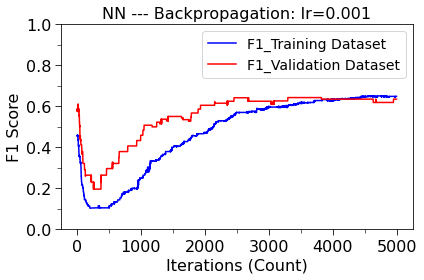

In [23]:
plt.plot(np.arange(len(history_lr3.history['f1_score']))
         , history_lr3.history['f1_score']
         , color='blue'
         , label='F1_Training Dataset')
plt.plot(np.arange(len(history_lr3.history['val_f1_score']))
         , history_lr3.history['val_f1_score']
         , color='red'
         , label = 'F1_Validation Dataset')

# format the graph
plt.gca().set_ylim(0,1)
plt.title("NN --- Backpropagation: lr=0.001", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Iterations (Count)", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.tight_layout()
plt.savefig('NN-BP-3.png', dpi=300)
plt.show()

In [24]:
# learning rate: 0.2

nn_model = Sequential()
nn_model.add(tf.keras.Input(shape=(8,)))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
#-----------------------------------------------------
opt = SGD(learning_rate=0.2)
nn_model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=tfa.metrics.F1Score(num_classes=1, threshold=0.5))

history_lr4 = nn_model.fit(X_train, Y_train, epochs=5000, validation_data=(X_valid, Y_valid))
#-----------------------------------------------------

Epoch 1/5000
16/16 [==============================] - ETA: 0s - loss: 0.6519 - f1_score: 0.2521

2022-10-16 10:00:37.251870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 18ms/step - loss: 0.6519 - f1_score: 0.2521 - val_loss: 0.6136 - val_f1_score: 0.0851
Epoch 2/5000
11/16 [===================>..........] - ETA: 0s - loss: 0.6273 - f1_score: 0.0769

2022-10-16 10:00:37.511104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 7ms/step - loss: 0.6313 - f1_score: 0.0765 - val_loss: 0.6049 - val_f1_score: 0.1961
Epoch 3/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6222 - f1_score: 0.1347 - val_loss: 0.5995 - val_f1_score: 0.0851
Epoch 4/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6128 - f1_score: 0.1361 - val_loss: 0.5903 - val_f1_score: 0.2308
Epoch 5/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.6022 - f1_score: 0.2319 - val_loss: 0.5861 - val_f1_score: 0.1961
Epoch 6/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5908 - f1_score: 0.2111 - val_loss: 0.5745 - val_f1_score: 0.5231
Epoch 7/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5847 - f1_score: 0.3478 - val_loss: 0.5665 - val_f1_score: 0.4923
Epoch 8/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.5710 - f1_score: 0.3882 - val_loss: 0.5638 - val_f1_score: 0.3158
Epoch 9/5000
16/16 

16/16 [==============================] - 0s 7ms/step - loss: 0.4478 - f1_score: 0.6581 - val_loss: 0.5373 - val_f1_score: 0.6329
Epoch 60/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4470 - f1_score: 0.6333 - val_loss: 0.5480 - val_f1_score: 0.6437
Epoch 61/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4497 - f1_score: 0.6535 - val_loss: 0.5450 - val_f1_score: 0.5867
Epoch 62/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4583 - f1_score: 0.6443 - val_loss: 0.5382 - val_f1_score: 0.6429
Epoch 63/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4602 - f1_score: 0.6189 - val_loss: 0.5668 - val_f1_score: 0.6383
Epoch 64/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4488 - f1_score: 0.6431 - val_loss: 0.5381 - val_f1_score: 0.6429
Epoch 65/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4454 - f1_score: 0.6494 - val_loss: 0.5603 - val_f1_score: 0.6452
Epoch 66/5000

16/16 [==============================] - 0s 7ms/step - loss: 0.4401 - f1_score: 0.6513 - val_loss: 0.5891 - val_f1_score: 0.6476
Epoch 117/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4426 - f1_score: 0.6367 - val_loss: 0.5659 - val_f1_score: 0.6458
Epoch 118/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4426 - f1_score: 0.6710 - val_loss: 0.5429 - val_f1_score: 0.6279
Epoch 119/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4429 - f1_score: 0.6358 - val_loss: 0.5338 - val_f1_score: 0.6154
Epoch 120/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4476 - f1_score: 0.6384 - val_loss: 0.5844 - val_f1_score: 0.5000
Epoch 121/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4544 - f1_score: 0.6084 - val_loss: 0.5773 - val_f1_score: 0.6200
Epoch 122/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4375 - f1_score: 0.6646 - val_loss: 0.5533 - val_f1_score: 0.5946
Epoch 1

Epoch 173/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4350 - f1_score: 0.6645 - val_loss: 0.5300 - val_f1_score: 0.6190
Epoch 174/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4341 - f1_score: 0.6667 - val_loss: 0.5370 - val_f1_score: 0.6136
Epoch 175/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4416 - f1_score: 0.6419 - val_loss: 0.5352 - val_f1_score: 0.6353
Epoch 176/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4456 - f1_score: 0.6559 - val_loss: 0.6019 - val_f1_score: 0.6729
Epoch 177/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4458 - f1_score: 0.6472 - val_loss: 0.6061 - val_f1_score: 0.6667
Epoch 178/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4352 - f1_score: 0.6537 - val_loss: 0.5319 - val_f1_score: 0.6190
Epoch 179/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4339 - f1_score: 0.6467 - val_loss: 0.6811 - val_f1_score:

Epoch 230/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4320 - f1_score: 0.6516 - val_loss: 0.6766 - val_f1_score: 0.6838
Epoch 231/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4366 - f1_score: 0.6771 - val_loss: 0.5369 - val_f1_score: 0.6136
Epoch 232/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4316 - f1_score: 0.6688 - val_loss: 0.5335 - val_f1_score: 0.6429
Epoch 233/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4386 - f1_score: 0.6581 - val_loss: 0.5612 - val_f1_score: 0.6465
Epoch 234/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4310 - f1_score: 0.6603 - val_loss: 0.5361 - val_f1_score: 0.6136
Epoch 235/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4306 - f1_score: 0.6537 - val_loss: 0.5390 - val_f1_score: 0.6136
Epoch 236/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4303 - f1_score: 0.6645 - val_loss: 0.5332 - val_f1_score:

Epoch 287/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4278 - f1_score: 0.6623 - val_loss: 0.5949 - val_f1_score: 0.6792
Epoch 288/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4315 - f1_score: 0.6559 - val_loss: 0.5311 - val_f1_score: 0.6265
Epoch 289/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4313 - f1_score: 0.6515 - val_loss: 0.5343 - val_f1_score: 0.6500
Epoch 290/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4354 - f1_score: 0.6581 - val_loss: 0.5314 - val_f1_score: 0.6047
Epoch 291/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4283 - f1_score: 0.6795 - val_loss: 0.5320 - val_f1_score: 0.6190
Epoch 292/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4277 - f1_score: 0.6731 - val_loss: 0.5306 - val_f1_score: 0.6265
Epoch 293/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4291 - f1_score: 0.6603 - val_loss: 0.5399 - val_f1_score:

Epoch 344/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4343 - f1_score: 0.6390 - val_loss: 0.5557 - val_f1_score: 0.6458
Epoch 345/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4254 - f1_score: 0.6875 - val_loss: 0.5599 - val_f1_score: 0.6139
Epoch 346/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4270 - f1_score: 0.6537 - val_loss: 0.5457 - val_f1_score: 0.6383
Epoch 347/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4232 - f1_score: 0.6667 - val_loss: 0.5419 - val_f1_score: 0.6444
Epoch 348/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4244 - f1_score: 0.6516 - val_loss: 0.5417 - val_f1_score: 0.6667
Epoch 349/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4224 - f1_score: 0.6881 - val_loss: 0.5383 - val_f1_score: 0.6250
Epoch 350/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4256 - f1_score: 0.6557 - val_loss: 0.5941 - val_f1_score:

Epoch 401/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4196 - f1_score: 0.6667 - val_loss: 0.5371 - val_f1_score: 0.6250
Epoch 402/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4242 - f1_score: 0.6752 - val_loss: 0.5621 - val_f1_score: 0.6275
Epoch 403/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4199 - f1_score: 0.6875 - val_loss: 0.5458 - val_f1_score: 0.6329
Epoch 404/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4257 - f1_score: 0.6865 - val_loss: 0.5534 - val_f1_score: 0.6392
Epoch 405/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4175 - f1_score: 0.6854 - val_loss: 0.5477 - val_f1_score: 0.6329
Epoch 406/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4224 - f1_score: 0.6645 - val_loss: 0.5471 - val_f1_score: 0.6329
Epoch 407/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4255 - f1_score: 0.6513 - val_loss: 0.5575 - val_f1_score:

Epoch 458/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4214 - f1_score: 0.6750 - val_loss: 0.5416 - val_f1_score: 0.6173
Epoch 459/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4166 - f1_score: 0.6820 - val_loss: 0.5916 - val_f1_score: 0.6415
Epoch 460/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4217 - f1_score: 0.6730 - val_loss: 0.5390 - val_f1_score: 0.6173
Epoch 461/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4222 - f1_score: 0.6515 - val_loss: 0.5401 - val_f1_score: 0.6265
Epoch 462/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.4196 - f1_score: 0.6834 - val_loss: 0.5422 - val_f1_score: 0.6173
Epoch 463/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4233 - f1_score: 0.6730 - val_loss: 0.5417 - val_f1_score: 0.6098
Epoch 464/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4239 - f1_score: 0.6645 - val_loss: 0.5414 - val_f1_score:

Epoch 515/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4156 - f1_score: 0.6837 - val_loss: 0.5579 - val_f1_score: 0.6452
Epoch 516/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4146 - f1_score: 0.6916 - val_loss: 0.5437 - val_f1_score: 0.6024
Epoch 517/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4177 - f1_score: 0.6773 - val_loss: 0.5526 - val_f1_score: 0.6304
Epoch 518/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4184 - f1_score: 0.6811 - val_loss: 0.5441 - val_f1_score: 0.6136
Epoch 519/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4164 - f1_score: 0.6645 - val_loss: 0.5635 - val_f1_score: 0.6337
Epoch 520/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4154 - f1_score: 0.6957 - val_loss: 0.5453 - val_f1_score: 0.6207
Epoch 521/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4132 - f1_score: 0.6688 - val_loss: 0.5496 - val_f1_score:

Epoch 572/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4135 - f1_score: 0.6940 - val_loss: 0.5648 - val_f1_score: 0.6263
Epoch 573/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4123 - f1_score: 0.6813 - val_loss: 0.5526 - val_f1_score: 0.6250
Epoch 574/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4153 - f1_score: 0.6796 - val_loss: 0.5638 - val_f1_score: 0.6329
Epoch 575/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4150 - f1_score: 0.6817 - val_loss: 0.5481 - val_f1_score: 0.6047
Epoch 576/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4247 - f1_score: 0.6645 - val_loss: 0.5462 - val_f1_score: 0.6024
Epoch 577/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4274 - f1_score: 0.6731 - val_loss: 0.5528 - val_f1_score: 0.6304
Epoch 578/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4172 - f1_score: 0.6875 - val_loss: 0.5480 - val_f1_score:

Epoch 629/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4103 - f1_score: 0.6774 - val_loss: 0.5954 - val_f1_score: 0.6542
Epoch 630/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4132 - f1_score: 0.6957 - val_loss: 0.5499 - val_f1_score: 0.6098
Epoch 631/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4094 - f1_score: 0.6774 - val_loss: 0.6319 - val_f1_score: 0.6786
Epoch 632/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4097 - f1_score: 0.6831 - val_loss: 0.5759 - val_f1_score: 0.5974
Epoch 633/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4224 - f1_score: 0.6794 - val_loss: 0.5685 - val_f1_score: 0.6329
Epoch 634/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4141 - f1_score: 0.6818 - val_loss: 0.5493 - val_f1_score: 0.6118
Epoch 635/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4188 - f1_score: 0.6538 - val_loss: 0.6037 - val_f1_score:

Epoch 686/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4083 - f1_score: 0.6688 - val_loss: 0.5551 - val_f1_score: 0.6118
Epoch 687/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4126 - f1_score: 0.6815 - val_loss: 0.5636 - val_f1_score: 0.6250
Epoch 688/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4182 - f1_score: 0.6959 - val_loss: 0.5519 - val_f1_score: 0.6207
Epoch 689/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4136 - f1_score: 0.6751 - val_loss: 0.5754 - val_f1_score: 0.6154
Epoch 690/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4170 - f1_score: 0.6796 - val_loss: 0.5613 - val_f1_score: 0.6304
Epoch 691/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4110 - f1_score: 0.6794 - val_loss: 0.5751 - val_f1_score: 0.6154
Epoch 692/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4197 - f1_score: 0.6997 - val_loss: 0.5638 - val_f1_score:

Epoch 743/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4118 - f1_score: 0.6981 - val_loss: 0.5603 - val_f1_score: 0.6250
Epoch 744/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4044 - f1_score: 0.7051 - val_loss: 0.5581 - val_f1_score: 0.6173
Epoch 745/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4153 - f1_score: 0.6918 - val_loss: 0.5538 - val_f1_score: 0.6190
Epoch 746/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4063 - f1_score: 0.7000 - val_loss: 0.5635 - val_f1_score: 0.6250
Epoch 747/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4075 - f1_score: 0.6881 - val_loss: 0.5748 - val_f1_score: 0.6400
Epoch 748/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4063 - f1_score: 0.6750 - val_loss: 0.5683 - val_f1_score: 0.6042
Epoch 749/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4044 - f1_score: 0.6857 - val_loss: 0.6400 - val_f1_score:

Epoch 800/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4050 - f1_score: 0.6921 - val_loss: 0.5680 - val_f1_score: 0.6200
Epoch 801/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4072 - f1_score: 0.6926 - val_loss: 0.6024 - val_f1_score: 0.6604
Epoch 802/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4089 - f1_score: 0.6957 - val_loss: 0.5636 - val_f1_score: 0.6136
Epoch 803/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4051 - f1_score: 0.6710 - val_loss: 0.5598 - val_f1_score: 0.6154
Epoch 804/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4009 - f1_score: 0.7070 - val_loss: 0.5610 - val_f1_score: 0.6173
Epoch 805/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4073 - f1_score: 0.6711 - val_loss: 0.5640 - val_f1_score: 0.6087
Epoch 806/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4052 - f1_score: 0.6817 - val_loss: 0.5682 - val_f1_score:

Epoch 857/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3952 - f1_score: 0.6937 - val_loss: 0.5582 - val_f1_score: 0.6341
Epoch 858/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3985 - f1_score: 0.6837 - val_loss: 0.5859 - val_f1_score: 0.6076
Epoch 859/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4116 - f1_score: 0.7067 - val_loss: 0.6684 - val_f1_score: 0.6903
Epoch 860/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4077 - f1_score: 0.6899 - val_loss: 0.5542 - val_f1_score: 0.6207
Epoch 861/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3986 - f1_score: 0.7074 - val_loss: 0.5676 - val_f1_score: 0.6087
Epoch 862/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3999 - f1_score: 0.6926 - val_loss: 0.5731 - val_f1_score: 0.6105
Epoch 863/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4025 - f1_score: 0.7044 - val_loss: 0.5671 - val_f1_score:

Epoch 914/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3946 - f1_score: 0.7066 - val_loss: 0.5666 - val_f1_score: 0.6279
Epoch 915/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3994 - f1_score: 0.7089 - val_loss: 0.5780 - val_f1_score: 0.6327
Epoch 916/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3939 - f1_score: 0.6945 - val_loss: 0.5989 - val_f1_score: 0.6471
Epoch 917/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4077 - f1_score: 0.6978 - val_loss: 0.5609 - val_f1_score: 0.6136
Epoch 918/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3982 - f1_score: 0.7093 - val_loss: 0.5649 - val_f1_score: 0.6000
Epoch 919/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3935 - f1_score: 0.7111 - val_loss: 0.5683 - val_f1_score: 0.6341
Epoch 920/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3913 - f1_score: 0.7036 - val_loss: 0.5603 - val_f1_score:

Epoch 971/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3939 - f1_score: 0.7032 - val_loss: 0.5696 - val_f1_score: 0.6087
Epoch 972/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3968 - f1_score: 0.7044 - val_loss: 0.5903 - val_f1_score: 0.6600
Epoch 973/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3999 - f1_score: 0.7220 - val_loss: 0.5774 - val_f1_score: 0.6222
Epoch 974/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4016 - f1_score: 0.6795 - val_loss: 0.5872 - val_f1_score: 0.6250
Epoch 975/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3896 - f1_score: 0.7205 - val_loss: 0.5743 - val_f1_score: 0.6341
Epoch 976/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3971 - f1_score: 0.6820 - val_loss: 0.6115 - val_f1_score: 0.6538
Epoch 977/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3970 - f1_score: 0.6984 - val_loss: 0.5680 - val_f1_score:

Epoch 1028/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4017 - f1_score: 0.7134 - val_loss: 0.6271 - val_f1_score: 0.6542
Epoch 1029/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3917 - f1_score: 0.7183 - val_loss: 0.6749 - val_f1_score: 0.6552
Epoch 1030/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3911 - f1_score: 0.7307 - val_loss: 0.5708 - val_f1_score: 0.5934
Epoch 1031/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3930 - f1_score: 0.7013 - val_loss: 0.5825 - val_f1_score: 0.6250
Epoch 1032/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3856 - f1_score: 0.7307 - val_loss: 0.5857 - val_f1_score: 0.6200
Epoch 1033/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3874 - f1_score: 0.7179 - val_loss: 0.6105 - val_f1_score: 0.6471
Epoch 1034/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3909 - f1_score: 0.7165 - val_loss: 0.6225 - val_f1

16/16 [==============================] - 0s 7ms/step - loss: 0.3900 - f1_score: 0.7124 - val_loss: 0.5996 - val_f1_score: 0.6105
Epoch 1085/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3841 - f1_score: 0.7203 - val_loss: 0.6127 - val_f1_score: 0.6731
Epoch 1086/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3911 - f1_score: 0.7129 - val_loss: 0.5772 - val_f1_score: 0.6279
Epoch 1087/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3857 - f1_score: 0.7029 - val_loss: 0.6192 - val_f1_score: 0.6214
Epoch 1088/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3919 - f1_score: 0.7233 - val_loss: 0.5880 - val_f1_score: 0.6154
Epoch 1089/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3904 - f1_score: 0.7070 - val_loss: 0.5794 - val_f1_score: 0.6341
Epoch 1090/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3893 - f1_score: 0.7129 - val_loss: 0.6691 - val_f1_score: 0.6957
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3826 - f1_score: 0.7250 - val_loss: 0.5834 - val_f1_score: 0.6190
Epoch 1141/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3910 - f1_score: 0.7161 - val_loss: 0.5885 - val_f1_score: 0.6136
Epoch 1142/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3827 - f1_score: 0.7197 - val_loss: 0.5966 - val_f1_score: 0.6292
Epoch 1143/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3933 - f1_score: 0.7238 - val_loss: 0.5912 - val_f1_score: 0.6265
Epoch 1144/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3857 - f1_score: 0.7273 - val_loss: 0.5916 - val_f1_score: 0.6279
Epoch 1145/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3810 - f1_score: 0.7029 - val_loss: 0.6805 - val_f1_score: 0.6783
Epoch 1146/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3913 - f1_score: 0.7195 - val_loss: 0.6309 - val_f1_score: 0.6542
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3824 - f1_score: 0.7048 - val_loss: 0.6002 - val_f1_score: 0.5897
Epoch 1197/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3779 - f1_score: 0.7255 - val_loss: 0.5917 - val_f1_score: 0.6517
Epoch 1198/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3785 - f1_score: 0.7093 - val_loss: 0.8101 - val_f1_score: 0.6777
Epoch 1199/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3986 - f1_score: 0.7217 - val_loss: 0.6160 - val_f1_score: 0.6263
Epoch 1200/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3878 - f1_score: 0.7227 - val_loss: 0.5878 - val_f1_score: 0.5926
Epoch 1201/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3823 - f1_score: 0.7184 - val_loss: 0.6021 - val_f1_score: 0.6222
Epoch 1202/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3842 - f1_score: 0.7197 - val_loss: 0.6660 - val_f1_score: 0.6476
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3765 - f1_score: 0.7484 - val_loss: 0.5889 - val_f1_score: 0.5854
Epoch 1253/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3749 - f1_score: 0.7203 - val_loss: 0.6110 - val_f1_score: 0.5918
Epoch 1254/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3819 - f1_score: 0.7375 - val_loss: 0.5980 - val_f1_score: 0.6374
Epoch 1255/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3713 - f1_score: 0.7231 - val_loss: 0.6043 - val_f1_score: 0.6186
Epoch 1256/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3732 - f1_score: 0.7313 - val_loss: 0.6291 - val_f1_score: 0.6067
Epoch 1257/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3796 - f1_score: 0.7147 - val_loss: 0.5930 - val_f1_score: 0.6353
Epoch 1258/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3748 - f1_score: 0.7184 - val_loss: 0.6397 - val_f1_score: 0.6139
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3796 - f1_score: 0.7307 - val_loss: 0.8059 - val_f1_score: 0.6667
Epoch 1309/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.4134 - f1_score: 0.7009 - val_loss: 0.6082 - val_f1_score: 0.6154
Epoch 1310/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3670 - f1_score: 0.7302 - val_loss: 0.6049 - val_f1_score: 0.5500
Epoch 1311/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3697 - f1_score: 0.7192 - val_loss: 0.6157 - val_f1_score: 0.6250
Epoch 1312/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3674 - f1_score: 0.7296 - val_loss: 0.6206 - val_f1_score: 0.5714
Epoch 1313/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3691 - f1_score: 0.7419 - val_loss: 0.6889 - val_f1_score: 0.6847
Epoch 1314/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3783 - f1_score: 0.7195 - val_loss: 0.6990 - val_f1_score: 0.6783
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3765 - f1_score: 0.7249 - val_loss: 0.6256 - val_f1_score: 0.5783
Epoch 1365/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3655 - f1_score: 0.7074 - val_loss: 0.6286 - val_f1_score: 0.5895
Epoch 1366/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3645 - f1_score: 0.7405 - val_loss: 0.6213 - val_f1_score: 0.6136
Epoch 1367/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3722 - f1_score: 0.7516 - val_loss: 0.6669 - val_f1_score: 0.6667
Epoch 1368/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3640 - f1_score: 0.7500 - val_loss: 0.6290 - val_f1_score: 0.6022
Epoch 1369/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3673 - f1_score: 0.7335 - val_loss: 0.6174 - val_f1_score: 0.5854
Epoch 1370/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3703 - f1_score: 0.7412 - val_loss: 0.6550 - val_f1_score: 0.5882
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3667 - f1_score: 0.7220 - val_loss: 0.6475 - val_f1_score: 0.5500
Epoch 1421/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3768 - f1_score: 0.7261 - val_loss: 0.6538 - val_f1_score: 0.5570
Epoch 1422/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3727 - f1_score: 0.7203 - val_loss: 0.6464 - val_f1_score: 0.5610
Epoch 1423/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3671 - f1_score: 0.7547 - val_loss: 0.6359 - val_f1_score: 0.5909
Epoch 1424/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3640 - f1_score: 0.7329 - val_loss: 0.6302 - val_f1_score: 0.5714
Epoch 1425/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3741 - f1_score: 0.7329 - val_loss: 0.6453 - val_f1_score: 0.5682
Epoch 1426/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3613 - f1_score: 0.7678 - val_loss: 0.6661 - val_f1_score: 0.6226
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3606 - f1_score: 0.7636 - val_loss: 0.6848 - val_f1_score: 0.5789
Epoch 1477/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3718 - f1_score: 0.7273 - val_loss: 0.6932 - val_f1_score: 0.6019
Epoch 1478/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3672 - f1_score: 0.7563 - val_loss: 0.6971 - val_f1_score: 0.6789
Epoch 1479/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3684 - f1_score: 0.7323 - val_loss: 0.6469 - val_f1_score: 0.5778
Epoch 1480/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3659 - f1_score: 0.7296 - val_loss: 0.6630 - val_f1_score: 0.5833
Epoch 1481/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3715 - f1_score: 0.7200 - val_loss: 0.6600 - val_f1_score: 0.5570
Epoch 1482/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3665 - f1_score: 0.7320 - val_loss: 0.6605 - val_f1_score: 0.5814
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3607 - f1_score: 0.7461 - val_loss: 0.6613 - val_f1_score: 0.5682
Epoch 1533/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3613 - f1_score: 0.7645 - val_loss: 0.6748 - val_f1_score: 0.5412
Epoch 1534/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3639 - f1_score: 0.7468 - val_loss: 0.7421 - val_f1_score: 0.6422
Epoch 1535/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3569 - f1_score: 0.7726 - val_loss: 0.6665 - val_f1_score: 0.5882
Epoch 1536/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3616 - f1_score: 0.7673 - val_loss: 0.6581 - val_f1_score: 0.5783
Epoch 1537/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3828 - f1_score: 0.7461 - val_loss: 0.6677 - val_f1_score: 0.5806
Epoch 1538/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3684 - f1_score: 0.7452 - val_loss: 0.6699 - val_f1_score: 0.5854
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3579 - f1_score: 0.7640 - val_loss: 0.6858 - val_f1_score: 0.5957
Epoch 1589/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3605 - f1_score: 0.7313 - val_loss: 0.6791 - val_f1_score: 0.5773
Epoch 1590/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3578 - f1_score: 0.7492 - val_loss: 0.7251 - val_f1_score: 0.6422
Epoch 1591/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3570 - f1_score: 0.7453 - val_loss: 0.6765 - val_f1_score: 0.5500
Epoch 1592/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3565 - f1_score: 0.7445 - val_loss: 0.6929 - val_f1_score: 0.5854
Epoch 1593/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3570 - f1_score: 0.7386 - val_loss: 0.6690 - val_f1_score: 0.5610
Epoch 1594/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3614 - f1_score: 0.7278 - val_loss: 0.7084 - val_f1_score: 0.6095
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3636 - f1_score: 0.7599 - val_loss: 0.8033 - val_f1_score: 0.4857
Epoch 1645/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3658 - f1_score: 0.7331 - val_loss: 0.7744 - val_f1_score: 0.6726
Epoch 1646/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3705 - f1_score: 0.7500 - val_loss: 0.6909 - val_f1_score: 0.5432
Epoch 1647/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3566 - f1_score: 0.7601 - val_loss: 0.6869 - val_f1_score: 0.5432
Epoch 1648/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3544 - f1_score: 0.7795 - val_loss: 0.7052 - val_f1_score: 0.5570
Epoch 1649/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3645 - f1_score: 0.7355 - val_loss: 0.7623 - val_f1_score: 0.6422
Epoch 1650/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3577 - f1_score: 0.7539 - val_loss: 0.6821 - val_f1_score: 0.5778
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3536 - f1_score: 0.7631 - val_loss: 0.7154 - val_f1_score: 0.5376
Epoch 1701/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3496 - f1_score: 0.7660 - val_loss: 0.7035 - val_f1_score: 0.5641
Epoch 1702/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3521 - f1_score: 0.7179 - val_loss: 0.6900 - val_f1_score: 0.5641
Epoch 1703/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3494 - f1_score: 0.7722 - val_loss: 0.6810 - val_f1_score: 0.5882
Epoch 1704/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3545 - f1_score: 0.7516 - val_loss: 0.6876 - val_f1_score: 0.5500
Epoch 1705/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3568 - f1_score: 0.7722 - val_loss: 0.6849 - val_f1_score: 0.5682
Epoch 1706/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3574 - f1_score: 0.7610 - val_loss: 0.7189 - val_f1_score: 0.5882
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3460 - f1_score: 0.7840 - val_loss: 0.6815 - val_f1_score: 0.5647
Epoch 1757/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3533 - f1_score: 0.7492 - val_loss: 0.7216 - val_f1_score: 0.5941
Epoch 1758/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3596 - f1_score: 0.7516 - val_loss: 0.6959 - val_f1_score: 0.5773
Epoch 1759/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3510 - f1_score: 0.7791 - val_loss: 0.6890 - val_f1_score: 0.5500
Epoch 1760/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3499 - f1_score: 0.7524 - val_loss: 0.7424 - val_f1_score: 0.5941
Epoch 1761/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3532 - f1_score: 0.7368 - val_loss: 0.6830 - val_f1_score: 0.5610
Epoch 1762/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3493 - f1_score: 0.7532 - val_loss: 0.6898 - val_f1_score: 0.5349
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3443 - f1_score: 0.7669 - val_loss: 0.7422 - val_f1_score: 0.6019
Epoch 1813/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3438 - f1_score: 0.7720 - val_loss: 0.7127 - val_f1_score: 0.5941
Epoch 1814/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3546 - f1_score: 0.7423 - val_loss: 0.7278 - val_f1_score: 0.6286
Epoch 1815/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3463 - f1_score: 0.7669 - val_loss: 0.6981 - val_f1_score: 0.5500
Epoch 1816/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3426 - f1_score: 0.7547 - val_loss: 0.6977 - val_f1_score: 0.5500
Epoch 1817/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3537 - f1_score: 0.7460 - val_loss: 0.6895 - val_f1_score: 0.5476
Epoch 1818/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3525 - f1_score: 0.7461 - val_loss: 0.6905 - val_f1_score: 0.5679
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3472 - f1_score: 0.7569 - val_loss: 0.7040 - val_f1_score: 0.5778
Epoch 1869/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3470 - f1_score: 0.7640 - val_loss: 0.7319 - val_f1_score: 0.5714
Epoch 1870/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3571 - f1_score: 0.7302 - val_loss: 0.7003 - val_f1_score: 0.5500
Epoch 1871/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3431 - f1_score: 0.7610 - val_loss: 0.7004 - val_f1_score: 0.5476
Epoch 1872/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3432 - f1_score: 0.7654 - val_loss: 0.7171 - val_f1_score: 0.5714
Epoch 1873/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3478 - f1_score: 0.7625 - val_loss: 0.7211 - val_f1_score: 0.5714
Epoch 1874/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3526 - f1_score: 0.7492 - val_loss: 0.6928 - val_f1_score: 0.5647
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3602 - f1_score: 0.7329 - val_loss: 0.7293 - val_f1_score: 0.5743
Epoch 1925/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3463 - f1_score: 0.7516 - val_loss: 0.7159 - val_f1_score: 0.5684
Epoch 1926/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3433 - f1_score: 0.7625 - val_loss: 0.7475 - val_f1_score: 0.6019
Epoch 1927/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3527 - f1_score: 0.7578 - val_loss: 0.7422 - val_f1_score: 0.5941
Epoch 1928/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3520 - f1_score: 0.7740 - val_loss: 0.7174 - val_f1_score: 0.5926
Epoch 1929/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3480 - f1_score: 0.7653 - val_loss: 0.7029 - val_f1_score: 0.5647
Epoch 1930/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3593 - f1_score: 0.7414 - val_loss: 0.8074 - val_f1_score: 0.5479
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3542 - f1_score: 0.7658 - val_loss: 0.7391 - val_f1_score: 0.5859
Epoch 1981/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3479 - f1_score: 0.7584 - val_loss: 0.7246 - val_f1_score: 0.5679
Epoch 1982/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3385 - f1_score: 0.7619 - val_loss: 0.7690 - val_f1_score: 0.6355
Epoch 1983/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3652 - f1_score: 0.7381 - val_loss: 0.7452 - val_f1_score: 0.5714
Epoch 1984/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3492 - f1_score: 0.7740 - val_loss: 0.7247 - val_f1_score: 0.5714
Epoch 1985/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3421 - f1_score: 0.7760 - val_loss: 0.7314 - val_f1_score: 0.5679
Epoch 1986/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3395 - f1_score: 0.7788 - val_loss: 0.7209 - val_f1_score: 0.6024
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3583 - f1_score: 0.7538 - val_loss: 0.7182 - val_f1_score: 0.5591
Epoch 2037/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3309 - f1_score: 0.7516 - val_loss: 0.7431 - val_f1_score: 0.6078
Epoch 2038/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3386 - f1_score: 0.7669 - val_loss: 0.8046 - val_f1_score: 0.5333
Epoch 2039/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3483 - f1_score: 0.7750 - val_loss: 0.7279 - val_f1_score: 0.5625
Epoch 2040/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3390 - f1_score: 0.7492 - val_loss: 0.8849 - val_f1_score: 0.6667
Epoch 2041/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3503 - f1_score: 0.7414 - val_loss: 0.7392 - val_f1_score: 0.5882
Epoch 2042/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3449 - f1_score: 0.7365 - val_loss: 0.7177 - val_f1_score: 0.5747
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3345 - f1_score: 0.7539 - val_loss: 0.8268 - val_f1_score: 0.6038
Epoch 2093/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3476 - f1_score: 0.7701 - val_loss: 0.7385 - val_f1_score: 0.5806
Epoch 2094/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3480 - f1_score: 0.7267 - val_loss: 0.7161 - val_f1_score: 0.5750
Epoch 2095/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3402 - f1_score: 0.7601 - val_loss: 0.7459 - val_f1_score: 0.5657
Epoch 2096/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3300 - f1_score: 0.7734 - val_loss: 0.7676 - val_f1_score: 0.5641
Epoch 2097/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3497 - f1_score: 0.7556 - val_loss: 0.8761 - val_f1_score: 0.6154
Epoch 2098/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3524 - f1_score: 0.7485 - val_loss: 0.7481 - val_f1_score: 0.6000
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3551 - f1_score: 0.7437 - val_loss: 0.7193 - val_f1_score: 0.5556
Epoch 2149/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3343 - f1_score: 0.7664 - val_loss: 0.7571 - val_f1_score: 0.6078
Epoch 2150/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3317 - f1_score: 0.7915 - val_loss: 0.7349 - val_f1_score: 0.5542
Epoch 2151/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3439 - f1_score: 0.7702 - val_loss: 0.7384 - val_f1_score: 0.5897
Epoch 2152/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3419 - f1_score: 0.7586 - val_loss: 0.7240 - val_f1_score: 0.5476
Epoch 2153/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3277 - f1_score: 0.7926 - val_loss: 0.7635 - val_f1_score: 0.6078
Epoch 2154/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3417 - f1_score: 0.7853 - val_loss: 0.7255 - val_f1_score: 0.5393
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3234 - f1_score: 0.7988 - val_loss: 0.7704 - val_f1_score: 0.6000
Epoch 2205/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3339 - f1_score: 0.7692 - val_loss: 0.7301 - val_f1_score: 0.5542
Epoch 2206/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3509 - f1_score: 0.7616 - val_loss: 0.7371 - val_f1_score: 0.5897
Epoch 2207/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3331 - f1_score: 0.7823 - val_loss: 0.7283 - val_f1_score: 0.5476
Epoch 2208/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3380 - f1_score: 0.7516 - val_loss: 0.7720 - val_f1_score: 0.6154
Epoch 2209/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3379 - f1_score: 0.7584 - val_loss: 0.7341 - val_f1_score: 0.5542
Epoch 2210/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3248 - f1_score: 0.7692 - val_loss: 0.7679 - val_f1_score: 0.5750
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3238 - f1_score: 0.7873 - val_loss: 0.7530 - val_f1_score: 0.5542
Epoch 2261/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3257 - f1_score: 0.7740 - val_loss: 0.7994 - val_f1_score: 0.6078
Epoch 2262/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3358 - f1_score: 0.7590 - val_loss: 0.7980 - val_f1_score: 0.5714
Epoch 2263/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3374 - f1_score: 0.7296 - val_loss: 0.7878 - val_f1_score: 0.6154
Epoch 2264/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3464 - f1_score: 0.7500 - val_loss: 0.7377 - val_f1_score: 0.5393
Epoch 2265/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3363 - f1_score: 0.7748 - val_loss: 0.7735 - val_f1_score: 0.5679
Epoch 2266/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3253 - f1_score: 0.7539 - val_loss: 0.7931 - val_f1_score: 0.5714
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3313 - f1_score: 0.7584 - val_loss: 0.7823 - val_f1_score: 0.5714
Epoch 2317/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3301 - f1_score: 0.7781 - val_loss: 0.7804 - val_f1_score: 0.5714
Epoch 2318/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3414 - f1_score: 0.7436 - val_loss: 0.8293 - val_f1_score: 0.6168
Epoch 2319/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3287 - f1_score: 0.7768 - val_loss: 0.7811 - val_f1_score: 0.6105
Epoch 2320/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3518 - f1_score: 0.7539 - val_loss: 0.8647 - val_f1_score: 0.6168
Epoch 2321/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3730 - f1_score: 0.7229 - val_loss: 0.7589 - val_f1_score: 0.5684
Epoch 2322/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3317 - f1_score: 0.7768 - val_loss: 0.8817 - val_f1_score: 0.6296
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3405 - f1_score: 0.7625 - val_loss: 0.8295 - val_f1_score: 0.5962
Epoch 2373/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3350 - f1_score: 0.7720 - val_loss: 0.7633 - val_f1_score: 0.5376
Epoch 2374/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3222 - f1_score: 0.7754 - val_loss: 0.8570 - val_f1_score: 0.6038
Epoch 2375/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3485 - f1_score: 0.7631 - val_loss: 0.7537 - val_f1_score: 0.5455
Epoch 2376/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3505 - f1_score: 0.7625 - val_loss: 0.8008 - val_f1_score: 0.5455
Epoch 2377/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3450 - f1_score: 0.7547 - val_loss: 0.8652 - val_f1_score: 0.5070
Epoch 2378/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3327 - f1_score: 0.7750 - val_loss: 0.8393 - val_f1_score: 0.6226
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3276 - f1_score: 0.7547 - val_loss: 0.8009 - val_f1_score: 0.5714
Epoch 2429/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3356 - f1_score: 0.7586 - val_loss: 0.7741 - val_f1_score: 0.5376
Epoch 2430/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3254 - f1_score: 0.7764 - val_loss: 0.7715 - val_f1_score: 0.5455
Epoch 2431/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3276 - f1_score: 0.8012 - val_loss: 0.7720 - val_f1_score: 0.5517
Epoch 2432/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3332 - f1_score: 0.7702 - val_loss: 0.7996 - val_f1_score: 0.5714
Epoch 2433/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3476 - f1_score: 0.7764 - val_loss: 0.8032 - val_f1_score: 0.5714
Epoch 2434/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3494 - f1_score: 0.7580 - val_loss: 0.7998 - val_f1_score: 0.5882
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3399 - f1_score: 0.7453 - val_loss: 0.9038 - val_f1_score: 0.4412
Epoch 2485/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3359 - f1_score: 0.7662 - val_loss: 0.8148 - val_f1_score: 0.5800
Epoch 2486/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3253 - f1_score: 0.7706 - val_loss: 0.8005 - val_f1_score: 0.5500
Epoch 2487/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3199 - f1_score: 0.7722 - val_loss: 0.8274 - val_f1_score: 0.6019
Epoch 2488/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3346 - f1_score: 0.7826 - val_loss: 0.8153 - val_f1_score: 0.5882
Epoch 2489/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3319 - f1_score: 0.7795 - val_loss: 0.8031 - val_f1_score: 0.6019
Epoch 2490/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3308 - f1_score: 0.7853 - val_loss: 0.7720 - val_f1_score: 0.5412
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3232 - f1_score: 0.7788 - val_loss: 0.7906 - val_f1_score: 0.5679
Epoch 2541/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3229 - f1_score: 0.7726 - val_loss: 0.7719 - val_f1_score: 0.5412
Epoch 2542/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3356 - f1_score: 0.7778 - val_loss: 0.7970 - val_f1_score: 0.5652
Epoch 2543/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3333 - f1_score: 0.7702 - val_loss: 0.7765 - val_f1_score: 0.5581
Epoch 2544/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3241 - f1_score: 0.8111 - val_loss: 0.7860 - val_f1_score: 0.5625
Epoch 2545/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3207 - f1_score: 0.7720 - val_loss: 0.8017 - val_f1_score: 0.5641
Epoch 2546/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3247 - f1_score: 0.7837 - val_loss: 0.7773 - val_f1_score: 0.5412
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3325 - f1_score: 0.7722 - val_loss: 0.7874 - val_f1_score: 0.5393
Epoch 2597/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3303 - f1_score: 0.7654 - val_loss: 0.8008 - val_f1_score: 0.5750
Epoch 2598/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3211 - f1_score: 0.7554 - val_loss: 0.7816 - val_f1_score: 0.5542
Epoch 2599/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3383 - f1_score: 0.7484 - val_loss: 0.8327 - val_f1_score: 0.6019
Epoch 2600/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3230 - f1_score: 0.7881 - val_loss: 0.7963 - val_f1_score: 0.5679
Epoch 2601/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3203 - f1_score: 0.7726 - val_loss: 0.8629 - val_f1_score: 0.6038
Epoch 2602/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3372 - f1_score: 0.7607 - val_loss: 0.7830 - val_f1_score: 0.5610
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3385 - f1_score: 0.7578 - val_loss: 0.8373 - val_f1_score: 0.5316
Epoch 2653/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3252 - f1_score: 0.7702 - val_loss: 0.7956 - val_f1_score: 0.5393
Epoch 2654/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3185 - f1_score: 0.8110 - val_loss: 0.8036 - val_f1_score: 0.5474
Epoch 2655/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3221 - f1_score: 0.7818 - val_loss: 0.7948 - val_f1_score: 0.5909
Epoch 2656/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3136 - f1_score: 0.7788 - val_loss: 0.8248 - val_f1_score: 0.5600
Epoch 2657/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3235 - f1_score: 0.7927 - val_loss: 0.8406 - val_f1_score: 0.5195
Epoch 2658/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3310 - f1_score: 0.7593 - val_loss: 0.8117 - val_f1_score: 0.5625
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3142 - f1_score: 0.8086 - val_loss: 0.9204 - val_f1_score: 0.4348
Epoch 2709/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3302 - f1_score: 0.7419 - val_loss: 0.9015 - val_f1_score: 0.6168
Epoch 2710/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3428 - f1_score: 0.7329 - val_loss: 0.8405 - val_f1_score: 0.5825
Epoch 2711/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3279 - f1_score: 0.7815 - val_loss: 0.9561 - val_f1_score: 0.6087
Epoch 2712/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3367 - f1_score: 0.7857 - val_loss: 0.8086 - val_f1_score: 0.5517
Epoch 2713/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3224 - f1_score: 0.7988 - val_loss: 0.8025 - val_f1_score: 0.5517
Epoch 2714/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3122 - f1_score: 0.8050 - val_loss: 0.8019 - val_f1_score: 0.5581
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3483 - f1_score: 0.7879 - val_loss: 0.8202 - val_f1_score: 0.5532
Epoch 2765/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3248 - f1_score: 0.7831 - val_loss: 0.8489 - val_f1_score: 0.5263
Epoch 2766/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3338 - f1_score: 0.7730 - val_loss: 0.8060 - val_f1_score: 0.5714
Epoch 2767/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3250 - f1_score: 0.7821 - val_loss: 0.8124 - val_f1_score: 0.5542
Epoch 2768/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3328 - f1_score: 0.7702 - val_loss: 0.8108 - val_f1_score: 0.5952
Epoch 2769/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3204 - f1_score: 0.8062 - val_loss: 0.9894 - val_f1_score: 0.5893
Epoch 2770/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3134 - f1_score: 0.8025 - val_loss: 0.8289 - val_f1_score: 0.5714
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3222 - f1_score: 0.7826 - val_loss: 0.8890 - val_f1_score: 0.5741
Epoch 2821/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3249 - f1_score: 0.8012 - val_loss: 0.8456 - val_f1_score: 0.5686
Epoch 2822/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3391 - f1_score: 0.7645 - val_loss: 0.8374 - val_f1_score: 0.5773
Epoch 2823/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3239 - f1_score: 0.7716 - val_loss: 0.8690 - val_f1_score: 0.5825
Epoch 2824/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3137 - f1_score: 0.8110 - val_loss: 0.8279 - val_f1_score: 0.5800
Epoch 2825/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3125 - f1_score: 0.7975 - val_loss: 0.8021 - val_f1_score: 0.5542
Epoch 2826/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3262 - f1_score: 0.7764 - val_loss: 0.8117 - val_f1_score: 0.5412
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3100 - f1_score: 0.7877 - val_loss: 0.8312 - val_f1_score: 0.5800
Epoch 2877/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3223 - f1_score: 0.7815 - val_loss: 0.8188 - val_f1_score: 0.5319
Epoch 2878/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3172 - f1_score: 0.7855 - val_loss: 0.8103 - val_f1_score: 0.5217
Epoch 2879/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3186 - f1_score: 0.7758 - val_loss: 0.9714 - val_f1_score: 0.6071
Epoch 2880/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3223 - f1_score: 0.7953 - val_loss: 0.8243 - val_f1_score: 0.5679
Epoch 2881/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3114 - f1_score: 0.7846 - val_loss: 1.0472 - val_f1_score: 0.6018
Epoch 2882/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3678 - f1_score: 0.7538 - val_loss: 0.8425 - val_f1_score: 0.5743
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3240 - f1_score: 0.7962 - val_loss: 0.8288 - val_f1_score: 0.5412
Epoch 2933/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3510 - f1_score: 0.7791 - val_loss: 0.8188 - val_f1_score: 0.5517
Epoch 2934/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3172 - f1_score: 0.7744 - val_loss: 0.9031 - val_f1_score: 0.4658
Epoch 2935/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3216 - f1_score: 0.7875 - val_loss: 0.8549 - val_f1_score: 0.5800
Epoch 2936/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2999 - f1_score: 0.8025 - val_loss: 0.8470 - val_f1_score: 0.5455
Epoch 2937/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3074 - f1_score: 0.7802 - val_loss: 0.8308 - val_f1_score: 0.5432
Epoch 2938/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3128 - f1_score: 0.7913 - val_loss: 0.8263 - val_f1_score: 0.5610
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3153 - f1_score: 0.7853 - val_loss: 0.8308 - val_f1_score: 0.5745
Epoch 2989/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3042 - f1_score: 0.7911 - val_loss: 0.8701 - val_f1_score: 0.6226
Epoch 2990/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3212 - f1_score: 0.7853 - val_loss: 0.8558 - val_f1_score: 0.5263
Epoch 2991/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3063 - f1_score: 0.8088 - val_loss: 0.8807 - val_f1_score: 0.5825
Epoch 2992/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3412 - f1_score: 0.7524 - val_loss: 0.8129 - val_f1_score: 0.5542
Epoch 2993/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3200 - f1_score: 0.7988 - val_loss: 0.9602 - val_f1_score: 0.6000
Epoch 2994/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3157 - f1_score: 0.7868 - val_loss: 0.9434 - val_f1_score: 0.6055
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3142 - f1_score: 0.7875 - val_loss: 0.8428 - val_f1_score: 0.5652
Epoch 3045/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3071 - f1_score: 0.7988 - val_loss: 0.8663 - val_f1_score: 0.5195
Epoch 3046/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3104 - f1_score: 0.7926 - val_loss: 0.8330 - val_f1_score: 0.5747
Epoch 3047/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3377 - f1_score: 0.7853 - val_loss: 0.8336 - val_f1_score: 0.5542
Epoch 3048/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3117 - f1_score: 0.7871 - val_loss: 0.8254 - val_f1_score: 0.5542
Epoch 3049/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3330 - f1_score: 0.7914 - val_loss: 0.8972 - val_f1_score: 0.6286
Epoch 3050/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3135 - f1_score: 0.7712 - val_loss: 0.8367 - val_f1_score: 0.5476
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3203 - f1_score: 0.7678 - val_loss: 0.8482 - val_f1_score: 0.5542
Epoch 3101/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3064 - f1_score: 0.8100 - val_loss: 0.9083 - val_f1_score: 0.5794
Epoch 3102/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3489 - f1_score: 0.7795 - val_loss: 0.8584 - val_f1_score: 0.5745
Epoch 3103/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3171 - f1_score: 0.7901 - val_loss: 0.9865 - val_f1_score: 0.3881
Epoch 3104/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3274 - f1_score: 0.7736 - val_loss: 0.8834 - val_f1_score: 0.5205
Epoch 3105/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3154 - f1_score: 0.7802 - val_loss: 0.8457 - val_f1_score: 0.5275
Epoch 3106/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3278 - f1_score: 0.8086 - val_loss: 0.8474 - val_f1_score: 0.5435
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3132 - f1_score: 0.7802 - val_loss: 0.8613 - val_f1_score: 0.5455
Epoch 3157/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3176 - f1_score: 0.7788 - val_loss: 0.8421 - val_f1_score: 0.5476
Epoch 3158/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.3083 - f1_score: 0.7950 - val_loss: 0.9563 - val_f1_score: 0.6239
Epoch 3159/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3106 - f1_score: 0.7768 - val_loss: 0.9064 - val_f1_score: 0.4932
Epoch 3160/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3127 - f1_score: 0.7938 - val_loss: 0.8864 - val_f1_score: 0.6019
Epoch 3161/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3352 - f1_score: 0.7952 - val_loss: 1.0471 - val_f1_score: 0.6140
Epoch 3162/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3232 - f1_score: 0.7890 - val_loss: 0.8287 - val_f1_score: 0.5412
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3068 - f1_score: 0.8000 - val_loss: 0.9698 - val_f1_score: 0.6071
Epoch 3213/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3133 - f1_score: 0.7712 - val_loss: 0.8596 - val_f1_score: 0.5455
Epoch 3214/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3034 - f1_score: 0.7866 - val_loss: 0.9658 - val_f1_score: 0.3881
Epoch 3215/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3209 - f1_score: 0.7736 - val_loss: 0.8439 - val_f1_score: 0.5393
Epoch 3216/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3110 - f1_score: 0.7890 - val_loss: 0.8524 - val_f1_score: 0.5625
Epoch 3217/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3030 - f1_score: 0.8098 - val_loss: 1.0500 - val_f1_score: 0.6000
Epoch 3218/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3306 - f1_score: 0.7975 - val_loss: 0.9885 - val_f1_score: 0.5946
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3385 - f1_score: 0.7988 - val_loss: 0.9561 - val_f1_score: 0.5741
Epoch 3269/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2972 - f1_score: 0.7988 - val_loss: 0.8457 - val_f1_score: 0.5647
Epoch 3270/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3040 - f1_score: 0.7890 - val_loss: 0.8908 - val_f1_score: 0.5205
Epoch 3271/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3041 - f1_score: 0.8100 - val_loss: 0.8850 - val_f1_score: 0.5490
Epoch 3272/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3020 - f1_score: 0.8000 - val_loss: 0.8741 - val_f1_score: 0.5195
Epoch 3273/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3402 - f1_score: 0.7601 - val_loss: 0.8623 - val_f1_score: 0.5263
Epoch 3274/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3203 - f1_score: 0.7975 - val_loss: 0.8367 - val_f1_score: 0.5610
E

16/16 [==============================] - 0s 8ms/step - loss: 0.3126 - f1_score: 0.7754 - val_loss: 0.9687 - val_f1_score: 0.5741
Epoch 3325/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3018 - f1_score: 0.8050 - val_loss: 0.8689 - val_f1_score: 0.5542
Epoch 3326/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3054 - f1_score: 0.8062 - val_loss: 0.9695 - val_f1_score: 0.4571
Epoch 3327/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2976 - f1_score: 0.7988 - val_loss: 0.8820 - val_f1_score: 0.5600
Epoch 3328/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3116 - f1_score: 0.7764 - val_loss: 0.8707 - val_f1_score: 0.5567
Epoch 3329/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3228 - f1_score: 0.7815 - val_loss: 0.8834 - val_f1_score: 0.5657
Epoch 3330/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3065 - f1_score: 0.8098 - val_loss: 1.3767 - val_f1_score: 0.6074
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3107 - f1_score: 0.7987 - val_loss: 0.8703 - val_f1_score: 0.5814
Epoch 3381/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3091 - f1_score: 0.7875 - val_loss: 0.9360 - val_f1_score: 0.6111
Epoch 3382/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3114 - f1_score: 0.7976 - val_loss: 0.8874 - val_f1_score: 0.5135
Epoch 3383/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3255 - f1_score: 0.7595 - val_loss: 0.8572 - val_f1_score: 0.5301
Epoch 3384/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3009 - f1_score: 0.8171 - val_loss: 0.8611 - val_f1_score: 0.5366
Epoch 3385/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2975 - f1_score: 0.8012 - val_loss: 0.8523 - val_f1_score: 0.5393
Epoch 3386/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3399 - f1_score: 0.7664 - val_loss: 0.8547 - val_f1_score: 0.5495
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3067 - f1_score: 0.8025 - val_loss: 0.8712 - val_f1_score: 0.5625
Epoch 3437/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.3117 - f1_score: 0.7988 - val_loss: 0.8786 - val_f1_score: 0.5063
Epoch 3438/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3101 - f1_score: 0.7634 - val_loss: 0.8872 - val_f1_score: 0.5263
Epoch 3439/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3045 - f1_score: 0.8111 - val_loss: 0.8733 - val_f1_score: 0.5366
Epoch 3440/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3003 - f1_score: 0.8037 - val_loss: 0.9133 - val_f1_score: 0.5825
Epoch 3441/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.2983 - f1_score: 0.8160 - val_loss: 0.8848 - val_f1_score: 0.5686
Epoch 3442/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2977 - f1_score: 0.8218 - val_loss: 0.8846 - val_f1_score: 0.4872
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3078 - f1_score: 0.8135 - val_loss: 0.8702 - val_f1_score: 0.5185
Epoch 3493/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3047 - f1_score: 0.7901 - val_loss: 0.8720 - val_f1_score: 0.5275
Epoch 3494/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3381 - f1_score: 0.7730 - val_loss: 0.9550 - val_f1_score: 0.4225
Epoch 3495/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3133 - f1_score: 0.7658 - val_loss: 0.8907 - val_f1_score: 0.5800
Epoch 3496/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3287 - f1_score: 0.7726 - val_loss: 0.9879 - val_f1_score: 0.6239
Epoch 3497/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3102 - f1_score: 0.8073 - val_loss: 0.9246 - val_f1_score: 0.5882
Epoch 3498/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3056 - f1_score: 0.8148 - val_loss: 0.8878 - val_f1_score: 0.5000
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3111 - f1_score: 0.7962 - val_loss: 0.9716 - val_f1_score: 0.5946
Epoch 3549/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2993 - f1_score: 0.8160 - val_loss: 1.0163 - val_f1_score: 0.5741
Epoch 3550/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3229 - f1_score: 0.7795 - val_loss: 0.8966 - val_f1_score: 0.5743
Epoch 3551/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3176 - f1_score: 0.7791 - val_loss: 0.8845 - val_f1_score: 0.5581
Epoch 3552/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3038 - f1_score: 0.8000 - val_loss: 0.9458 - val_f1_score: 0.6168
Epoch 3553/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2950 - f1_score: 0.8098 - val_loss: 0.9769 - val_f1_score: 0.4179
Epoch 3554/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3032 - f1_score: 0.7875 - val_loss: 0.8556 - val_f1_score: 0.5393
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3028 - f1_score: 0.8199 - val_loss: 1.0761 - val_f1_score: 0.5946
Epoch 3605/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3075 - f1_score: 0.8160 - val_loss: 0.8898 - val_f1_score: 0.5474
Epoch 3606/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3071 - f1_score: 0.7964 - val_loss: 0.8688 - val_f1_score: 0.5610
Epoch 3607/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3068 - f1_score: 0.8150 - val_loss: 0.9050 - val_f1_score: 0.5714
Epoch 3608/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2971 - f1_score: 0.8160 - val_loss: 0.8879 - val_f1_score: 0.5743
Epoch 3609/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3063 - f1_score: 0.8025 - val_loss: 0.8570 - val_f1_score: 0.5250
Epoch 3610/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2940 - f1_score: 0.8176 - val_loss: 0.9771 - val_f1_score: 0.5741
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2973 - f1_score: 0.7962 - val_loss: 1.1749 - val_f1_score: 0.6050
Epoch 3661/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3231 - f1_score: 0.8110 - val_loss: 0.9598 - val_f1_score: 0.4118
Epoch 3662/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3205 - f1_score: 0.7829 - val_loss: 1.0313 - val_f1_score: 0.3750
Epoch 3663/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3311 - f1_score: 0.7348 - val_loss: 0.8680 - val_f1_score: 0.5495
Epoch 3664/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2983 - f1_score: 0.8193 - val_loss: 0.8692 - val_f1_score: 0.5412
Epoch 3665/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3009 - f1_score: 0.7975 - val_loss: 0.9212 - val_f1_score: 0.5684
Epoch 3666/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3200 - f1_score: 0.7812 - val_loss: 0.9088 - val_f1_score: 0.5859
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2964 - f1_score: 0.8088 - val_loss: 0.8899 - val_f1_score: 0.5532
Epoch 3717/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2878 - f1_score: 0.8150 - val_loss: 1.4193 - val_f1_score: 0.6107
Epoch 3718/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3722 - f1_score: 0.7560 - val_loss: 0.8771 - val_f1_score: 0.5455
Epoch 3719/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3313 - f1_score: 0.7903 - val_loss: 0.9114 - val_f1_score: 0.4533
Epoch 3720/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2932 - f1_score: 0.8173 - val_loss: 0.9615 - val_f1_score: 0.5872
Epoch 3721/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3131 - f1_score: 0.7926 - val_loss: 0.8900 - val_f1_score: 0.5918
Epoch 3722/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3225 - f1_score: 0.7750 - val_loss: 0.9343 - val_f1_score: 0.6346
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2929 - f1_score: 0.8196 - val_loss: 0.8962 - val_f1_score: 0.4941
Epoch 3773/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3149 - f1_score: 0.8037 - val_loss: 0.9132 - val_f1_score: 0.5941
Epoch 3774/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3082 - f1_score: 0.7964 - val_loss: 0.9022 - val_f1_score: 0.5301
Epoch 3775/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3011 - f1_score: 0.7963 - val_loss: 0.9045 - val_f1_score: 0.5185
Epoch 3776/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3077 - f1_score: 0.7826 - val_loss: 0.8831 - val_f1_score: 0.5517
Epoch 3777/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3180 - f1_score: 0.8000 - val_loss: 0.8649 - val_f1_score: 0.5287
Epoch 3778/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2931 - f1_score: 0.7842 - val_loss: 0.8785 - val_f1_score: 0.5349
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3109 - f1_score: 0.7915 - val_loss: 0.8888 - val_f1_score: 0.5349
Epoch 3829/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3227 - f1_score: 0.7791 - val_loss: 0.9395 - val_f1_score: 0.4507
Epoch 3830/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3304 - f1_score: 0.7586 - val_loss: 0.8943 - val_f1_score: 0.6061
Epoch 3831/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3286 - f1_score: 0.7795 - val_loss: 0.8728 - val_f1_score: 0.5412
Epoch 3832/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3017 - f1_score: 0.7950 - val_loss: 0.9794 - val_f1_score: 0.5607
Epoch 3833/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3027 - f1_score: 0.8061 - val_loss: 0.8825 - val_f1_score: 0.5111
Epoch 3834/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3032 - f1_score: 0.8272 - val_loss: 0.9279 - val_f1_score: 0.5490
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3005 - f1_score: 0.8110 - val_loss: 0.9054 - val_f1_score: 0.5800
Epoch 3885/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3167 - f1_score: 0.8098 - val_loss: 0.8755 - val_f1_score: 0.5476
Epoch 3886/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2987 - f1_score: 0.8050 - val_loss: 0.8806 - val_f1_score: 0.5679
Epoch 3887/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3003 - f1_score: 0.8160 - val_loss: 0.9482 - val_f1_score: 0.5660
Epoch 3888/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2905 - f1_score: 0.8073 - val_loss: 0.8755 - val_f1_score: 0.5333
Epoch 3889/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3102 - f1_score: 0.8037 - val_loss: 0.9289 - val_f1_score: 0.5769
Epoch 3890/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3076 - f1_score: 0.8025 - val_loss: 0.9137 - val_f1_score: 0.4737
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3006 - f1_score: 0.8037 - val_loss: 0.9453 - val_f1_score: 0.5545
Epoch 3941/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2954 - f1_score: 0.8075 - val_loss: 0.9999 - val_f1_score: 0.5872
Epoch 3942/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2903 - f1_score: 0.8108 - val_loss: 0.9626 - val_f1_score: 0.4638
Epoch 3943/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3142 - f1_score: 0.8000 - val_loss: 0.9436 - val_f1_score: 0.5743
Epoch 3944/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3235 - f1_score: 0.7915 - val_loss: 0.8995 - val_f1_score: 0.5366
Epoch 3945/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2918 - f1_score: 0.8037 - val_loss: 0.8956 - val_f1_score: 0.5287
Epoch 3946/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3007 - f1_score: 0.8075 - val_loss: 0.9819 - val_f1_score: 0.4412
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3084 - f1_score: 0.7837 - val_loss: 1.2083 - val_f1_score: 0.6102
Epoch 3997/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3456 - f1_score: 0.7952 - val_loss: 0.9007 - val_f1_score: 0.4865
Epoch 3998/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2991 - f1_score: 0.8137 - val_loss: 1.1311 - val_f1_score: 0.6140
Epoch 3999/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3173 - f1_score: 0.8036 - val_loss: 0.9225 - val_f1_score: 0.4615
Epoch 4000/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3019 - f1_score: 0.8100 - val_loss: 0.9535 - val_f1_score: 0.6154
Epoch 4001/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.2960 - f1_score: 0.8196 - val_loss: 0.9552 - val_f1_score: 0.5800
Epoch 4002/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3069 - f1_score: 0.7915 - val_loss: 0.8846 - val_f1_score: 0.5287
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3100 - f1_score: 0.7963 - val_loss: 0.9023 - val_f1_score: 0.5301
Epoch 4053/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3168 - f1_score: 0.8073 - val_loss: 0.9744 - val_f1_score: 0.4789
Epoch 4054/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3163 - f1_score: 0.7736 - val_loss: 0.9618 - val_f1_score: 0.5524
Epoch 4055/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3083 - f1_score: 0.7879 - val_loss: 0.9191 - val_f1_score: 0.5067
Epoch 4056/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3032 - f1_score: 0.7926 - val_loss: 0.9323 - val_f1_score: 0.5474
Epoch 4057/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2973 - f1_score: 0.8110 - val_loss: 0.8774 - val_f1_score: 0.5517
Epoch 4058/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3032 - f1_score: 0.7901 - val_loss: 0.8930 - val_f1_score: 0.5376
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2975 - f1_score: 0.8036 - val_loss: 0.9828 - val_f1_score: 0.4571
Epoch 4109/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3121 - f1_score: 0.7951 - val_loss: 0.9714 - val_f1_score: 0.4658
Epoch 4110/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3231 - f1_score: 0.7788 - val_loss: 0.9040 - val_f1_score: 0.5412
Epoch 4111/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3037 - f1_score: 0.8111 - val_loss: 0.9106 - val_f1_score: 0.5745
Epoch 4112/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3120 - f1_score: 0.8121 - val_loss: 0.9230 - val_f1_score: 0.4810
Epoch 4113/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2911 - f1_score: 0.8165 - val_loss: 0.8986 - val_f1_score: 0.5412
Epoch 4114/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2854 - f1_score: 0.8207 - val_loss: 0.9971 - val_f1_score: 0.5524
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2957 - f1_score: 0.8060 - val_loss: 0.9764 - val_f1_score: 0.5800
Epoch 4165/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3186 - f1_score: 0.7939 - val_loss: 1.3593 - val_f1_score: 0.2222
Epoch 4166/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3399 - f1_score: 0.7664 - val_loss: 0.9419 - val_f1_score: 0.5333
Epoch 4167/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2970 - f1_score: 0.7900 - val_loss: 0.9393 - val_f1_score: 0.5941
Epoch 4168/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2990 - f1_score: 0.8073 - val_loss: 1.0673 - val_f1_score: 0.5946
Epoch 4169/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3057 - f1_score: 0.7915 - val_loss: 1.1803 - val_f1_score: 0.5983
Epoch 4170/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2971 - f1_score: 0.8146 - val_loss: 0.8965 - val_f1_score: 0.5476
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3079 - f1_score: 0.7864 - val_loss: 0.9237 - val_f1_score: 0.4595
Epoch 4221/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3412 - f1_score: 0.7692 - val_loss: 0.9165 - val_f1_score: 0.5652
Epoch 4222/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2977 - f1_score: 0.8049 - val_loss: 0.9821 - val_f1_score: 0.4789
Epoch 4223/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3114 - f1_score: 0.7900 - val_loss: 0.8928 - val_f1_score: 0.5556
Epoch 4224/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2900 - f1_score: 0.8123 - val_loss: 1.0210 - val_f1_score: 0.6195
Epoch 4225/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2984 - f1_score: 0.8024 - val_loss: 0.9863 - val_f1_score: 0.5872
Epoch 4226/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2948 - f1_score: 0.8228 - val_loss: 0.8895 - val_f1_score: 0.5301
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3047 - f1_score: 0.7901 - val_loss: 0.9928 - val_f1_score: 0.4286
Epoch 4277/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2944 - f1_score: 0.7962 - val_loss: 1.0015 - val_f1_score: 0.5660
Epoch 4278/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3064 - f1_score: 0.8000 - val_loss: 0.9096 - val_f1_score: 0.5128
Epoch 4279/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3040 - f1_score: 0.8135 - val_loss: 0.9035 - val_f1_score: 0.4878
Epoch 4280/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2865 - f1_score: 0.7938 - val_loss: 0.9302 - val_f1_score: 0.5591
Epoch 4281/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3098 - f1_score: 0.8182 - val_loss: 1.2930 - val_f1_score: 0.5950
Epoch 4282/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3075 - f1_score: 0.7888 - val_loss: 0.9007 - val_f1_score: 0.5366
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3132 - f1_score: 0.7963 - val_loss: 0.9840 - val_f1_score: 0.4507
Epoch 4333/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3078 - f1_score: 0.7601 - val_loss: 0.9126 - val_f1_score: 0.4658
Epoch 4334/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3084 - f1_score: 0.8050 - val_loss: 0.9163 - val_f1_score: 0.5591
Epoch 4335/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2889 - f1_score: 0.8000 - val_loss: 0.9228 - val_f1_score: 0.4789
Epoch 4336/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2893 - f1_score: 0.7937 - val_loss: 1.0814 - val_f1_score: 0.5841
Epoch 4337/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3374 - f1_score: 0.7976 - val_loss: 0.9382 - val_f1_score: 0.5773
Epoch 4338/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2996 - f1_score: 0.8242 - val_loss: 1.0621 - val_f1_score: 0.3692
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2868 - f1_score: 0.8242 - val_loss: 0.9236 - val_f1_score: 0.5057
Epoch 4389/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2933 - f1_score: 0.8196 - val_loss: 1.0297 - val_f1_score: 0.5741
Epoch 4390/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3011 - f1_score: 0.7975 - val_loss: 1.1853 - val_f1_score: 0.5862
Epoch 4391/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3162 - f1_score: 0.7842 - val_loss: 1.0001 - val_f1_score: 0.4571
Epoch 4392/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3027 - f1_score: 0.8148 - val_loss: 0.9294 - val_f1_score: 0.4750
Epoch 4393/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2816 - f1_score: 0.8185 - val_loss: 0.9794 - val_f1_score: 0.6168
Epoch 4394/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2874 - f1_score: 0.8146 - val_loss: 0.9360 - val_f1_score: 0.6022
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3134 - f1_score: 0.8075 - val_loss: 0.9310 - val_f1_score: 0.5000
Epoch 4445/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2774 - f1_score: 0.8213 - val_loss: 1.0250 - val_f1_score: 0.5472
Epoch 4446/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3245 - f1_score: 0.8012 - val_loss: 0.9871 - val_f1_score: 0.6038
Epoch 4447/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2956 - f1_score: 0.8062 - val_loss: 0.9436 - val_f1_score: 0.4658
Epoch 4448/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3122 - f1_score: 0.8098 - val_loss: 0.9100 - val_f1_score: 0.5287
Epoch 4449/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3010 - f1_score: 0.7938 - val_loss: 1.0321 - val_f1_score: 0.4179
Epoch 4450/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3085 - f1_score: 0.7900 - val_loss: 0.9668 - val_f1_score: 0.4571
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2777 - f1_score: 0.8086 - val_loss: 0.9503 - val_f1_score: 0.5625
Epoch 4501/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2939 - f1_score: 0.8308 - val_loss: 0.9908 - val_f1_score: 0.4789
Epoch 4502/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2993 - f1_score: 0.7951 - val_loss: 0.9580 - val_f1_score: 0.5773
Epoch 4503/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3119 - f1_score: 0.7975 - val_loss: 0.9374 - val_f1_score: 0.4762
Epoch 4504/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2803 - f1_score: 0.8085 - val_loss: 0.9382 - val_f1_score: 0.4800
Epoch 4505/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2863 - f1_score: 0.8075 - val_loss: 0.9251 - val_f1_score: 0.4938
Epoch 4506/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2986 - f1_score: 0.7962 - val_loss: 0.9694 - val_f1_score: 0.5686
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2948 - f1_score: 0.8049 - val_loss: 0.9368 - val_f1_score: 0.4533
Epoch 4557/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3093 - f1_score: 0.7826 - val_loss: 0.9664 - val_f1_score: 0.6154
Epoch 4558/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3023 - f1_score: 0.8061 - val_loss: 1.1105 - val_f1_score: 0.6140
Epoch 4559/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2927 - f1_score: 0.8048 - val_loss: 0.9337 - val_f1_score: 0.5532
Epoch 4560/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3029 - f1_score: 0.7950 - val_loss: 0.9858 - val_f1_score: 0.5714
Epoch 4561/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3112 - f1_score: 0.7988 - val_loss: 0.9288 - val_f1_score: 0.4762
Epoch 4562/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3137 - f1_score: 0.8000 - val_loss: 0.9417 - val_f1_score: 0.4737
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2875 - f1_score: 0.8210 - val_loss: 1.0146 - val_f1_score: 0.5926
Epoch 4613/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2980 - f1_score: 0.7826 - val_loss: 0.9530 - val_f1_score: 0.5349
Epoch 4614/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2821 - f1_score: 0.8221 - val_loss: 0.9385 - val_f1_score: 0.4706
Epoch 4615/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2959 - f1_score: 0.8196 - val_loss: 0.9288 - val_f1_score: 0.4762
Epoch 4616/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2807 - f1_score: 0.8072 - val_loss: 0.9446 - val_f1_score: 0.4474
Epoch 4617/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2928 - f1_score: 0.8162 - val_loss: 0.9242 - val_f1_score: 0.4524
Epoch 4618/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2873 - f1_score: 0.8272 - val_loss: 1.0370 - val_f1_score: 0.6126
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2908 - f1_score: 0.8062 - val_loss: 0.9752 - val_f1_score: 0.4658
Epoch 4669/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2934 - f1_score: 0.8235 - val_loss: 1.3670 - val_f1_score: 0.5620
Epoch 4670/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3374 - f1_score: 0.7818 - val_loss: 1.0168 - val_f1_score: 0.4444
Epoch 4671/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2931 - f1_score: 0.7987 - val_loss: 1.0349 - val_f1_score: 0.6038
Epoch 4672/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2925 - f1_score: 0.7964 - val_loss: 1.0454 - val_f1_score: 0.5577
Epoch 4673/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2901 - f1_score: 0.7927 - val_loss: 1.0599 - val_f1_score: 0.5741
Epoch 4674/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2903 - f1_score: 0.8062 - val_loss: 1.1373 - val_f1_score: 0.6018
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2830 - f1_score: 0.7925 - val_loss: 0.9576 - val_f1_score: 0.5773
Epoch 4725/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3198 - f1_score: 0.7754 - val_loss: 1.0499 - val_f1_score: 0.4348
Epoch 4726/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2969 - f1_score: 0.7950 - val_loss: 1.0553 - val_f1_score: 0.6055
Epoch 4727/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3037 - f1_score: 0.8000 - val_loss: 1.0373 - val_f1_score: 0.4507
Epoch 4728/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2882 - f1_score: 0.8276 - val_loss: 1.0571 - val_f1_score: 0.6071
Epoch 4729/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2868 - f1_score: 0.8168 - val_loss: 1.0123 - val_f1_score: 0.4507
Epoch 4730/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3378 - f1_score: 0.7913 - val_loss: 1.0181 - val_f1_score: 0.6239
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3472 - f1_score: 0.7625 - val_loss: 0.9707 - val_f1_score: 0.4658
Epoch 4781/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2825 - f1_score: 0.8088 - val_loss: 0.9537 - val_f1_score: 0.4658
Epoch 4782/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2845 - f1_score: 0.8012 - val_loss: 0.9549 - val_f1_score: 0.5057
Epoch 4783/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2745 - f1_score: 0.8395 - val_loss: 0.9596 - val_f1_score: 0.5000
Epoch 4784/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2941 - f1_score: 0.8050 - val_loss: 1.0216 - val_f1_score: 0.5631
Epoch 4785/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3078 - f1_score: 0.7901 - val_loss: 0.9983 - val_f1_score: 0.6214
Epoch 4786/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2925 - f1_score: 0.8012 - val_loss: 0.9823 - val_f1_score: 0.5417
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2866 - f1_score: 0.8282 - val_loss: 0.9851 - val_f1_score: 0.5055
Epoch 4837/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2908 - f1_score: 0.8185 - val_loss: 0.9897 - val_f1_score: 0.4578
Epoch 4838/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3028 - f1_score: 0.8135 - val_loss: 1.0348 - val_f1_score: 0.4384
Epoch 4839/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3002 - f1_score: 0.7877 - val_loss: 1.3281 - val_f1_score: 0.2143
Epoch 4840/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3490 - f1_score: 0.7888 - val_loss: 1.0771 - val_f1_score: 0.6055
Epoch 4841/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2881 - f1_score: 0.8135 - val_loss: 0.9723 - val_f1_score: 0.4865
Epoch 4842/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3065 - f1_score: 0.8037 - val_loss: 1.0087 - val_f1_score: 0.5600
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3110 - f1_score: 0.7938 - val_loss: 1.1692 - val_f1_score: 0.3125
Epoch 4893/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3313 - f1_score: 0.7764 - val_loss: 0.9611 - val_f1_score: 0.4706
Epoch 4894/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2964 - f1_score: 0.8061 - val_loss: 1.1102 - val_f1_score: 0.5472
Epoch 4895/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3165 - f1_score: 0.7812 - val_loss: 1.1342 - val_f1_score: 0.6000
Epoch 4896/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2923 - f1_score: 0.7950 - val_loss: 1.0331 - val_f1_score: 0.5849
Epoch 4897/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2847 - f1_score: 0.8196 - val_loss: 0.9438 - val_f1_score: 0.5238
Epoch 4898/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2792 - f1_score: 0.8012 - val_loss: 0.9496 - val_f1_score: 0.4691
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2894 - f1_score: 0.8185 - val_loss: 0.9979 - val_f1_score: 0.4722
Epoch 4949/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2970 - f1_score: 0.8150 - val_loss: 1.0132 - val_f1_score: 0.5217
Epoch 4950/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2922 - f1_score: 0.8037 - val_loss: 1.1896 - val_f1_score: 0.5965
Epoch 4951/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2985 - f1_score: 0.7952 - val_loss: 1.2685 - val_f1_score: 0.6000
Epoch 4952/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3205 - f1_score: 0.8036 - val_loss: 0.9848 - val_f1_score: 0.4828
Epoch 4953/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2758 - f1_score: 0.8424 - val_loss: 0.9860 - val_f1_score: 0.4658
Epoch 4954/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3045 - f1_score: 0.7877 - val_loss: 1.2922 - val_f1_score: 0.6050
E

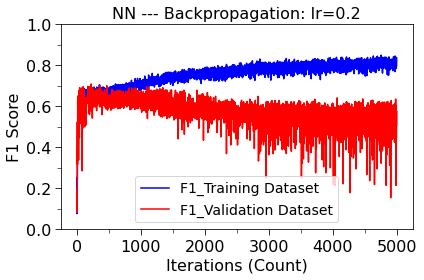

In [25]:
plt.plot(np.arange(len(history_lr4.history['f1_score']))
         , history_lr4.history['f1_score']
         , color='blue'
         , label='F1_Training Dataset')
plt.plot(np.arange(len(history_lr4.history['val_f1_score']))
         , history_lr4.history['val_f1_score']
         , color='red'
         , label = 'F1_Validation Dataset')

# format the graph
plt.gca().set_ylim(0,1)
plt.title("NN --- Backpropagation: lr=0.2", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Iterations (Count)", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.tight_layout()
plt.savefig('NN-BP-4.png', dpi=300)
plt.show()

# RHC

In [30]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive as mlrose

In [31]:
import time

In [32]:
Restart_time = []
f1_train = []
f1_test = []
for i in range(30):
    start = time.time()
    rhc_model = mlrose.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 5000, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, 
                                 random_state =1,
                                 restarts=i,
                                 curve=True)
    rhc_model.fit(Xtrain, Ytrain)
    end = time.time()
    T = end-start
    Restart_time.append(T)
    
    # f1 score on training dataset
    f1_tr = f1_score(Ytrain, rhc_model.predict(Xtrain))
    f1_train.append(f1_tr)
    
    # f1 score on testing dataset
    f1_te = f1_score(Ytest, rhc_model.predict(Xtest))
    f1_test.append(f1_te)

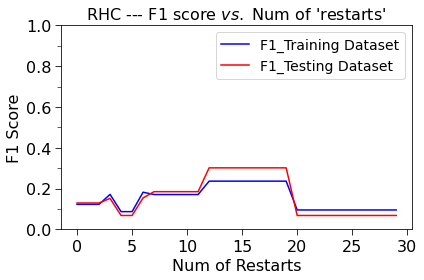

In [33]:
# the relationship of the "restarts" number and f1 score

plt.plot(range(30), f1_train, label='F1_Training Dataset', color='blue')
plt.plot(range(30), f1_test, label='F1_Testing Dataset', color='red')



# format the graph
plt.gca().set_ylim(0,1)
plt.title("RHC --- F1 score $vs.$ Num of 'restarts'", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Num of Restarts", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.tight_layout()
plt.savefig('RHC-1.png', dpi=300)
plt.show()

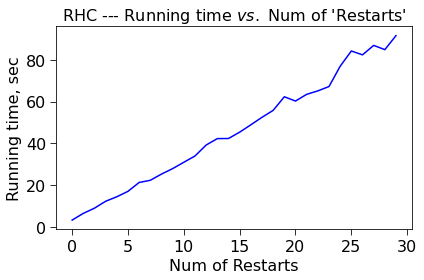

In [34]:
# the relationship of the "restarts" number and runnning time

plt.plot(range(30), Restart_time, color='blue')


# format the graph
plt.title("RHC --- Running time $vs.$ Num of 'Restarts'", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(500))
# ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.tick_params(axis='both', which='minor', size=4)

# plt.legend(fontsize=14)
plt.xlabel("Num of Restarts", fontsize=16)
plt.ylabel("Running time, sec", fontsize=16)
plt.tight_layout()
plt.savefig('RHC-2.png', dpi=300)
plt.show()

In [35]:
arr_training = []
arr_testing = []
for i in np.c_[0.01:0.5:10j]:
    rhc_model = mlrose.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 5000, bias = True, is_classifier = True, 
                                 learning_rate = i, 
                                 random_state =1,
                                 restarts=7,
                                 curve=True)
    rhc_model.fit(X_train, Y_train)
    a = f1_score(Y_train, rhc_model.predict(X_train))
    arr_training.append(a)
    b = f1_score(Ytest, rhc_model.predict(Xtest))
    arr_testing.append(b)

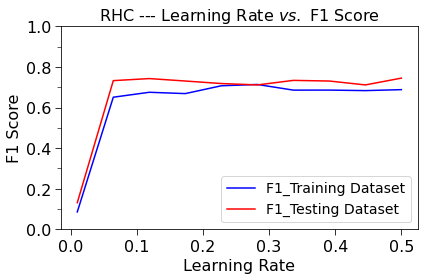

In [36]:
# the relationship of iterations and f1 score

plt.plot(np.c_[0.01:0.5:10j], arr_training
         , color='blue'
         , label='F1_Training Dataset')
plt.plot(np.c_[0.01:0.5:10j], arr_testing
         , color='red'
         , label = 'F1_Testing Dataset'
         )


# format the graph
plt.gca().set_ylim(0,1)
plt.title("RHC --- Learning Rate $vs.$ F1 Score", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Learning Rate", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.tight_layout()
plt.savefig('RHC-3.png', dpi=300)
plt.show()

In [37]:
rhc_f1_train_arr = []
rhc_f1_test_arr = []
rhc_time = []

for i in range(0, 5000, 50):
    start = time.time()
    rhc_model = mlrose.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = i, bias = True, is_classifier = True, 
                                 learning_rate = 0.5, 
                                 random_state =1,
                                 restarts=7,
                                 curve=True)

    rhc_model.fit(X_train, Y_train)
    end = time.time()
    t = end-start
    rhc_time.append(t)

    # result from training dataset
    rhc_f1_train = f1_score(Y_train, rhc_model.predict(X_train))
    rhc_f1_train_arr.append(rhc_f1_train)

# result from testing dataset
    rhc_f1_test = f1_score(Ytest, rhc_model.predict(Xtest))
    rhc_f1_test_arr.append(rhc_f1_test)


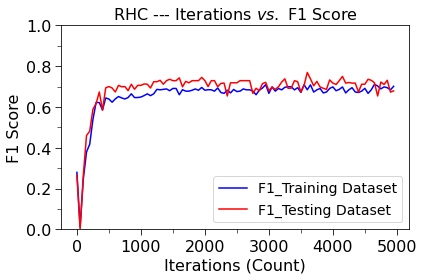

In [38]:
# the relationship of iterations and f1 score

plt.plot(range(0, 5000, 50), rhc_f1_train_arr
         , color='blue'
         , label='F1_Training Dataset')
plt.plot(range(0, 5000, 50), rhc_f1_test_arr
         , color='red'
         , label = 'F1_Testing Dataset'
         )


# format the graph
plt.gca().set_ylim(0,1)
plt.title("RHC --- Iterations $vs.$ F1 Score", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Iterations (Count)", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.tight_layout()
plt.savefig('RHC-4.png', dpi=300)
plt.show()

In [96]:
rhc_time[-1]

12.109649896621704

# SA

In [39]:
# check the influence of learning rate
sa_arr_training = []
sa_arr_testing = []
sa_arr_time =[]
for i in np.c_[0.01:0.5:10j]:
    start = time.time()
    sa_model = mlrose.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 5000, bias = True, 
                                 is_classifier = True, 
                                 learning_rate = i, 
                                 random_state =1,
                                 curve=True)
    sa_model.fit(X_train, Y_train)
    end = time.time()
    t = end-start
    sa_arr_time.append(t)
    
    a = f1_score(Y_train, sa_model.predict(X_train))
    sa_arr_training.append(a)
    b = f1_score(Ytest, sa_model.predict(Xtest))
    sa_arr_testing.append(b)

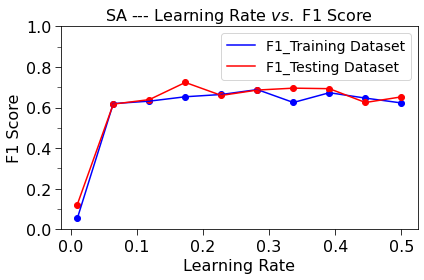

In [40]:
plt.plot(np.c_[0.01:0.5:10j], sa_arr_training
         , color='blue'
         , label='F1_Training Dataset')
plt.plot(np.c_[0.01:0.5:10j], sa_arr_testing
         , color='red'
         , label = 'F1_Testing Dataset'
         )
plt.scatter(np.c_[0.01:0.5:10j], sa_arr_training
         , c='blue')
plt.scatter(np.c_[0.01:0.5:10j], sa_arr_testing
         , color='red'
         )

# format the graph
plt.gca().set_ylim(0,1)
plt.title("SA --- Learning Rate $vs.$ F1 Score", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Learning Rate", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.tight_layout()
plt.savefig('SA-1.png', dpi=300)
plt.show()

In [41]:
[*zip(np.c_[0.01:0.5:10j], sa_arr_training)]

[(array([0.01]), 0.05343511450381679),
 (array([0.06444444]), 0.6195286195286195),
 (array([0.11888889]), 0.6315789473684211),
 (array([0.17333333]), 0.6531986531986532),
 (array([0.22777778]), 0.6644067796610169),
 (array([0.28222222]), 0.6885245901639344),
 (array([0.33666667]), 0.625),
 (array([0.39111111]), 0.6731391585760518),
 (array([0.44555556]), 0.6466666666666667),
 (array([0.5]), 0.6227106227106228)]

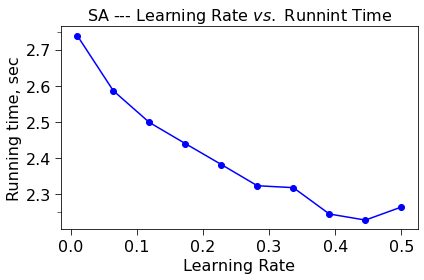

In [42]:
plt.plot(np.c_[0.01:0.5:10j], sa_arr_time
         , color='blue'
         )

plt.scatter(np.c_[0.01:0.5:10j], sa_arr_time
         , c='blue')

# format the graph
# plt.gca().set_ylim(0,1)
plt.title("SA --- Learning Rate $vs.$ Runnint Time", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
plt.tick_params(axis='both', which='minor', size=4)
# ax.set_ylim(6.5, 8.5)

# plt.legend(fontsize=14)
plt.xlabel("Learning Rate", fontsize=16)
plt.ylabel("Running time, sec", fontsize=16)
plt.tight_layout()
plt.savefig('SA-1_supplement.png', dpi=300)
plt.show()

In [43]:
# Schedule 1---check the influence of initial temperature
sa_arr_training_1 = []
sa_arr_testing_1 = []
sa_time_1 = []

for i in np.c_[1:10:10j]:
    schedule = mlrose.GeomDecay(init_temp=i, decay=0.99, min_temp=0.001)
    start = time.time()
    sa_model = mlrose.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 5000, bias = True, 
                                 is_classifier = True, 
                                 learning_rate = 0.5, 
                                 random_state =1,
                                 curve=True,
                                 schedule=schedule)
    sa_model.fit(X_train, Y_train)
    end = time.time()
    t = end-start
    sa_time_1.append(t)  
    
    a = f1_score(Y_train, sa_model.predict(X_train))
    sa_arr_training_1.append(a)
    b = f1_score(Ytest, sa_model.predict(Xtest))
    sa_arr_testing_1.append(b)

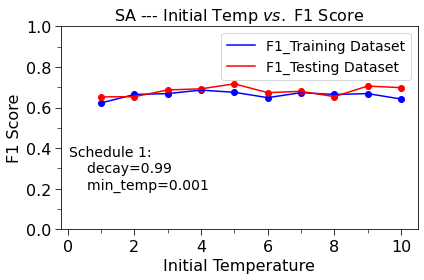

In [44]:
plt.plot(np.c_[1:10:10j], sa_arr_training_1
         , color='blue'
         , label='F1_Training Dataset')
plt.plot(np.c_[1:10:10j], sa_arr_testing_1
         , color='red'
         , label = 'F1_Testing Dataset'
         )
plt.scatter(np.c_[1:10:10j], sa_arr_training_1
         , c='blue')
plt.scatter(np.c_[1:10:10j], sa_arr_testing_1
         , color='red'
         )

# format the graph
plt.gca().set_ylim(0,1)
plt.title("SA --- Initial Temp $vs.$ F1 Score", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_xlim(-.2, 10.5)
ax.text(0.05, 0.2, 'Schedule 1:\n    decay=0.99\n    min_temp=0.001', fontsize=14)


plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Initial Temperature", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)

plt.tight_layout()
plt.savefig('SA-2.png', dpi=300)
plt.show()

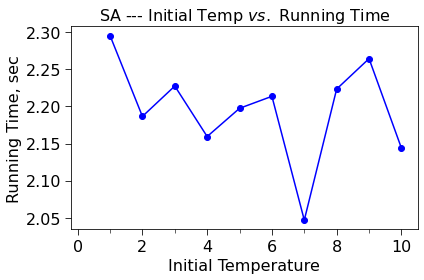

In [57]:
plt.plot(np.c_[1:10:10j], sa_time_1
         , color='blue'
         )

plt.scatter(np.c_[1:10:10j], sa_time_1
         , c='blue')


# format the graph
# plt.gca().set_ylim(7, 8)
plt.title("SA --- Initial Temp $vs.$ Running Time", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_xlim(-.2, 10.5)

# ax.text(0, 7.05, 'Schedule 1:\n    decay=0.99\n    min_temp=0.001', fontsize=14)



plt.tick_params(axis='both', which='minor', size=4)

# plt.legend(fontsize=14)
plt.xlabel("Initial Temperature", fontsize=16)
plt.ylabel("Running Time, sec", fontsize=16)

plt.tight_layout()
plt.savefig('SA-3.png', dpi=300)
plt.show()

In [46]:
# Schedule 2---check the influence of decay rate
sa_arr_training_2 = []
sa_arr_testing_2 = []
sa_time_2 = []

for i in np.c_[0.01:0.99:10j]:
    schedule = mlrose.GeomDecay(init_temp=1.0, decay=i, min_temp=0.001)
    start = time.time()
    sa_model = mlrose.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 5000, bias = True, 
                                 is_classifier = True, 
                                 learning_rate = 0.5, 
                                 random_state =1,
                                 curve=True,
                                 schedule=schedule)
    sa_model.fit(X_train, Y_train)
    end = time.time()
    t = end-start
    sa_time_2.append(t)  
    
    a = f1_score(Y_train, sa_model.predict(X_train))
    sa_arr_training_2.append(a)
    b = f1_score(Ytest, sa_model.predict(Xtest))
    sa_arr_testing_2.append(b)

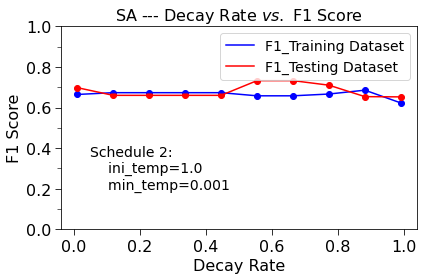

In [47]:
plt.plot(np.c_[0.01:0.99:10j], sa_arr_training_2
         , color='blue'
         , label='F1_Training Dataset')
plt.plot(np.c_[0.01:0.99:10j], sa_arr_testing_2
         , color='red'
         , label = 'F1_Testing Dataset'
         )
plt.scatter(np.c_[0.01:0.99:10j], sa_arr_training_2
         , c='blue')
plt.scatter(np.c_[0.01:0.99:10j], sa_arr_testing_2
         , color='red'
         )

# format the graph
plt.gca().set_ylim(0,1)
plt.title("SA --- Decay Rate $vs.$ F1 Score", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
# ax.set_xlim(-.2, 10.5)
ax.text(0.05, 0.2, 'Schedule 2:\n    ini_temp=1.0\n    min_temp=0.001', fontsize=14)


plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Decay Rate", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)

plt.tight_layout()
plt.savefig('SA-4.png', dpi=300)
plt.show()

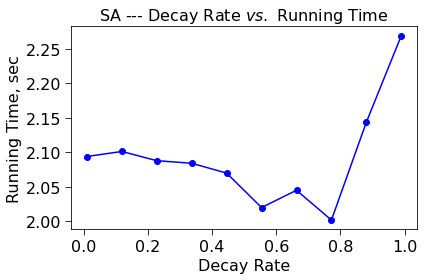

In [59]:
plt.plot(np.c_[0.01:0.99:10j], sa_time_2
         , color='blue')

plt.scatter(np.c_[0.01:0.99:10j], sa_time_2
         , c='blue')


# format the graph
# plt.gca().set_ylim(7, 8)
plt.title("SA --- Decay Rate $vs.$ Running Time", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
# ax.set_xlim(-.2, 10.5)

# ax.text(0, 7.05, 'Schedule 2:\n    ini_temp=1.0\n    min_temp=0.001', fontsize=14)



plt.tick_params(axis='both', which='minor', size=4)

# plt.legend(fontsize=14)
plt.xlabel("Decay Rate", fontsize=16)
plt.ylabel("Running Time, sec", fontsize=16)

plt.tight_layout()
plt.savefig('SA-5.png', dpi=300)
plt.show()

In [49]:
sa_arr_training_3 = []
sa_arr_testing_3 = []
sa_time_3 = []

for i in np.c_[0.001:1:30j]:
    schedule = mlrose.GeomDecay(init_temp=10, decay=0.99, min_temp=i)
    start = time.time()
    sa_model = mlrose.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 5000, bias = True, 
                                 is_classifier = True, 
                                 learning_rate = 0.5, 
                                 random_state =1,
                                 curve=True,
                                 schedule=schedule)
    sa_model.fit(X_train, Y_train)
    end = time.time()
    t = end-start
    sa_time_3.append(t)  
    
    a = f1_score(Y_train, sa_model.predict(X_train))
    sa_arr_training_3.append(a)
    b = f1_score(Ytest, sa_model.predict(Xtest))
    sa_arr_testing_3.append(b)

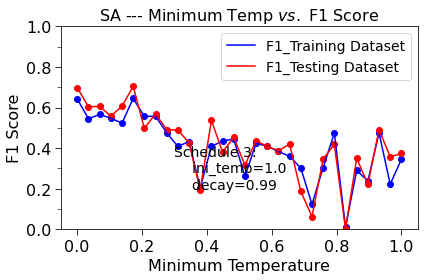

In [50]:
plt.plot(np.c_[0.001:1:30j], sa_arr_training_3
         , color='blue'
         , label='F1_Training Dataset')
plt.plot(np.c_[0.001:1:30j], sa_arr_testing_3
         , color='red'
         , label = 'F1_Testing Dataset'
         )
plt.scatter(np.c_[0.001:1:30j], sa_arr_training_3
         , c='blue')
plt.scatter(np.c_[0.001:1:30j], sa_arr_testing_3
         , color='red'
         )

# format the graph
plt.gca().set_ylim(0,1)
plt.title("SA --- Minimum Temp $vs.$ F1 Score", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
# ax.set_xlim(-.2, 10.5)
ax.text(0.3, 0.2, 'Schedule 3:\n    ini_temp=1.0\n    decay=0.99', fontsize=14)


plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Minimum Temperature", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)

plt.tight_layout()
plt.savefig('SA-6.png', dpi=300)
plt.show()

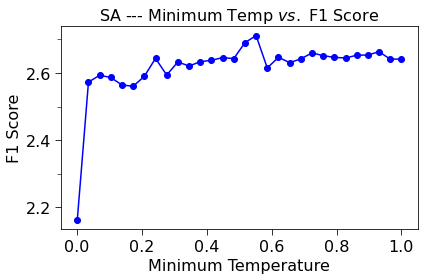

In [60]:
plt.plot(np.c_[0.001:1:30j], sa_time_3
         , color='blue'
         )
plt.scatter(np.c_[0.001:1:30j], sa_time_3
         , color='blue'
         )

# format the graph
# plt.gca().set_ylim(0,1)
plt.title("SA --- Minimum Temp $vs.$ F1 Score", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
# ax.set_xlim(-.2, 10.5)
# ax.text(0.05, 7.75, 'Schedule 3:\n    ini_temp=1.0\n    decay=0.99', fontsize=14)


plt.tick_params(axis='both', which='minor', size=4)

# plt.legend(fontsize=14)
plt.xlabel("Minimum Temperature", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)

plt.tight_layout()
plt.savefig('SA-7.png', dpi=300)
plt.show()

In [52]:
# final f1 score after parametric study
sa_f1_train_arr = []
sa_f1_test_arr = []
sa_f1_time = []

schedule = mlrose.GeomDecay(init_temp=1, decay=0.99, min_temp=0.001)

for i in range(0, 5000, 50):
    start = time.time()
    sa_model = mlrose.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = i, bias = True, 
                                 is_classifier = True, 
                                 learning_rate = 0.5, 
                                 random_state =1,
                                 curve=True,
                                 schedule=schedule)

    sa_model.fit(X_train, Y_train)
    end = time.time()
    t = end-start
    sa_f1_time.append(t)

    # result from training dataset
    sa_f1_train = f1_score(Y_train, sa_model.predict(X_train))
    sa_f1_train_arr.append(sa_f1_train)

# result from testing dataset
    sa_f1_test = f1_score(Ytest, sa_model.predict(Xtest))
    sa_f1_test_arr.append(sa_f1_test)

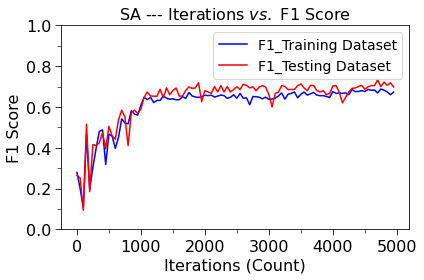

In [53]:
# the relationship of iterations and f1 score

plt.plot(range(0, 5000, 50), sa_f1_train_arr
         , color='blue'
         , label='F1_Training Dataset')
plt.plot(range(0, 5000, 50), sa_f1_test_arr
         , color='red'
         , label = 'F1_Testing Dataset'
         )


# format the graph
plt.gca().set_ylim(0,1)
plt.title("SA --- Iterations $vs.$ F1 Score", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Iterations (Count)", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.tight_layout()
plt.savefig('SA-8.png', dpi=300)
plt.show()

In [95]:
sa_f1_time[-1]

2.2791101932525635

# GA

In [54]:
# check the influence of learning rate
ga_arr_training = []
ga_arr_testing = []
ga_arr_time =[]
for i in np.c_[0.1:0.5:10j]:
    start = time.time()
    ga_model = mlrose.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
                                 algorithm ='genetic_alg', 
                                 max_iters = 5000, bias = True, 
                                 is_classifier = True, 
                                 learning_rate = i, 
                                 random_state =1,
                                 curve=True,
                                 pop_size=200,
                                 mutation_prob=0.1
                                   
                                )
    ga_model.fit(X_train, Y_train)
    end = time.time()
    t = end-start
    ga_arr_time.append(t)
    
    a = f1_score(Y_train, ga_model.predict(X_train))
    ga_arr_training.append(a)
#     b = f1_score(Ytest, ga_model.predict(Xtest))
#     ga_arr_testing.append(b)

In [65]:
# influece of the pop_size
ga_arr_training = []
ga_arr_testing = []
ga_arr_time =[]
for i in [100, 200, 300, 400, 500]:
    start = time.time()
    ga_model = mlrose.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
                                 algorithm ='genetic_alg', 
                                 max_iters = 5000, bias = True, 
                                 is_classifier = True, 
                                 learning_rate = 0.5, 
                                 random_state =1,
                                 curve=True,
                                 pop_size=i,
                                 mutation_prob=0.1 
                                )
    
    ga_model.fit(X_train, Y_train)
    end = time.time()
    t = end-start
    ga_arr_time.append(t)
    
    a = f1_score(Y_train, ga_model.predict(X_train))
    ga_arr_training.append(a)
    b = f1_score(Ytest, ga_model.predict(Xtest))
    ga_arr_testing.append(b)


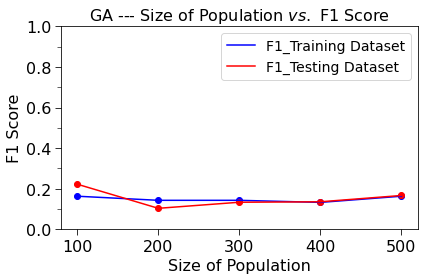

In [66]:
plt.plot([100, 200, 300, 400, 500], ga_arr_training
         , color='blue'
         , label='F1_Training Dataset')
plt.plot([100, 200, 300, 400, 500], ga_arr_testing
         , color='red'
         , label = 'F1_Testing Dataset'
         )
plt.scatter([100, 200, 300, 400, 500], ga_arr_training
         , c='blue')
plt.scatter([100, 200, 300, 400, 500], ga_arr_testing
         , color='red'
         )

# format the graph
plt.gca().set_ylim(0,1)
plt.title("GA --- Size of Population $vs.$ F1 Score", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
# ax.set_xlim(-.2, 10.5)
# ax.text(0.3, 0.2, 'Schedule 3:\n    ini_temp=1.0\n    decay=0.99', fontsize=14)


plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Size of Population", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)

plt.tight_layout()
plt.savefig('GA-1.png', dpi=300)
plt.show()

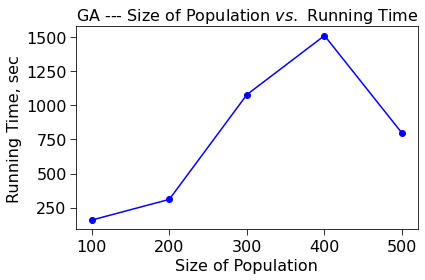

In [70]:
plt.plot([100, 200, 300, 400, 500], ga_arr_time
         , color='blue'
        )
plt.scatter([100, 200, 300, 400, 500], ga_arr_time
         , color='blue'
        )

# format the graph
# plt.gca().set_ylim(0,1)
plt.title("GA --- Size of Population $vs.$ Running Time", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.yaxis.set_minor_locator(MultipleLocator(0.1))
# ax.set_xlim(-.2, 10.5)
# ax.text(0.3, 0.2, 'Schedule 3:\n    ini_temp=1.0\n    decay=0.99', fontsize=14)


plt.tick_params(axis='both', which='minor', size=4)

# plt.legend(fontsize=14)
plt.xlabel("Size of Population", fontsize=16)
plt.ylabel("Running Time, sec", fontsize=16)

plt.tight_layout()
plt.savefig('GA-2.png', dpi=300)
plt.show()

In [74]:
# influece of the mutation_prob
ga_arr_training_1 = []
ga_arr_testing_1 = []
ga_arr_time_1 =[]
for i in [0.1, 0.3, 0.6, 0.9]:
    start = time.time()
    ga_model = mlrose.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
                                 algorithm ='genetic_alg', 
                                 max_iters = 5000, bias = True, 
                                 is_classifier = True, 
                                 learning_rate = 0.5, 
                                 random_state =1,
                                 curve=True,
                                 pop_size=200,
                                 mutation_prob=i 
                                )
    
    ga_model.fit(X_train, Y_train)
    end = time.time()
    t = end-start
    ga_arr_time_1.append(t)
    
    a = f1_score(Y_train, ga_model.predict(X_train))
    ga_arr_training_1.append(a)
    b = f1_score(Ytest, ga_model.predict(Xtest))
    ga_arr_testing_1.append(b)

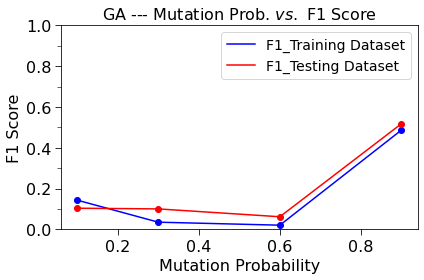

In [83]:
plt.plot([0.1, 0.3, 0.6, 0.9], ga_arr_training_1
         , color='blue'
         , label='F1_Training Dataset')
plt.plot([0.1, 0.3, 0.6, 0.9], ga_arr_testing_1
         , color='red'
         , label = 'F1_Testing Dataset'
         )
plt.scatter([0.1, 0.3, 0.6, 0.9], ga_arr_training_1
         , c='blue')
plt.scatter([0.1, 0.3, 0.6, 0.9], ga_arr_testing_1
         , color='red'
         )

# format the graph
plt.gca().set_ylim(0,1)
plt.title("GA --- Mutation Prob. $vs.$ F1 Score", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
# ax.set_xlim(-.2, 10.5)
# ax.text(0.3, 0.2, 'Schedule 3:\n    ini_temp=1.0\n    decay=0.99', fontsize=14)


plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Mutation Probability", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)

plt.tight_layout()
plt.savefig('GA-3.png', dpi=300)
plt.show()

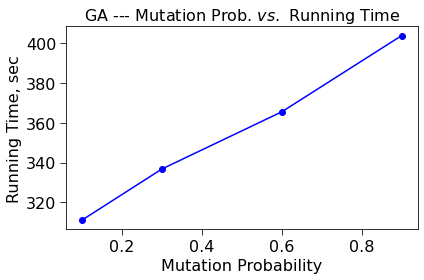

In [82]:
plt.plot([0.1, 0.3, 0.6, 0.9], ga_arr_time_1
         , color='blue'
        )
         
plt.scatter([0.1, 0.3, 0.6, 0.9], ga_arr_time_1
         , c='blue')

# format the graph
# plt.gca().set_ylim(0,1)
plt.title("GA --- Mutation Prob. $vs.$ Running Time", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.yaxis.set_minor_locator(MultipleLocator(0.1))
# ax.set_xlim(-.2, 10.5)
# ax.text(0.3, 0.2, 'Schedule 3:\n    ini_temp=1.0\n    decay=0.99', fontsize=14)


plt.tick_params(axis='both', which='minor', size=4)

# plt.legend(fontsize=14)
plt.xlabel("Mutation Probability", fontsize=16)
plt.ylabel("Running Time, sec", fontsize=16)

plt.tight_layout()
plt.savefig('GA-4.png', dpi=300)
plt.show()

In [84]:
# final f1 score after parametric study
ga_f1_train_arr = []
ga_f1_test_arr = []
ga_f1_time = []

for i in range(0, 5000, 100):
    start = time.time()
    ga_model = mlrose.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
                                 algorithm ='genetic_alg', 
                                 max_iters = i, bias = True, 
                                 is_classifier = True, 
                                 learning_rate = 0.5, 
                                 random_state =1,
                                 curve=True,
                                 pop_size=200,
                                 mutation_prob=0.1)

    ga_model.fit(X_train, Y_train)
    end = time.time()
    t = end-start
    ga_f1_time.append(t)

    # result from training dataset
    ga_f1_train = f1_score(Y_train, ga_model.predict(X_train))
    ga_f1_train_arr.append(ga_f1_train)

# result from testing dataset
    ga_f1_test = f1_score(Ytest, ga_model.predict(Xtest))
    ga_f1_test_arr.append(ga_f1_test)

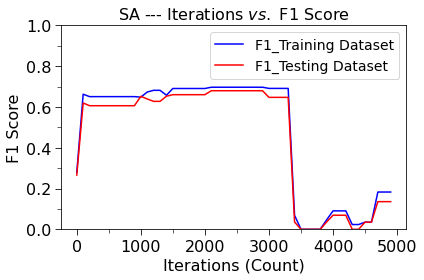

In [89]:
# the relationship of iterations and f1 score

plt.plot(range(0, 5000, 100), ga_f1_train_arr
         , color='blue'
         , label='F1_Training Dataset')
plt.plot(range(0, 5000, 100), ga_f1_test_arr
         , color='red'
         , label = 'F1_Testing Dataset'
         )


# format the graph
plt.gca().set_ylim(0,1)
plt.title("SA --- Iterations $vs.$ F1 Score", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Iterations (Count)", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.tight_layout()
plt.savefig('GA-5.png', dpi=300)
plt.show()

# Conclusion

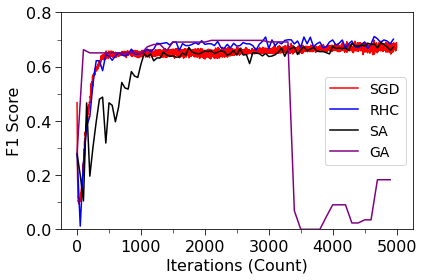

In [91]:
plt.plot(np.arange(len(history_lr2.history['f1_score']))
         , history_lr2.history['f1_score']
         , color='red'
         , label='SGD')a
plt.plot(range(0, 5000, 50), rhc_f1_train_arr
         , color='blue'
         , label='RHC')
plt.plot(range(0, 5000, 50), sa_f1_train_arr
         , color='black'
         , label='SA')
plt.plot(range(0, 5000, 100), ga_f1_train_arr
         , color='purple'
         , label='GA')
plt.legend(fontsize=14)

# format the graph
plt.gca().set_ylim(0,0.8)
# plt.title("SA --- Iterations $vs.$ F1 Score", fontsize=16)
plt.tick_params(axis='both', size=6, labelsize=16)


ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.tick_params(axis='both', which='minor', size=4)

plt.legend(fontsize=14)
plt.xlabel("Iterations (Count)", fontsize=16)
plt.ylabel("F1 Score", fontsize=16)
plt.tight_layout()
plt.savefig('all-1.png', dpi=300)
plt.show()


In [93]:
(max(history_lr2.history['f1_score']),
max(rhc_f1_train_arr),
max(sa_f1_train_arr),
max(ga_f1_train_arr))

(array([0.6981132], dtype=float32),
 0.711111111111111,
 0.6878980891719746,
 0.6967741935483872)

In [94]:
ga_f1_time[-1]

291.42962098121643

In [97]:
start = time.time()
history = nn_model.fit(X_train, Y_train, epochs=5000, validation_data=(X_valid, Y_valid))
end = time.time()
end-start

Epoch 1/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.3089 - f1_score: 0.7859 - val_loss: 0.9693 - val_f1_score: 0.5111
Epoch 2/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3091 - f1_score: 0.8146 - val_loss: 1.0469 - val_f1_score: 0.5294
Epoch 3/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2707 - f1_score: 0.8160 - val_loss: 0.9936 - val_f1_score: 0.4250
Epoch 4/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2907 - f1_score: 0.7826 - val_loss: 1.0058 - val_f1_score: 0.5625
Epoch 5/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2812 - f1_score: 0.8308 - val_loss: 0.9880 - val_f1_score: 0.4691
Epoch 6/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2822 - f1_score: 0.8344 - val_loss: 1.1623 - val_f1_score: 0.3492
Epoch 7/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2927 - f1_score: 0.7963 - val_loss: 1.1899 - val_f1_score: 0.3226
Epoch 

16/16 [==============================] - 0s 7ms/step - loss: 0.2800 - f1_score: 0.8137 - val_loss: 1.2007 - val_f1_score: 0.5983
Epoch 59/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3012 - f1_score: 0.8086 - val_loss: 0.9848 - val_f1_score: 0.4416
Epoch 60/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3080 - f1_score: 0.8037 - val_loss: 0.9767 - val_f1_score: 0.4651
Epoch 61/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3027 - f1_score: 0.8098 - val_loss: 1.1420 - val_f1_score: 0.5872
Epoch 62/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3059 - f1_score: 0.7914 - val_loss: 1.0422 - val_f1_score: 0.5769
Epoch 63/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2983 - f1_score: 0.7730 - val_loss: 1.0355 - val_f1_score: 0.5510
Epoch 64/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2974 - f1_score: 0.8207 - val_loss: 0.9953 - val_f1_score: 0.6346
Epoch 65/5000

16/16 [==============================] - 0s 7ms/step - loss: 0.2742 - f1_score: 0.8303 - val_loss: 0.9942 - val_f1_score: 0.5057
Epoch 116/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2920 - f1_score: 0.7975 - val_loss: 0.9781 - val_f1_score: 0.5169
Epoch 117/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2790 - f1_score: 0.8389 - val_loss: 0.9965 - val_f1_score: 0.4578
Epoch 118/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2746 - f1_score: 0.8250 - val_loss: 0.9944 - val_f1_score: 0.4615
Epoch 119/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2772 - f1_score: 0.8459 - val_loss: 0.9948 - val_f1_score: 0.5128
Epoch 120/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2738 - f1_score: 0.8250 - val_loss: 1.2093 - val_f1_score: 0.6140
Epoch 121/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2717 - f1_score: 0.8218 - val_loss: 0.9684 - val_f1_score: 0.5176
Epoch 1

Epoch 172/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2719 - f1_score: 0.8182 - val_loss: 1.0922 - val_f1_score: 0.4286
Epoch 173/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2925 - f1_score: 0.8088 - val_loss: 1.0446 - val_f1_score: 0.5714
Epoch 174/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2827 - f1_score: 0.8199 - val_loss: 0.9718 - val_f1_score: 0.4762
Epoch 175/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3050 - f1_score: 0.8061 - val_loss: 0.9919 - val_f1_score: 0.4444
Epoch 176/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2760 - f1_score: 0.8389 - val_loss: 1.0046 - val_f1_score: 0.5128
Epoch 177/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2858 - f1_score: 0.8100 - val_loss: 1.1071 - val_f1_score: 0.4179
Epoch 178/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2845 - f1_score: 0.8235 - val_loss: 1.0120 - val_f1_score:

Epoch 229/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2835 - f1_score: 0.8075 - val_loss: 1.1006 - val_f1_score: 0.5660
Epoch 230/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2861 - f1_score: 0.8086 - val_loss: 1.0457 - val_f1_score: 0.5000
Epoch 231/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2948 - f1_score: 0.8139 - val_loss: 1.1401 - val_f1_score: 0.6000
Epoch 232/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2804 - f1_score: 0.8303 - val_loss: 0.9986 - val_f1_score: 0.4557
Epoch 233/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2772 - f1_score: 0.8253 - val_loss: 1.1154 - val_f1_score: 0.5577
Epoch 234/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2901 - f1_score: 0.7788 - val_loss: 1.3369 - val_f1_score: 0.6341
Epoch 235/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3152 - f1_score: 0.8131 - val_loss: 1.1835 - val_f1_score:

Epoch 286/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2810 - f1_score: 0.8110 - val_loss: 1.0353 - val_f1_score: 0.5800
Epoch 287/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2995 - f1_score: 0.8084 - val_loss: 0.9887 - val_f1_score: 0.4337
Epoch 288/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2755 - f1_score: 0.8421 - val_loss: 1.0528 - val_f1_score: 0.5769
Epoch 289/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2922 - f1_score: 0.8108 - val_loss: 1.3800 - val_f1_score: 0.6000
Epoch 290/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3065 - f1_score: 0.8119 - val_loss: 1.1028 - val_f1_score: 0.5714
Epoch 291/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3138 - f1_score: 0.7976 - val_loss: 1.4458 - val_f1_score: 0.2182
Epoch 292/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3450 - f1_score: 0.8089 - val_loss: 1.0215 - val_f1_score:

Epoch 343/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2867 - f1_score: 0.8385 - val_loss: 1.0567 - val_f1_score: 0.5567
Epoch 344/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2880 - f1_score: 0.8012 - val_loss: 1.0953 - val_f1_score: 0.5490
Epoch 345/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3521 - f1_score: 0.7764 - val_loss: 1.0069 - val_f1_score: 0.4884
Epoch 346/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2838 - f1_score: 0.8110 - val_loss: 0.9979 - val_f1_score: 0.4615
Epoch 347/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2722 - f1_score: 0.8333 - val_loss: 1.1040 - val_f1_score: 0.6038
Epoch 348/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2761 - f1_score: 0.8085 - val_loss: 1.0261 - val_f1_score: 0.4615
Epoch 349/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2772 - f1_score: 0.8440 - val_loss: 1.0502 - val_f1_score:

Epoch 400/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2872 - f1_score: 0.8228 - val_loss: 0.9996 - val_f1_score: 0.5625
Epoch 401/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2731 - f1_score: 0.8408 - val_loss: 1.0096 - val_f1_score: 0.4865
Epoch 402/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2983 - f1_score: 0.8024 - val_loss: 0.9974 - val_f1_score: 0.5169
Epoch 403/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2904 - f1_score: 0.8050 - val_loss: 0.9991 - val_f1_score: 0.5591
Epoch 404/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2796 - f1_score: 0.8267 - val_loss: 1.0152 - val_f1_score: 0.4675
Epoch 405/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2734 - f1_score: 0.8123 - val_loss: 1.0057 - val_f1_score: 0.4938
Epoch 406/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2750 - f1_score: 0.8369 - val_loss: 1.0219 - val_f1_score:

Epoch 457/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2816 - f1_score: 0.8146 - val_loss: 1.0335 - val_f1_score: 0.4675
Epoch 458/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3013 - f1_score: 0.8171 - val_loss: 1.0368 - val_f1_score: 0.5833
Epoch 459/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2749 - f1_score: 0.8221 - val_loss: 1.0875 - val_f1_score: 0.5825
Epoch 460/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2670 - f1_score: 0.8278 - val_loss: 1.0200 - val_f1_score: 0.4691
Epoch 461/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3103 - f1_score: 0.8123 - val_loss: 1.0220 - val_f1_score: 0.5625
Epoch 462/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2778 - f1_score: 0.8344 - val_loss: 1.0100 - val_f1_score: 0.5116
Epoch 463/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2730 - f1_score: 0.8235 - val_loss: 1.0059 - val_f1_score:

Epoch 514/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2990 - f1_score: 0.8196 - val_loss: 1.0153 - val_f1_score: 0.4691
Epoch 515/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2786 - f1_score: 0.8160 - val_loss: 1.1460 - val_f1_score: 0.3429
Epoch 516/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2999 - f1_score: 0.7850 - val_loss: 1.0118 - val_f1_score: 0.4706
Epoch 517/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2774 - f1_score: 0.8297 - val_loss: 1.0104 - val_f1_score: 0.4706
Epoch 518/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2724 - f1_score: 0.8333 - val_loss: 1.0270 - val_f1_score: 0.4878
Epoch 519/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2995 - f1_score: 0.8049 - val_loss: 1.0298 - val_f1_score: 0.4390
Epoch 520/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2732 - f1_score: 0.8075 - val_loss: 1.0311 - val_f1_score:

Epoch 571/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2826 - f1_score: 0.8160 - val_loss: 1.1420 - val_f1_score: 0.3768
Epoch 572/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2939 - f1_score: 0.8173 - val_loss: 1.6416 - val_f1_score: 0.5581
Epoch 573/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3500 - f1_score: 0.7879 - val_loss: 1.0214 - val_f1_score: 0.5000
Epoch 574/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2594 - f1_score: 0.8173 - val_loss: 1.0328 - val_f1_score: 0.4706
Epoch 575/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2672 - f1_score: 0.8389 - val_loss: 1.0251 - val_f1_score: 0.5275
Epoch 576/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3014 - f1_score: 0.8062 - val_loss: 1.0167 - val_f1_score: 0.4944
Epoch 577/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2681 - f1_score: 0.8459 - val_loss: 1.0552 - val_f1_score:

Epoch 628/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2829 - f1_score: 0.8123 - val_loss: 1.0301 - val_f1_score: 0.4938
Epoch 629/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2984 - f1_score: 0.7988 - val_loss: 1.0339 - val_f1_score: 0.4762
Epoch 630/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3290 - f1_score: 0.7927 - val_loss: 1.4123 - val_f1_score: 0.2759
Epoch 631/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3190 - f1_score: 0.8135 - val_loss: 1.0460 - val_f1_score: 0.5625
Epoch 632/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2868 - f1_score: 0.8085 - val_loss: 1.2100 - val_f1_score: 0.5421
Epoch 633/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3206 - f1_score: 0.7940 - val_loss: 1.4387 - val_f1_score: 0.2456
Epoch 634/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3316 - f1_score: 0.8025 - val_loss: 1.0892 - val_f1_score:

Epoch 685/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2696 - f1_score: 0.8373 - val_loss: 1.0377 - val_f1_score: 0.4935
Epoch 686/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2734 - f1_score: 0.8385 - val_loss: 1.0641 - val_f1_score: 0.6139
Epoch 687/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2719 - f1_score: 0.8232 - val_loss: 1.1430 - val_f1_score: 0.5714
Epoch 688/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2796 - f1_score: 0.8349 - val_loss: 1.0255 - val_f1_score: 0.5122
Epoch 689/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2991 - f1_score: 0.8037 - val_loss: 1.0313 - val_f1_score: 0.5918
Epoch 690/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3186 - f1_score: 0.7988 - val_loss: 1.0572 - val_f1_score: 0.5417
Epoch 691/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2672 - f1_score: 0.8278 - val_loss: 1.0372 - val_f1_score:

Epoch 742/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2998 - f1_score: 0.8100 - val_loss: 1.0536 - val_f1_score: 0.5567
Epoch 743/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3414 - f1_score: 0.7553 - val_loss: 1.1550 - val_f1_score: 0.3333
Epoch 744/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3004 - f1_score: 0.8111 - val_loss: 1.0528 - val_f1_score: 0.4615
Epoch 745/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2679 - f1_score: 0.8261 - val_loss: 1.0460 - val_f1_score: 0.4884
Epoch 746/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2785 - f1_score: 0.8210 - val_loss: 1.0588 - val_f1_score: 0.5714
Epoch 747/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2743 - f1_score: 0.8308 - val_loss: 1.0463 - val_f1_score: 0.4935
Epoch 748/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2691 - f1_score: 0.8232 - val_loss: 1.0874 - val_f1_score:

Epoch 799/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3036 - f1_score: 0.8257 - val_loss: 1.0573 - val_f1_score: 0.4889
Epoch 800/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2986 - f1_score: 0.7951 - val_loss: 1.3712 - val_f1_score: 0.5487
Epoch 801/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3049 - f1_score: 0.8214 - val_loss: 1.4060 - val_f1_score: 0.5932
Epoch 802/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3029 - f1_score: 0.8304 - val_loss: 1.1071 - val_f1_score: 0.4595
Epoch 803/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3019 - f1_score: 0.8110 - val_loss: 1.0529 - val_f1_score: 0.4762
Epoch 804/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2783 - f1_score: 0.8110 - val_loss: 1.0677 - val_f1_score: 0.5263
Epoch 805/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2774 - f1_score: 0.8073 - val_loss: 1.0404 - val_f1_score:

Epoch 856/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2913 - f1_score: 0.7940 - val_loss: 1.0473 - val_f1_score: 0.4250
Epoch 857/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2954 - f1_score: 0.8123 - val_loss: 1.0508 - val_f1_score: 0.4750
Epoch 858/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2739 - f1_score: 0.8232 - val_loss: 1.1334 - val_f1_score: 0.4507
Epoch 859/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2791 - f1_score: 0.8185 - val_loss: 1.0623 - val_f1_score: 0.5227
Epoch 860/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2899 - f1_score: 0.8062 - val_loss: 1.0427 - val_f1_score: 0.5591
Epoch 861/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2658 - f1_score: 0.8373 - val_loss: 1.0443 - val_f1_score: 0.4524
Epoch 862/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2723 - f1_score: 0.8235 - val_loss: 1.1224 - val_f1_score:

Epoch 913/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2941 - f1_score: 0.8110 - val_loss: 1.3712 - val_f1_score: 0.5517
Epoch 914/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3131 - f1_score: 0.7951 - val_loss: 1.1345 - val_f1_score: 0.5849
Epoch 915/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2939 - f1_score: 0.8412 - val_loss: 1.0771 - val_f1_score: 0.4507
Epoch 916/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2842 - f1_score: 0.8210 - val_loss: 1.0819 - val_f1_score: 0.4444
Epoch 917/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2947 - f1_score: 0.8146 - val_loss: 1.0248 - val_f1_score: 0.4935
Epoch 918/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2763 - f1_score: 0.8318 - val_loss: 1.1105 - val_f1_score: 0.4658
Epoch 919/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2746 - f1_score: 0.8196 - val_loss: 1.1275 - val_f1_score:

Epoch 970/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2628 - f1_score: 0.8235 - val_loss: 1.2984 - val_f1_score: 0.6071
Epoch 971/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2871 - f1_score: 0.8119 - val_loss: 1.1201 - val_f1_score: 0.4444
Epoch 972/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2909 - f1_score: 0.8000 - val_loss: 1.1734 - val_f1_score: 0.4950
Epoch 973/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3052 - f1_score: 0.7927 - val_loss: 1.1148 - val_f1_score: 0.5490
Epoch 974/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3583 - f1_score: 0.7734 - val_loss: 1.1257 - val_f1_score: 0.5825
Epoch 975/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2884 - f1_score: 0.8157 - val_loss: 1.0635 - val_f1_score: 0.5185
Epoch 976/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2628 - f1_score: 0.8563 - val_loss: 1.0951 - val_f1_score:

Epoch 1027/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2826 - f1_score: 0.8062 - val_loss: 1.1169 - val_f1_score: 0.4865
Epoch 1028/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3321 - f1_score: 0.7768 - val_loss: 1.0597 - val_f1_score: 0.5800
Epoch 1029/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2694 - f1_score: 0.8468 - val_loss: 1.4357 - val_f1_score: 0.2500
Epoch 1030/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3210 - f1_score: 0.8076 - val_loss: 1.1999 - val_f1_score: 0.4242
Epoch 1031/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3327 - f1_score: 0.7593 - val_loss: 1.3012 - val_f1_score: 0.5321
Epoch 1032/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2897 - f1_score: 0.8303 - val_loss: 1.0885 - val_f1_score: 0.5455
Epoch 1033/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2616 - f1_score: 0.8494 - val_loss: 1.0578 - val_f1

16/16 [==============================] - 0s 8ms/step - loss: 0.2667 - f1_score: 0.8157 - val_loss: 1.0806 - val_f1_score: 0.4474
Epoch 1084/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.2843 - f1_score: 0.8293 - val_loss: 1.1823 - val_f1_score: 0.5769
Epoch 1085/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.2735 - f1_score: 0.8242 - val_loss: 1.0933 - val_f1_score: 0.4416
Epoch 1086/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2777 - f1_score: 0.8085 - val_loss: 1.0498 - val_f1_score: 0.4578
Epoch 1087/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2835 - f1_score: 0.8012 - val_loss: 1.0607 - val_f1_score: 0.5055
Epoch 1088/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2732 - f1_score: 0.8272 - val_loss: 1.0518 - val_f1_score: 0.5275
Epoch 1089/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2733 - f1_score: 0.8303 - val_loss: 1.1328 - val_f1_score: 0.4865
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2780 - f1_score: 0.8242 - val_loss: 1.1109 - val_f1_score: 0.4595
Epoch 1140/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3168 - f1_score: 0.7877 - val_loss: 1.0676 - val_f1_score: 0.5684
Epoch 1141/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2667 - f1_score: 0.8364 - val_loss: 1.2022 - val_f1_score: 0.4000
Epoch 1142/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3204 - f1_score: 0.7726 - val_loss: 1.0975 - val_f1_score: 0.4533
Epoch 1143/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2932 - f1_score: 0.8267 - val_loss: 1.0726 - val_f1_score: 0.5376
Epoch 1144/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2810 - f1_score: 0.8196 - val_loss: 1.4186 - val_f1_score: 0.3548
Epoch 1145/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3384 - f1_score: 0.7886 - val_loss: 1.0796 - val_f1_score: 0.4384
E

16/16 [==============================] - 0s 8ms/step - loss: 0.2843 - f1_score: 0.8025 - val_loss: 1.2077 - val_f1_score: 0.5472
Epoch 1196/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3078 - f1_score: 0.7975 - val_loss: 1.1252 - val_f1_score: 0.5155
Epoch 1197/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2778 - f1_score: 0.8182 - val_loss: 1.3826 - val_f1_score: 0.5614
Epoch 1198/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2891 - f1_score: 0.8399 - val_loss: 1.0838 - val_f1_score: 0.4634
Epoch 1199/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2902 - f1_score: 0.8060 - val_loss: 1.1347 - val_f1_score: 0.4444
Epoch 1200/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2670 - f1_score: 0.8213 - val_loss: 1.4305 - val_f1_score: 0.6050
Epoch 1201/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2878 - f1_score: 0.8179 - val_loss: 1.1131 - val_f1_score: 0.5306
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3063 - f1_score: 0.7914 - val_loss: 1.0911 - val_f1_score: 0.5474
Epoch 1252/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2693 - f1_score: 0.8193 - val_loss: 1.0856 - val_f1_score: 0.5000
Epoch 1253/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2800 - f1_score: 0.8135 - val_loss: 1.0738 - val_f1_score: 0.4935
Epoch 1254/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2662 - f1_score: 0.8257 - val_loss: 1.0794 - val_f1_score: 0.4578
Epoch 1255/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2800 - f1_score: 0.8121 - val_loss: 1.0776 - val_f1_score: 0.4524
Epoch 1256/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2910 - f1_score: 0.8097 - val_loss: 1.1333 - val_f1_score: 0.5657
Epoch 1257/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2750 - f1_score: 0.8434 - val_loss: 1.5986 - val_f1_score: 0.2500
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2729 - f1_score: 0.8424 - val_loss: 1.1012 - val_f1_score: 0.5510
Epoch 1308/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2609 - f1_score: 0.8171 - val_loss: 1.1050 - val_f1_score: 0.5000
Epoch 1309/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2752 - f1_score: 0.8168 - val_loss: 1.0958 - val_f1_score: 0.4865
Epoch 1310/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2885 - f1_score: 0.8282 - val_loss: 1.0735 - val_f1_score: 0.4750
Epoch 1311/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2726 - f1_score: 0.8415 - val_loss: 1.1266 - val_f1_score: 0.4533
Epoch 1312/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2603 - f1_score: 0.8282 - val_loss: 1.0799 - val_f1_score: 0.5376
Epoch 1313/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2743 - f1_score: 0.8171 - val_loss: 1.0809 - val_f1_score: 0.4390
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3089 - f1_score: 0.7829 - val_loss: 1.1472 - val_f1_score: 0.5743
Epoch 1364/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2623 - f1_score: 0.8589 - val_loss: 1.1714 - val_f1_score: 0.5347
Epoch 1365/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2766 - f1_score: 0.8084 - val_loss: 1.0935 - val_f1_score: 0.4444
Epoch 1366/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2693 - f1_score: 0.8339 - val_loss: 1.0994 - val_f1_score: 0.5275
Epoch 1367/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2617 - f1_score: 0.8257 - val_loss: 1.1005 - val_f1_score: 0.4474
Epoch 1368/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2614 - f1_score: 0.8511 - val_loss: 1.0821 - val_f1_score: 0.4634
Epoch 1369/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2920 - f1_score: 0.8098 - val_loss: 1.2139 - val_f1_score: 0.5660
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2642 - f1_score: 0.8146 - val_loss: 1.1595 - val_f1_score: 0.4444
Epoch 1420/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2917 - f1_score: 0.8135 - val_loss: 1.1757 - val_f1_score: 0.4571
Epoch 1421/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2890 - f1_score: 0.8075 - val_loss: 1.1073 - val_f1_score: 0.4800
Epoch 1422/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3252 - f1_score: 0.7864 - val_loss: 1.0881 - val_f1_score: 0.5714
Epoch 1423/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2885 - f1_score: 0.8123 - val_loss: 1.0900 - val_f1_score: 0.4578
Epoch 1424/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3055 - f1_score: 0.7903 - val_loss: 1.1094 - val_f1_score: 0.4737
Epoch 1425/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2881 - f1_score: 0.8246 - val_loss: 1.1137 - val_f1_score: 0.5657
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2547 - f1_score: 0.8476 - val_loss: 1.1389 - val_f1_score: 0.4533
Epoch 1476/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2623 - f1_score: 0.8457 - val_loss: 1.0944 - val_f1_score: 0.5657
Epoch 1477/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2566 - f1_score: 0.8123 - val_loss: 1.0724 - val_f1_score: 0.4304
Epoch 1478/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2951 - f1_score: 0.8246 - val_loss: 1.0774 - val_f1_score: 0.5376
Epoch 1479/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2615 - f1_score: 0.8218 - val_loss: 1.1797 - val_f1_score: 0.5347
Epoch 1480/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2616 - f1_score: 0.8253 - val_loss: 1.1210 - val_f1_score: 0.5567
Epoch 1481/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2520 - f1_score: 0.8272 - val_loss: 1.2008 - val_f1_score: 0.5347
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2948 - f1_score: 0.8094 - val_loss: 1.1645 - val_f1_score: 0.5686
Epoch 1532/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2843 - f1_score: 0.8110 - val_loss: 1.0902 - val_f1_score: 0.4762
Epoch 1533/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2870 - f1_score: 0.8173 - val_loss: 1.1784 - val_f1_score: 0.5437
Epoch 1534/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2712 - f1_score: 0.8278 - val_loss: 1.1475 - val_f1_score: 0.5361
Epoch 1535/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2661 - f1_score: 0.8528 - val_loss: 1.1203 - val_f1_score: 0.5111
Epoch 1536/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2535 - f1_score: 0.8318 - val_loss: 1.4738 - val_f1_score: 0.3226
Epoch 1537/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2902 - f1_score: 0.8235 - val_loss: 1.1704 - val_f1_score: 0.4857
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2828 - f1_score: 0.8135 - val_loss: 1.1195 - val_f1_score: 0.5510
Epoch 1588/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3075 - f1_score: 0.8072 - val_loss: 1.1446 - val_f1_score: 0.5600
Epoch 1589/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2726 - f1_score: 0.8155 - val_loss: 1.1246 - val_f1_score: 0.4533
Epoch 1590/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2698 - f1_score: 0.8333 - val_loss: 1.3353 - val_f1_score: 0.5455
Epoch 1591/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2874 - f1_score: 0.8323 - val_loss: 1.1304 - val_f1_score: 0.4615
Epoch 1592/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2619 - f1_score: 0.8261 - val_loss: 1.1248 - val_f1_score: 0.4737
Epoch 1593/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3004 - f1_score: 0.8210 - val_loss: 1.1109 - val_f1_score: 0.4691
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2731 - f1_score: 0.8368 - val_loss: 1.1141 - val_f1_score: 0.4615
Epoch 1644/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2774 - f1_score: 0.8123 - val_loss: 1.2140 - val_f1_score: 0.5490
Epoch 1645/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2833 - f1_score: 0.8108 - val_loss: 1.1301 - val_f1_score: 0.4615
Epoch 1646/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2680 - f1_score: 0.8085 - val_loss: 1.1382 - val_f1_score: 0.4819
Epoch 1647/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2757 - f1_score: 0.8160 - val_loss: 1.3124 - val_f1_score: 0.3692
Epoch 1648/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2908 - f1_score: 0.8150 - val_loss: 1.1308 - val_f1_score: 0.4500
Epoch 1649/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2805 - f1_score: 0.8135 - val_loss: 1.2420 - val_f1_score: 0.5714
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2992 - f1_score: 0.8196 - val_loss: 1.1345 - val_f1_score: 0.5567
Epoch 1700/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2589 - f1_score: 0.8218 - val_loss: 1.1976 - val_f1_score: 0.5385
Epoch 1701/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2880 - f1_score: 0.8179 - val_loss: 1.1920 - val_f1_score: 0.4658
Epoch 1702/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2575 - f1_score: 0.8545 - val_loss: 1.1902 - val_f1_score: 0.5686
Epoch 1703/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2646 - f1_score: 0.8218 - val_loss: 1.2694 - val_f1_score: 0.3492
Epoch 1704/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2895 - f1_score: 0.8012 - val_loss: 1.2061 - val_f1_score: 0.4507
Epoch 1705/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2683 - f1_score: 0.8323 - val_loss: 1.1863 - val_f1_score: 0.5905
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2619 - f1_score: 0.8563 - val_loss: 1.1677 - val_f1_score: 0.4324
Epoch 1756/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3185 - f1_score: 0.8111 - val_loss: 1.1699 - val_f1_score: 0.4533
Epoch 1757/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2700 - f1_score: 0.8303 - val_loss: 1.1309 - val_f1_score: 0.5455
Epoch 1758/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2966 - f1_score: 0.8108 - val_loss: 1.2402 - val_f1_score: 0.5306
Epoch 1759/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2594 - f1_score: 0.8257 - val_loss: 1.2342 - val_f1_score: 0.5385
Epoch 1760/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2694 - f1_score: 0.8313 - val_loss: 1.2140 - val_f1_score: 0.4444
Epoch 1761/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2599 - f1_score: 0.8235 - val_loss: 1.1419 - val_f1_score: 0.4884
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2573 - f1_score: 0.8348 - val_loss: 1.1331 - val_f1_score: 0.4872
Epoch 1812/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2719 - f1_score: 0.8431 - val_loss: 1.1914 - val_f1_score: 0.5347
Epoch 1813/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.3067 - f1_score: 0.8160 - val_loss: 1.1748 - val_f1_score: 0.4533
Epoch 1814/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.2760 - f1_score: 0.8431 - val_loss: 1.1366 - val_f1_score: 0.5567
Epoch 1815/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2748 - f1_score: 0.8313 - val_loss: 1.1886 - val_f1_score: 0.4865
Epoch 1816/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2775 - f1_score: 0.8254 - val_loss: 1.2235 - val_f1_score: 0.5490
Epoch 1817/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.3380 - f1_score: 0.7622 - val_loss: 1.1925 - val_f1_score: 0.5067
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2660 - f1_score: 0.8373 - val_loss: 1.2016 - val_f1_score: 0.5490
Epoch 1868/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3057 - f1_score: 0.8073 - val_loss: 1.1154 - val_f1_score: 0.4819
Epoch 1869/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3162 - f1_score: 0.8085 - val_loss: 1.1657 - val_f1_score: 0.5743
Epoch 1870/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3098 - f1_score: 0.7815 - val_loss: 1.0944 - val_f1_score: 0.5474
Epoch 1871/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2605 - f1_score: 0.8278 - val_loss: 1.3574 - val_f1_score: 0.5714
Epoch 1872/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3175 - f1_score: 0.7941 - val_loss: 1.2185 - val_f1_score: 0.5102
Epoch 1873/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2662 - f1_score: 0.8459 - val_loss: 1.1583 - val_f1_score: 0.5106
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3013 - f1_score: 0.8228 - val_loss: 1.1608 - val_f1_score: 0.5455
Epoch 1924/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2572 - f1_score: 0.8359 - val_loss: 1.1718 - val_f1_score: 0.5657
Epoch 1925/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2712 - f1_score: 0.8402 - val_loss: 1.1456 - val_f1_score: 0.4500
Epoch 1926/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2790 - f1_score: 0.8037 - val_loss: 1.2398 - val_f1_score: 0.5294
Epoch 1927/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2582 - f1_score: 0.8221 - val_loss: 1.1418 - val_f1_score: 0.5057
Epoch 1928/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3016 - f1_score: 0.8050 - val_loss: 1.1193 - val_f1_score: 0.4941
Epoch 1929/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2618 - f1_score: 0.8196 - val_loss: 1.1374 - val_f1_score: 0.5000
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2607 - f1_score: 0.8343 - val_loss: 1.1377 - val_f1_score: 0.4941
Epoch 1980/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2577 - f1_score: 0.8395 - val_loss: 1.2669 - val_f1_score: 0.5660
Epoch 1981/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3269 - f1_score: 0.7818 - val_loss: 1.1331 - val_f1_score: 0.4941
Epoch 1982/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2735 - f1_score: 0.8182 - val_loss: 1.2053 - val_f1_score: 0.4533
Epoch 1983/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2603 - f1_score: 0.8411 - val_loss: 1.1944 - val_f1_score: 0.4533
Epoch 1984/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2684 - f1_score: 0.8146 - val_loss: 1.2164 - val_f1_score: 0.4595
Epoch 1985/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2991 - f1_score: 0.8171 - val_loss: 1.3050 - val_f1_score: 0.5472
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3161 - f1_score: 0.7877 - val_loss: 1.1866 - val_f1_score: 0.5490
Epoch 2036/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2723 - f1_score: 0.8242 - val_loss: 1.1707 - val_f1_score: 0.4865
Epoch 2037/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3197 - f1_score: 0.7866 - val_loss: 1.1939 - val_f1_score: 0.5400
Epoch 2038/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2792 - f1_score: 0.8146 - val_loss: 1.1375 - val_f1_score: 0.5000
Epoch 2039/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2597 - f1_score: 0.8297 - val_loss: 1.1383 - val_f1_score: 0.4691
Epoch 2040/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2690 - f1_score: 0.8389 - val_loss: 1.1100 - val_f1_score: 0.5116
Epoch 2041/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2601 - f1_score: 0.8267 - val_loss: 1.1482 - val_f1_score: 0.4634
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2701 - f1_score: 0.8344 - val_loss: 1.1705 - val_f1_score: 0.4533
Epoch 2092/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2711 - f1_score: 0.8086 - val_loss: 1.1867 - val_f1_score: 0.4706
Epoch 2093/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2699 - f1_score: 0.8196 - val_loss: 1.1584 - val_f1_score: 0.4800
Epoch 2094/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2626 - f1_score: 0.8333 - val_loss: 1.1340 - val_f1_score: 0.5625
Epoch 2095/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2535 - f1_score: 0.8466 - val_loss: 1.3202 - val_f1_score: 0.3939
Epoch 2096/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3001 - f1_score: 0.8137 - val_loss: 1.1481 - val_f1_score: 0.5714
Epoch 2097/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2801 - f1_score: 0.8000 - val_loss: 1.1301 - val_f1_score: 0.4944
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2544 - f1_score: 0.8218 - val_loss: 1.1127 - val_f1_score: 0.5000
Epoch 2148/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2668 - f1_score: 0.8086 - val_loss: 1.3407 - val_f1_score: 0.5505
Epoch 2149/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2595 - f1_score: 0.8299 - val_loss: 1.1579 - val_f1_score: 0.4750
Epoch 2150/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2635 - f1_score: 0.8272 - val_loss: 1.1785 - val_f1_score: 0.4474
Epoch 2151/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2914 - f1_score: 0.8182 - val_loss: 1.1267 - val_f1_score: 0.4773
Epoch 2152/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2838 - f1_score: 0.8171 - val_loss: 1.1424 - val_f1_score: 0.4675
Epoch 2153/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2784 - f1_score: 0.8173 - val_loss: 1.1707 - val_f1_score: 0.4615
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3415 - f1_score: 0.7818 - val_loss: 1.1047 - val_f1_score: 0.5116
Epoch 2204/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2522 - f1_score: 0.8459 - val_loss: 1.2718 - val_f1_score: 0.5472
Epoch 2205/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2582 - f1_score: 0.8511 - val_loss: 1.2009 - val_f1_score: 0.4444
Epoch 2206/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2891 - f1_score: 0.8450 - val_loss: 1.2916 - val_f1_score: 0.5283
Epoch 2207/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2852 - f1_score: 0.7965 - val_loss: 1.1224 - val_f1_score: 0.4878
Epoch 2208/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2669 - f1_score: 0.8257 - val_loss: 1.2336 - val_f1_score: 0.5400
Epoch 2209/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2687 - f1_score: 0.8160 - val_loss: 1.1354 - val_f1_score: 0.4828
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2867 - f1_score: 0.8221 - val_loss: 1.4437 - val_f1_score: 0.2414
Epoch 2260/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3170 - f1_score: 0.7823 - val_loss: 1.1493 - val_f1_score: 0.5495
Epoch 2261/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2663 - f1_score: 0.8274 - val_loss: 1.1394 - val_f1_score: 0.5684
Epoch 2262/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2648 - f1_score: 0.8193 - val_loss: 1.1641 - val_f1_score: 0.4941
Epoch 2263/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2430 - f1_score: 0.8391 - val_loss: 1.4295 - val_f1_score: 0.5841
Epoch 2264/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2581 - f1_score: 0.8338 - val_loss: 1.1431 - val_f1_score: 0.4828
Epoch 2265/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2956 - f1_score: 0.7964 - val_loss: 1.6013 - val_f1_score: 0.5620
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2665 - f1_score: 0.8424 - val_loss: 1.1311 - val_f1_score: 0.4878
Epoch 2316/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2773 - f1_score: 0.8196 - val_loss: 1.2293 - val_f1_score: 0.4722
Epoch 2317/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2668 - f1_score: 0.8025 - val_loss: 1.1771 - val_f1_score: 0.5400
Epoch 2318/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3072 - f1_score: 0.8179 - val_loss: 1.1358 - val_f1_score: 0.4691
Epoch 2319/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2532 - f1_score: 0.8261 - val_loss: 1.2652 - val_f1_score: 0.5714
Epoch 2320/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2579 - f1_score: 0.8563 - val_loss: 1.2067 - val_f1_score: 0.4865
Epoch 2321/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3160 - f1_score: 0.7850 - val_loss: 1.2968 - val_f1_score: 0.4000
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2762 - f1_score: 0.8210 - val_loss: 1.1468 - val_f1_score: 0.5169
Epoch 2372/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2559 - f1_score: 0.8443 - val_loss: 1.4217 - val_f1_score: 0.2623
Epoch 2373/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3110 - f1_score: 0.8049 - val_loss: 1.2207 - val_f1_score: 0.5510
Epoch 2374/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2695 - f1_score: 0.8354 - val_loss: 1.4045 - val_f1_score: 0.5636
Epoch 2375/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2931 - f1_score: 0.7988 - val_loss: 1.1285 - val_f1_score: 0.5417
Epoch 2376/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2614 - f1_score: 0.8160 - val_loss: 1.1636 - val_f1_score: 0.5253
Epoch 2377/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3050 - f1_score: 0.7805 - val_loss: 1.1599 - val_f1_score: 0.5361
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2654 - f1_score: 0.8373 - val_loss: 1.2396 - val_f1_score: 0.5510
Epoch 2428/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2599 - f1_score: 0.8282 - val_loss: 1.1610 - val_f1_score: 0.4889
Epoch 2429/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2508 - f1_score: 0.8447 - val_loss: 1.1267 - val_f1_score: 0.5227
Epoch 2430/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2590 - f1_score: 0.8369 - val_loss: 1.2137 - val_f1_score: 0.4474
Epoch 2431/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3086 - f1_score: 0.7768 - val_loss: 1.1481 - val_f1_score: 0.5474
Epoch 2432/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2712 - f1_score: 0.8293 - val_loss: 1.3774 - val_f1_score: 0.5536
Epoch 2433/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2808 - f1_score: 0.8358 - val_loss: 1.1651 - val_f1_score: 0.4658
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2627 - f1_score: 0.8528 - val_loss: 1.2224 - val_f1_score: 0.5490
Epoch 2484/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2492 - f1_score: 0.8354 - val_loss: 1.1477 - val_f1_score: 0.4444
Epoch 2485/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2510 - f1_score: 0.8282 - val_loss: 1.1578 - val_f1_score: 0.5349
Epoch 2486/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2678 - f1_score: 0.8328 - val_loss: 1.1997 - val_f1_score: 0.5319
Epoch 2487/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2847 - f1_score: 0.8272 - val_loss: 1.1550 - val_f1_score: 0.5227
Epoch 2488/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2422 - f1_score: 0.8405 - val_loss: 1.1690 - val_f1_score: 0.5063
Epoch 2489/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2599 - f1_score: 0.8265 - val_loss: 1.1451 - val_f1_score: 0.4889
E

16/16 [==============================] - 0s 6ms/step - loss: 0.2675 - f1_score: 0.8182 - val_loss: 1.1775 - val_f1_score: 0.5510
Epoch 2540/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.2725 - f1_score: 0.8348 - val_loss: 1.1595 - val_f1_score: 0.4810
Epoch 2541/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.2564 - f1_score: 0.8447 - val_loss: 1.1748 - val_f1_score: 0.4935
Epoch 2542/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2688 - f1_score: 0.8308 - val_loss: 1.1866 - val_f1_score: 0.5253
Epoch 2543/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.2702 - f1_score: 0.8201 - val_loss: 1.1820 - val_f1_score: 0.4533
Epoch 2544/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2594 - f1_score: 0.8349 - val_loss: 1.2106 - val_f1_score: 0.4828
Epoch 2545/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3050 - f1_score: 0.7975 - val_loss: 1.2759 - val_f1_score: 0.5769
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2599 - f1_score: 0.8431 - val_loss: 1.2664 - val_f1_score: 0.5437
Epoch 2596/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2537 - f1_score: 0.8443 - val_loss: 1.1774 - val_f1_score: 0.4675
Epoch 2597/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2730 - f1_score: 0.8173 - val_loss: 1.1616 - val_f1_score: 0.4762
Epoch 2598/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2844 - f1_score: 0.8097 - val_loss: 1.2158 - val_f1_score: 0.5000
Epoch 2599/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2578 - f1_score: 0.8440 - val_loss: 1.1766 - val_f1_score: 0.4750
Epoch 2600/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2466 - f1_score: 0.8323 - val_loss: 1.3067 - val_f1_score: 0.5660
Epoch 2601/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2549 - f1_score: 0.8452 - val_loss: 1.1667 - val_f1_score: 0.4750
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2690 - f1_score: 0.8272 - val_loss: 1.2032 - val_f1_score: 0.5417
Epoch 2652/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2928 - f1_score: 0.8049 - val_loss: 1.1662 - val_f1_score: 0.5106
Epoch 2653/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2537 - f1_score: 0.8405 - val_loss: 1.1704 - val_f1_score: 0.4941
Epoch 2654/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2938 - f1_score: 0.8085 - val_loss: 1.1783 - val_f1_score: 0.4941
Epoch 2655/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2772 - f1_score: 0.8193 - val_loss: 1.2132 - val_f1_score: 0.5347
Epoch 2656/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2648 - f1_score: 0.8385 - val_loss: 1.3224 - val_f1_score: 0.5472
Epoch 2657/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3078 - f1_score: 0.8097 - val_loss: 1.2462 - val_f1_score: 0.5455
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2618 - f1_score: 0.8379 - val_loss: 1.2521 - val_f1_score: 0.4789
Epoch 2708/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2987 - f1_score: 0.8207 - val_loss: 1.2205 - val_f1_score: 0.4557
Epoch 2709/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2655 - f1_score: 0.8265 - val_loss: 1.2154 - val_f1_score: 0.5400
Epoch 2710/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2607 - f1_score: 0.8485 - val_loss: 1.1933 - val_f1_score: 0.4750
Epoch 2711/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2631 - f1_score: 0.8492 - val_loss: 1.2101 - val_f1_score: 0.5400
Epoch 2712/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2485 - f1_score: 0.8418 - val_loss: 1.9453 - val_f1_score: 0.1887
Epoch 2713/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3711 - f1_score: 0.7862 - val_loss: 1.2552 - val_f1_score: 0.5849
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2807 - f1_score: 0.8323 - val_loss: 1.1972 - val_f1_score: 0.5474
Epoch 2764/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2724 - f1_score: 0.8218 - val_loss: 1.3158 - val_f1_score: 0.4946
Epoch 2765/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2739 - f1_score: 0.8049 - val_loss: 1.2509 - val_f1_score: 0.4658
Epoch 2766/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3091 - f1_score: 0.8012 - val_loss: 1.2204 - val_f1_score: 0.4675
Epoch 2767/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2782 - f1_score: 0.8072 - val_loss: 1.2231 - val_f1_score: 0.4773
Epoch 2768/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2579 - f1_score: 0.8073 - val_loss: 1.2574 - val_f1_score: 0.5169
Epoch 2769/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2631 - f1_score: 0.8196 - val_loss: 1.1929 - val_f1_score: 0.5000
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2681 - f1_score: 0.8272 - val_loss: 1.2235 - val_f1_score: 0.5111
Epoch 2820/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2578 - f1_score: 0.8421 - val_loss: 1.1897 - val_f1_score: 0.5495
Epoch 2821/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2481 - f1_score: 0.8580 - val_loss: 1.2270 - val_f1_score: 0.4384
Epoch 2822/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2600 - f1_score: 0.8199 - val_loss: 1.2924 - val_f1_score: 0.5981
Epoch 2823/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3098 - f1_score: 0.7917 - val_loss: 1.2689 - val_f1_score: 0.5106
Epoch 2824/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2508 - f1_score: 0.8395 - val_loss: 1.2516 - val_f1_score: 0.4337
Epoch 2825/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3807 - f1_score: 0.7576 - val_loss: 1.1741 - val_f1_score: 0.4810
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2630 - f1_score: 0.8318 - val_loss: 1.2022 - val_f1_score: 0.4750
Epoch 2876/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2661 - f1_score: 0.8424 - val_loss: 1.1880 - val_f1_score: 0.4938
Epoch 2877/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2779 - f1_score: 0.8207 - val_loss: 1.2745 - val_f1_score: 0.4167
Epoch 2878/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2546 - f1_score: 0.8369 - val_loss: 1.2440 - val_f1_score: 0.4444
Epoch 2879/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2918 - f1_score: 0.8146 - val_loss: 1.2037 - val_f1_score: 0.5057
Epoch 2880/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2561 - f1_score: 0.8369 - val_loss: 1.3349 - val_f1_score: 0.5577
Epoch 2881/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2740 - f1_score: 0.8293 - val_loss: 1.3132 - val_f1_score: 0.5437
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2605 - f1_score: 0.8364 - val_loss: 1.2179 - val_f1_score: 0.4615
Epoch 2932/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.2926 - f1_score: 0.8173 - val_loss: 1.2190 - val_f1_score: 0.4941
Epoch 2933/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2486 - f1_score: 0.8303 - val_loss: 1.2315 - val_f1_score: 0.4819
Epoch 2934/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3100 - f1_score: 0.7829 - val_loss: 1.4150 - val_f1_score: 0.3492
Epoch 2935/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.2675 - f1_score: 0.8411 - val_loss: 1.2392 - val_f1_score: 0.4865
Epoch 2936/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2666 - f1_score: 0.8323 - val_loss: 1.1957 - val_f1_score: 0.5000
Epoch 2937/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3027 - f1_score: 0.8110 - val_loss: 1.2018 - val_f1_score: 0.5556
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2692 - f1_score: 0.8160 - val_loss: 1.2284 - val_f1_score: 0.5591
Epoch 2988/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2405 - f1_score: 0.8563 - val_loss: 1.2167 - val_f1_score: 0.5591
Epoch 2989/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2600 - f1_score: 0.8148 - val_loss: 1.2257 - val_f1_score: 0.4762
Epoch 2990/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2394 - f1_score: 0.8528 - val_loss: 1.2233 - val_f1_score: 0.4675
Epoch 2991/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2441 - f1_score: 0.8537 - val_loss: 1.2210 - val_f1_score: 0.5333
Epoch 2992/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2652 - f1_score: 0.8242 - val_loss: 1.2375 - val_f1_score: 0.4595
Epoch 2993/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2657 - f1_score: 0.8468 - val_loss: 1.2006 - val_f1_score: 0.4557
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2513 - f1_score: 0.8349 - val_loss: 1.2343 - val_f1_score: 0.4267
Epoch 3044/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2564 - f1_score: 0.8554 - val_loss: 1.3270 - val_f1_score: 0.5545
Epoch 3045/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2813 - f1_score: 0.8354 - val_loss: 1.3258 - val_f1_score: 0.5306
Epoch 3046/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2614 - f1_score: 0.8328 - val_loss: 1.2419 - val_f1_score: 0.5306
Epoch 3047/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2688 - f1_score: 0.8338 - val_loss: 1.2424 - val_f1_score: 0.4533
Epoch 3048/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2988 - f1_score: 0.7963 - val_loss: 1.2697 - val_f1_score: 0.4595
Epoch 3049/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2621 - f1_score: 0.8359 - val_loss: 1.6122 - val_f1_score: 0.5391
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2715 - f1_score: 0.8232 - val_loss: 1.2217 - val_f1_score: 0.5361
Epoch 3100/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2704 - f1_score: 0.8204 - val_loss: 1.2092 - val_f1_score: 0.4762
Epoch 3101/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2600 - f1_score: 0.8344 - val_loss: 1.2975 - val_f1_score: 0.4286
Epoch 3102/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2549 - f1_score: 0.8466 - val_loss: 1.5083 - val_f1_score: 0.5586
Epoch 3103/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3154 - f1_score: 0.7952 - val_loss: 1.2082 - val_f1_score: 0.5253
Epoch 3104/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2481 - f1_score: 0.8494 - val_loss: 1.2095 - val_f1_score: 0.4935
Epoch 3105/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2799 - f1_score: 0.8207 - val_loss: 1.1975 - val_f1_score: 0.5349
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2857 - f1_score: 0.7914 - val_loss: 1.2655 - val_f1_score: 0.5253
Epoch 3156/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2609 - f1_score: 0.8503 - val_loss: 1.2160 - val_f1_score: 0.5057
Epoch 3157/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.2697 - f1_score: 0.8274 - val_loss: 1.3535 - val_f1_score: 0.5361
Epoch 3158/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2790 - f1_score: 0.8232 - val_loss: 1.2421 - val_f1_score: 0.5393
Epoch 3159/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2649 - f1_score: 0.8502 - val_loss: 1.2783 - val_f1_score: 0.4444
Epoch 3160/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3148 - f1_score: 0.8148 - val_loss: 1.2107 - val_f1_score: 0.5000
Epoch 3161/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2545 - f1_score: 0.8293 - val_loss: 1.2779 - val_f1_score: 0.4286
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2513 - f1_score: 0.8235 - val_loss: 1.3065 - val_f1_score: 0.5474
Epoch 3212/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2537 - f1_score: 0.8434 - val_loss: 1.2493 - val_f1_score: 0.4444
Epoch 3213/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3129 - f1_score: 0.8278 - val_loss: 1.2543 - val_f1_score: 0.5474
Epoch 3214/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2509 - f1_score: 0.8364 - val_loss: 1.9137 - val_f1_score: 0.5512
Epoch 3215/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2951 - f1_score: 0.8084 - val_loss: 1.2275 - val_f1_score: 0.5333
Epoch 3216/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2625 - f1_score: 0.8359 - val_loss: 1.2244 - val_f1_score: 0.5361
Epoch 3217/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2827 - f1_score: 0.8121 - val_loss: 1.5115 - val_f1_score: 0.3000
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2830 - f1_score: 0.8253 - val_loss: 1.2688 - val_f1_score: 0.4615
Epoch 3268/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2529 - f1_score: 0.8395 - val_loss: 1.4659 - val_f1_score: 0.5636
Epoch 3269/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3025 - f1_score: 0.8097 - val_loss: 1.2115 - val_f1_score: 0.4938
Epoch 3270/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2531 - f1_score: 0.8459 - val_loss: 1.3364 - val_f1_score: 0.4348
Epoch 3271/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2515 - f1_score: 0.8375 - val_loss: 1.2910 - val_f1_score: 0.5306
Epoch 3272/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2960 - f1_score: 0.7988 - val_loss: 1.2395 - val_f1_score: 0.5333
Epoch 3273/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2663 - f1_score: 0.8278 - val_loss: 1.2739 - val_f1_score: 0.4578
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2844 - f1_score: 0.8148 - val_loss: 1.2332 - val_f1_score: 0.4737
Epoch 3324/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2708 - f1_score: 0.8207 - val_loss: 1.2266 - val_f1_score: 0.4762
Epoch 3325/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2707 - f1_score: 0.8025 - val_loss: 1.2691 - val_f1_score: 0.5319
Epoch 3326/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2650 - f1_score: 0.8293 - val_loss: 1.2450 - val_f1_score: 0.5349
Epoch 3327/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2662 - f1_score: 0.8061 - val_loss: 1.2640 - val_f1_score: 0.4935
Epoch 3328/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2715 - f1_score: 0.8051 - val_loss: 1.2902 - val_f1_score: 0.5263
Epoch 3329/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2421 - f1_score: 0.8519 - val_loss: 1.2352 - val_f1_score: 0.4932
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2534 - f1_score: 0.8333 - val_loss: 1.4429 - val_f1_score: 0.5577
Epoch 3380/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2642 - f1_score: 0.8249 - val_loss: 1.2524 - val_f1_score: 0.5287
Epoch 3381/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2452 - f1_score: 0.8492 - val_loss: 1.2237 - val_f1_score: 0.5116
Epoch 3382/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2539 - f1_score: 0.8401 - val_loss: 1.3982 - val_f1_score: 0.5769
Epoch 3383/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2449 - f1_score: 0.8485 - val_loss: 1.3313 - val_f1_score: 0.5306
Epoch 3384/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2502 - f1_score: 0.8185 - val_loss: 1.2276 - val_f1_score: 0.4941
Epoch 3385/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2758 - f1_score: 0.8323 - val_loss: 1.2625 - val_f1_score: 0.4444
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2492 - f1_score: 0.8466 - val_loss: 1.2760 - val_f1_score: 0.5347
Epoch 3436/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2831 - f1_score: 0.8024 - val_loss: 1.3230 - val_f1_score: 0.4789
Epoch 3437/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3273 - f1_score: 0.7855 - val_loss: 1.2458 - val_f1_score: 0.4675
Epoch 3438/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2626 - f1_score: 0.8359 - val_loss: 1.8451 - val_f1_score: 0.5645
Epoch 3439/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2779 - f1_score: 0.8171 - val_loss: 1.2596 - val_f1_score: 0.5618
Epoch 3440/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2458 - f1_score: 0.8571 - val_loss: 1.5027 - val_f1_score: 0.5660
Epoch 3441/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3245 - f1_score: 0.8085 - val_loss: 2.0729 - val_f1_score: 0.5312
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2524 - f1_score: 0.8642 - val_loss: 1.2681 - val_f1_score: 0.4750
Epoch 3492/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2592 - f1_score: 0.8150 - val_loss: 1.2745 - val_f1_score: 0.5376
Epoch 3493/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2416 - f1_score: 0.8701 - val_loss: 1.2864 - val_f1_score: 0.5417
Epoch 3494/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2599 - f1_score: 0.8267 - val_loss: 1.2753 - val_f1_score: 0.5227
Epoch 3495/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2318 - f1_score: 0.8607 - val_loss: 1.3080 - val_f1_score: 0.5361
Epoch 3496/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2505 - f1_score: 0.8468 - val_loss: 1.2715 - val_f1_score: 0.5116
Epoch 3497/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2579 - f1_score: 0.8459 - val_loss: 1.4131 - val_f1_score: 0.5490
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2804 - f1_score: 0.8210 - val_loss: 1.2776 - val_f1_score: 0.4737
Epoch 3548/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2436 - f1_score: 0.8385 - val_loss: 1.2965 - val_f1_score: 0.5417
Epoch 3549/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2477 - f1_score: 0.8427 - val_loss: 1.3951 - val_f1_score: 0.4286
Epoch 3550/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2768 - f1_score: 0.8224 - val_loss: 1.2482 - val_f1_score: 0.5455
Epoch 3551/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2465 - f1_score: 0.8431 - val_loss: 1.3590 - val_f1_score: 0.5686
Epoch 3552/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2494 - f1_score: 0.8383 - val_loss: 1.3263 - val_f1_score: 0.5361
Epoch 3553/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2565 - f1_score: 0.8344 - val_loss: 1.2527 - val_f1_score: 0.5376
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3224 - f1_score: 0.7864 - val_loss: 1.3024 - val_f1_score: 0.5116
Epoch 3604/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3002 - f1_score: 0.8250 - val_loss: 1.4878 - val_f1_score: 0.4000
Epoch 3605/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2655 - f1_score: 0.8391 - val_loss: 1.3950 - val_f1_score: 0.4638
Epoch 3606/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2523 - f1_score: 0.8375 - val_loss: 1.3001 - val_f1_score: 0.5400
Epoch 3607/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3369 - f1_score: 0.7952 - val_loss: 1.2549 - val_f1_score: 0.4872
Epoch 3608/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2682 - f1_score: 0.8399 - val_loss: 1.2662 - val_f1_score: 0.4737
Epoch 3609/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2626 - f1_score: 0.8373 - val_loss: 1.4878 - val_f1_score: 0.5614
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3056 - f1_score: 0.7976 - val_loss: 1.2898 - val_f1_score: 0.4474
Epoch 3660/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2511 - f1_score: 0.8338 - val_loss: 1.2588 - val_f1_score: 0.5169
Epoch 3661/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2453 - f1_score: 0.8328 - val_loss: 1.2711 - val_f1_score: 0.5227
Epoch 3662/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2399 - f1_score: 0.8485 - val_loss: 1.4950 - val_f1_score: 0.5472
Epoch 3663/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2606 - f1_score: 0.8459 - val_loss: 1.4864 - val_f1_score: 0.3438
Epoch 3664/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3121 - f1_score: 0.7951 - val_loss: 1.3452 - val_f1_score: 0.5545
Epoch 3665/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2478 - f1_score: 0.8476 - val_loss: 1.4158 - val_f1_score: 0.5769
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2540 - f1_score: 0.8544 - val_loss: 1.2832 - val_f1_score: 0.5474
Epoch 3716/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2695 - f1_score: 0.7928 - val_loss: 1.3154 - val_f1_score: 0.5417
Epoch 3717/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2606 - f1_score: 0.8424 - val_loss: 1.2506 - val_f1_score: 0.5000
Epoch 3718/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2469 - f1_score: 0.8459 - val_loss: 1.3583 - val_f1_score: 0.4167
Epoch 3719/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2535 - f1_score: 0.8395 - val_loss: 1.2480 - val_f1_score: 0.4878
Epoch 3720/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3107 - f1_score: 0.8108 - val_loss: 1.3263 - val_f1_score: 0.5393
Epoch 3721/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2637 - f1_score: 0.8333 - val_loss: 1.3973 - val_f1_score: 0.5545
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2596 - f1_score: 0.8061 - val_loss: 1.4747 - val_f1_score: 0.5926
Epoch 3772/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2700 - f1_score: 0.8278 - val_loss: 1.2896 - val_f1_score: 0.4595
Epoch 3773/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3029 - f1_score: 0.8086 - val_loss: 1.4081 - val_f1_score: 0.5631
Epoch 3774/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2535 - f1_score: 0.8443 - val_loss: 1.2559 - val_f1_score: 0.5455
Epoch 3775/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2514 - f1_score: 0.8459 - val_loss: 1.2837 - val_f1_score: 0.4750
Epoch 3776/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2568 - f1_score: 0.8457 - val_loss: 1.3018 - val_f1_score: 0.5361
Epoch 3777/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2590 - f1_score: 0.8235 - val_loss: 1.2872 - val_f1_score: 0.5652
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3143 - f1_score: 0.7938 - val_loss: 1.5933 - val_f1_score: 0.5763
Epoch 3828/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3028 - f1_score: 0.8323 - val_loss: 1.3059 - val_f1_score: 0.5319
Epoch 3829/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2586 - f1_score: 0.8218 - val_loss: 1.3560 - val_f1_score: 0.4225
Epoch 3830/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2653 - f1_score: 0.8267 - val_loss: 1.2989 - val_f1_score: 0.4103
Epoch 3831/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2620 - f1_score: 0.8492 - val_loss: 1.3031 - val_f1_score: 0.4706
Epoch 3832/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2825 - f1_score: 0.8123 - val_loss: 1.2892 - val_f1_score: 0.5176
Epoch 3833/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2500 - f1_score: 0.8450 - val_loss: 1.5511 - val_f1_score: 0.3226
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2566 - f1_score: 0.8137 - val_loss: 1.3103 - val_f1_score: 0.5833
Epoch 3884/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3020 - f1_score: 0.8061 - val_loss: 1.2889 - val_f1_score: 0.4675
Epoch 3885/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2636 - f1_score: 0.8282 - val_loss: 1.3267 - val_f1_score: 0.5556
Epoch 3886/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2580 - f1_score: 0.8459 - val_loss: 1.3237 - val_f1_score: 0.5161
Epoch 3887/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2818 - f1_score: 0.8146 - val_loss: 1.2970 - val_f1_score: 0.4474
Epoch 3888/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2800 - f1_score: 0.8293 - val_loss: 1.3355 - val_f1_score: 0.5714
Epoch 3889/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2751 - f1_score: 0.8358 - val_loss: 1.3088 - val_f1_score: 0.4167
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2549 - f1_score: 0.8171 - val_loss: 1.3627 - val_f1_score: 0.5600
Epoch 3940/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2743 - f1_score: 0.8434 - val_loss: 1.3732 - val_f1_score: 0.5306
Epoch 3941/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2815 - f1_score: 0.8073 - val_loss: 1.3361 - val_f1_score: 0.5106
Epoch 3942/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2686 - f1_score: 0.8349 - val_loss: 1.3760 - val_f1_score: 0.5657
Epoch 3943/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2563 - f1_score: 0.8313 - val_loss: 1.3652 - val_f1_score: 0.3836
Epoch 3944/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3076 - f1_score: 0.7750 - val_loss: 1.2676 - val_f1_score: 0.5745
Epoch 3945/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2868 - f1_score: 0.8348 - val_loss: 1.3231 - val_f1_score: 0.5455
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2602 - f1_score: 0.8037 - val_loss: 1.3302 - val_f1_score: 0.5361
Epoch 3996/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2366 - f1_score: 0.8511 - val_loss: 1.4066 - val_f1_score: 0.5400
Epoch 3997/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2428 - f1_score: 0.8450 - val_loss: 1.3401 - val_f1_score: 0.4384
Epoch 3998/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2523 - f1_score: 0.8303 - val_loss: 1.4036 - val_f1_score: 0.4058
Epoch 3999/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2672 - f1_score: 0.8137 - val_loss: 1.3219 - val_f1_score: 0.5591
Epoch 4000/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2404 - f1_score: 0.8614 - val_loss: 1.2872 - val_f1_score: 0.5000
Epoch 4001/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2835 - f1_score: 0.7952 - val_loss: 1.3120 - val_f1_score: 0.5591
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2574 - f1_score: 0.8363 - val_loss: 1.3020 - val_f1_score: 0.4595
Epoch 4052/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2859 - f1_score: 0.8210 - val_loss: 1.3046 - val_f1_score: 0.5169
Epoch 4053/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2586 - f1_score: 0.8415 - val_loss: 1.3435 - val_f1_score: 0.5376
Epoch 4054/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2535 - f1_score: 0.8450 - val_loss: 1.3338 - val_f1_score: 0.4557
Epoch 4055/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2796 - f1_score: 0.8086 - val_loss: 1.3528 - val_f1_score: 0.5833
Epoch 4056/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2817 - f1_score: 0.8299 - val_loss: 1.4476 - val_f1_score: 0.4118
Epoch 4057/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2575 - f1_score: 0.8431 - val_loss: 1.3418 - val_f1_score: 0.5306
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2654 - f1_score: 0.8000 - val_loss: 1.2866 - val_f1_score: 0.5060
Epoch 4108/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2879 - f1_score: 0.8157 - val_loss: 1.2947 - val_f1_score: 0.5870
Epoch 4109/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2616 - f1_score: 0.8242 - val_loss: 1.3308 - val_f1_score: 0.4471
Epoch 4110/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2761 - f1_score: 0.8232 - val_loss: 1.3107 - val_f1_score: 0.5169
Epoch 4111/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2806 - f1_score: 0.8000 - val_loss: 1.5244 - val_f1_score: 0.5556
Epoch 4112/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2550 - f1_score: 0.8494 - val_loss: 1.3443 - val_f1_score: 0.5111
Epoch 4113/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2789 - f1_score: 0.8061 - val_loss: 1.3897 - val_f1_score: 0.5361
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2507 - f1_score: 0.8511 - val_loss: 1.3734 - val_f1_score: 0.4054
Epoch 4164/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2784 - f1_score: 0.8162 - val_loss: 2.7764 - val_f1_score: 0.5286
Epoch 4165/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3138 - f1_score: 0.8333 - val_loss: 1.5552 - val_f1_score: 0.2857
Epoch 4166/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2705 - f1_score: 0.8025 - val_loss: 1.4046 - val_f1_score: 0.5253
Epoch 4167/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2475 - f1_score: 0.8373 - val_loss: 1.3556 - val_f1_score: 0.5319
Epoch 4168/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2603 - f1_score: 0.8405 - val_loss: 1.3558 - val_f1_score: 0.4250
Epoch 4169/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2739 - f1_score: 0.8098 - val_loss: 1.5707 - val_f1_score: 0.3492
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2858 - f1_score: 0.8207 - val_loss: 1.3256 - val_f1_score: 0.4324
Epoch 4220/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2439 - f1_score: 0.8282 - val_loss: 1.3245 - val_f1_score: 0.4267
Epoch 4221/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2630 - f1_score: 0.8399 - val_loss: 1.3316 - val_f1_score: 0.5055
Epoch 4222/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2642 - f1_score: 0.8328 - val_loss: 1.3516 - val_f1_score: 0.4507
Epoch 4223/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2566 - f1_score: 0.8185 - val_loss: 1.3253 - val_f1_score: 0.4359
Epoch 4224/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2667 - f1_score: 0.8246 - val_loss: 1.4938 - val_f1_score: 0.3636
Epoch 4225/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2614 - f1_score: 0.8359 - val_loss: 1.3571 - val_f1_score: 0.5510
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2438 - f1_score: 0.8492 - val_loss: 1.3023 - val_f1_score: 0.5060
Epoch 4276/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2425 - f1_score: 0.8308 - val_loss: 1.5046 - val_f1_score: 0.5769
Epoch 4277/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2739 - f1_score: 0.8529 - val_loss: 1.3259 - val_f1_score: 0.4557
Epoch 4278/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2451 - f1_score: 0.8459 - val_loss: 1.3440 - val_f1_score: 0.5417
Epoch 4279/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2405 - f1_score: 0.8485 - val_loss: 1.3350 - val_f1_score: 0.4474
Epoch 4280/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2569 - f1_score: 0.8399 - val_loss: 1.2786 - val_f1_score: 0.4938
Epoch 4281/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2544 - f1_score: 0.8485 - val_loss: 1.7301 - val_f1_score: 0.5641
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2796 - f1_score: 0.8121 - val_loss: 1.3796 - val_f1_score: 0.5208
Epoch 4332/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2646 - f1_score: 0.8303 - val_loss: 1.3514 - val_f1_score: 0.4474
Epoch 4333/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2685 - f1_score: 0.8282 - val_loss: 1.3749 - val_f1_score: 0.4384
Epoch 4334/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.2472 - f1_score: 0.8395 - val_loss: 1.3676 - val_f1_score: 0.5319
Epoch 4335/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2501 - f1_score: 0.8278 - val_loss: 1.3321 - val_f1_score: 0.4651
Epoch 4336/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2565 - f1_score: 0.8379 - val_loss: 1.3185 - val_f1_score: 0.5556
Epoch 4337/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.2499 - f1_score: 0.8246 - val_loss: 1.3397 - val_f1_score: 0.4762
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2477 - f1_score: 0.8415 - val_loss: 1.3777 - val_f1_score: 0.5161
Epoch 4388/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2846 - f1_score: 0.8133 - val_loss: 1.3553 - val_f1_score: 0.4762
Epoch 4389/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2564 - f1_score: 0.8349 - val_loss: 1.3606 - val_f1_score: 0.4773
Epoch 4390/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2771 - f1_score: 0.8086 - val_loss: 1.7337 - val_f1_score: 0.5664
Epoch 4391/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2901 - f1_score: 0.8073 - val_loss: 1.8693 - val_f1_score: 0.5455
Epoch 4392/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2701 - f1_score: 0.8462 - val_loss: 1.3199 - val_f1_score: 0.5055
Epoch 4393/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2728 - f1_score: 0.8196 - val_loss: 1.2838 - val_f1_score: 0.4750
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2426 - f1_score: 0.8440 - val_loss: 1.3257 - val_f1_score: 0.5111
Epoch 4444/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2550 - f1_score: 0.8085 - val_loss: 1.3760 - val_f1_score: 0.5417
Epoch 4445/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2493 - f1_score: 0.8614 - val_loss: 1.5244 - val_f1_score: 0.5660
Epoch 4446/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2743 - f1_score: 0.8142 - val_loss: 1.4536 - val_f1_score: 0.5306
Epoch 4447/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2510 - f1_score: 0.8443 - val_loss: 1.3908 - val_f1_score: 0.5161
Epoch 4448/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2394 - f1_score: 0.8478 - val_loss: 1.3245 - val_f1_score: 0.4444
Epoch 4449/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2845 - f1_score: 0.8278 - val_loss: 1.7109 - val_f1_score: 0.5739
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2413 - f1_score: 0.8354 - val_loss: 1.6669 - val_f1_score: 0.5405
Epoch 4500/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2891 - f1_score: 0.8204 - val_loss: 1.3438 - val_f1_score: 0.4819
Epoch 4501/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2597 - f1_score: 0.8232 - val_loss: 1.4267 - val_f1_score: 0.5686
Epoch 4502/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2658 - f1_score: 0.8204 - val_loss: 1.4530 - val_f1_score: 0.5631
Epoch 4503/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2617 - f1_score: 0.8278 - val_loss: 1.3552 - val_f1_score: 0.4533
Epoch 4504/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2499 - f1_score: 0.8318 - val_loss: 1.3859 - val_f1_score: 0.4225
Epoch 4505/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2571 - f1_score: 0.8188 - val_loss: 1.4768 - val_f1_score: 0.4000
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2409 - f1_score: 0.8650 - val_loss: 1.3014 - val_f1_score: 0.5000
Epoch 4556/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2617 - f1_score: 0.8580 - val_loss: 1.3208 - val_f1_score: 0.4500
Epoch 4557/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2325 - f1_score: 0.8500 - val_loss: 1.3371 - val_f1_score: 0.4416
Epoch 4558/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2601 - f1_score: 0.8536 - val_loss: 1.3856 - val_f1_score: 0.5161
Epoch 4559/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2570 - f1_score: 0.8278 - val_loss: 1.4325 - val_f1_score: 0.4286
Epoch 4560/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2635 - f1_score: 0.8492 - val_loss: 1.3741 - val_f1_score: 0.4384
Epoch 4561/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2726 - f1_score: 0.8196 - val_loss: 1.3589 - val_f1_score: 0.4737
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2329 - f1_score: 0.8369 - val_loss: 1.4811 - val_f1_score: 0.5686
Epoch 4612/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2862 - f1_score: 0.8232 - val_loss: 1.3156 - val_f1_score: 0.4750
Epoch 4613/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2399 - f1_score: 0.8457 - val_loss: 1.3543 - val_f1_score: 0.4304
Epoch 4614/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2662 - f1_score: 0.8297 - val_loss: 1.4590 - val_f1_score: 0.5794
Epoch 4615/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2887 - f1_score: 0.8323 - val_loss: 1.3399 - val_f1_score: 0.5161
Epoch 4616/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2971 - f1_score: 0.7939 - val_loss: 1.6154 - val_f1_score: 0.5607
Epoch 4617/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2843 - f1_score: 0.8313 - val_loss: 1.3572 - val_f1_score: 0.4324
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2623 - f1_score: 0.8193 - val_loss: 1.3667 - val_f1_score: 0.4474
Epoch 4668/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2546 - f1_score: 0.8563 - val_loss: 1.3784 - val_f1_score: 0.4384
Epoch 4669/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2362 - f1_score: 0.8598 - val_loss: 1.3646 - val_f1_score: 0.4773
Epoch 4670/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2416 - f1_score: 0.8614 - val_loss: 1.3325 - val_f1_score: 0.4444
Epoch 4671/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2724 - f1_score: 0.8062 - val_loss: 1.3702 - val_f1_score: 0.4595
Epoch 4672/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2617 - f1_score: 0.8328 - val_loss: 1.3732 - val_f1_score: 0.5208
Epoch 4673/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.2394 - f1_score: 0.8563 - val_loss: 1.3523 - val_f1_score: 0.4598
E

16/16 [==============================] - 0s 7ms/step - loss: 0.3045 - f1_score: 0.7903 - val_loss: 1.5961 - val_f1_score: 0.5818
Epoch 4724/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2729 - f1_score: 0.8225 - val_loss: 1.3967 - val_f1_score: 0.4384
Epoch 4725/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2562 - f1_score: 0.8123 - val_loss: 1.3346 - val_f1_score: 0.5556
Epoch 4726/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2620 - f1_score: 0.8263 - val_loss: 1.3115 - val_f1_score: 0.4691
Epoch 4727/5000
16/16 [==============================] - 0s 8ms/step - loss: 0.2635 - f1_score: 0.8146 - val_loss: 1.3422 - val_f1_score: 0.4819
Epoch 4728/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2318 - f1_score: 0.8440 - val_loss: 1.3393 - val_f1_score: 0.4944
Epoch 4729/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2774 - f1_score: 0.8267 - val_loss: 1.3179 - val_f1_score: 0.5567
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2372 - f1_score: 0.8615 - val_loss: 1.3231 - val_f1_score: 0.4691
Epoch 4780/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2647 - f1_score: 0.8521 - val_loss: 1.3831 - val_f1_score: 0.5743
Epoch 4781/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.3049 - f1_score: 0.8085 - val_loss: 1.3249 - val_f1_score: 0.4390
Epoch 4782/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2524 - f1_score: 0.8457 - val_loss: 1.3390 - val_f1_score: 0.4944
Epoch 4783/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2492 - f1_score: 0.8399 - val_loss: 1.3266 - val_f1_score: 0.4557
Epoch 4784/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2635 - f1_score: 0.8369 - val_loss: 1.5352 - val_f1_score: 0.3125
Epoch 4785/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2656 - f1_score: 0.8395 - val_loss: 1.3386 - val_f1_score: 0.5000
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2376 - f1_score: 0.8701 - val_loss: 1.3484 - val_f1_score: 0.4595
Epoch 4836/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2401 - f1_score: 0.8502 - val_loss: 1.3582 - val_f1_score: 0.5208
Epoch 4837/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2712 - f1_score: 0.8328 - val_loss: 1.3493 - val_f1_score: 0.4110
Epoch 4838/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2557 - f1_score: 0.8235 - val_loss: 1.2763 - val_f1_score: 0.4819
Epoch 4839/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2403 - f1_score: 0.8511 - val_loss: 1.3348 - val_f1_score: 0.5745
Epoch 4840/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2617 - f1_score: 0.8440 - val_loss: 1.5333 - val_f1_score: 0.5636
Epoch 4841/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2672 - f1_score: 0.8160 - val_loss: 1.2950 - val_f1_score: 0.5000
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2464 - f1_score: 0.8483 - val_loss: 1.3871 - val_f1_score: 0.4800
Epoch 4892/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2549 - f1_score: 0.8344 - val_loss: 1.3085 - val_f1_score: 0.5116
Epoch 4893/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2444 - f1_score: 0.8554 - val_loss: 1.4583 - val_f1_score: 0.4118
Epoch 4894/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2296 - f1_score: 0.8685 - val_loss: 1.3730 - val_f1_score: 0.4444
Epoch 4895/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2679 - f1_score: 0.8267 - val_loss: 1.3609 - val_f1_score: 0.4250
Epoch 4896/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2769 - f1_score: 0.8157 - val_loss: 1.3733 - val_f1_score: 0.4474
Epoch 4897/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2295 - f1_score: 0.8502 - val_loss: 1.3328 - val_f1_score: 0.5055
E

16/16 [==============================] - 0s 7ms/step - loss: 0.2763 - f1_score: 0.8274 - val_loss: 1.4765 - val_f1_score: 0.4348
Epoch 4948/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2689 - f1_score: 0.8221 - val_loss: 1.3576 - val_f1_score: 0.4800
Epoch 4949/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2562 - f1_score: 0.8450 - val_loss: 1.5248 - val_f1_score: 0.4000
Epoch 4950/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2569 - f1_score: 0.8447 - val_loss: 1.3788 - val_f1_score: 0.5435
Epoch 4951/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2547 - f1_score: 0.8389 - val_loss: 1.4009 - val_f1_score: 0.4444
Epoch 4952/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2791 - f1_score: 0.8160 - val_loss: 1.3162 - val_f1_score: 0.5176
Epoch 4953/5000
16/16 [==============================] - 0s 7ms/step - loss: 0.2599 - f1_score: 0.8408 - val_loss: 1.4563 - val_f1_score: 0.5686
E

549.6888189315796

In [102]:
start = time.time()
gd_model = mlrose.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
                                 algorithm ='gradient_descent', 
                                 max_iters = 5000, bias = True, 
                                 is_classifier = True, 
                                 learning_rate = 0.5, 
                                 random_state =1,
                                 curve=True,
                                 pop_size=200,
                                 mutation_prob=0.1)
gd_model.fit(X_train, Y_train)
time.time()-start

3.1642000675201416